In [ ]:
!pip install unsloth

In [ ]:
!python -m pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-cjursb7i
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-cjursb7i
  Resolved https://github.com/huggingface/transformers to commit 6a2627918d84f25422b931507a8fb9146106ca20
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.50.0.dev0-py3-none-any.whl size=11017033 sha256=20b2429abd7fe8f225adf713b27f742c5662081141dd7ce456c7a71191c1e9b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-an_ulbxl/wheels/04/a3/f1/b88775f8e1665827525b19ac7590250f1038d947067beba9fb
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.49.0
    Uninstalling transformers-4.49.0:
      Successfully uninstalled transformers-4.49.0


In [ ]:
!pip install torch

In [ ]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor

In [ ]:
  from unsloth import FastVisionModel # FastLanguageModel for LLMs
  import torch

  # 4bit pre quantized models we support for 4x faster downloading + no OOMs.
  fourbit_models = [
      "unsloth/Llama-3.2-11B-Vision-Instruct-bnb-4bit", # Llama 3.2 vision support
      "unsloth/Llama-3.2-11B-Vision-bnb-4bit",
      "unsloth/Llama-3.2-90B-Vision-Instruct-bnb-4bit", # Can fit in a 80GB card!
      "unsloth/Llama-3.2-90B-Vision-bnb-4bit",

      "unsloth/Pixtral-12B-2409-bnb-4bit",              # Pixtral fits in 16GB!
      "unsloth/Pixtral-12B-Base-2409-bnb-4bit",         # Pixtral base model

      "unsloth/Qwen2-VL-2B-Instruct-bnb-4bit",          # Qwen2 VL support
      "unsloth/Qwen2-VL-7B-Instruct-bnb-4bit",
      "unsloth/Qwen2-VL-72B-Instruct-bnb-4bit",

      "unsloth/llava-v1.6-mistral-7b-hf-bnb-4bit",      # Any Llava variant works!
      "unsloth/llava-1.5-7b-hf-bnb-4bit",
  ] # More models at https://huggingface.co/unsloth

  model, tokenizer = FastVisionModel.from_pretrained(
      "unsloth/Qwen2.5-VL-7B-Instruct-unsloth-bnb-4bit",
      load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
      use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
  )

<ipython-input-5-9850a2d8ff41>:1: UserWarning: WARNING: Unsloth should be imported before transformers to ensure all optimizations are applied. Your code may run slower or encounter memory issues without these optimizations.

Please restructure your imports with 'import unsloth' at the top of your file.
  from unsloth import FastVisionModel # FastLanguageModel for LLMs


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.3.17: Fast Qwen2_5_Vl patching. Transformers: 4.50.0.dev0.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/6.85G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/267 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [ ]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True, # False if not finetuning vision layers
    finetune_language_layers   = True, # False if not finetuning language layers
    finetune_attention_modules = True, # False if not finetuning attention layers
    finetune_mlp_modules       = True, # False if not finetuning MLP layers

    r = 16,           # The larger, the higher the accuracy, but might overfit
    lora_alpha = 16,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
    # target_modules = "all-linear", # Optional now! Can specify a list if needed
)

In [ ]:
# Use the same checkpoint for the processor as for the model
# processor = AutoProcessor.from_pretrained(
#     "unsloth/Qwen2.5-VL-7B-Instruct-unsloth-bnb-4bit"  # Changed to match the model checkpoint
# )
processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-7B-Instruct")

preprocessor_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [ ]:
from datasets import load_dataset
dataset = load_dataset("Rocktim/EXAMS-V", split="train")
print(f"Dataset loaded: {dataset}")

# Save the dataset to disk
dataset.save_to_disk("dataset")

README.md:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

train-00000-of-00009.parquet:   0%|          | 0.00/450M [00:00<?, ?B/s]

train-00001-of-00009.parquet:   0%|          | 0.00/169M [00:00<?, ?B/s]

train-00002-of-00009.parquet:   0%|          | 0.00/664M [00:00<?, ?B/s]

train-00003-of-00009.parquet:   0%|          | 0.00/571M [00:00<?, ?B/s]

train-00004-of-00009.parquet:   0%|          | 0.00/587M [00:00<?, ?B/s]

train-00005-of-00009.parquet:   0%|          | 0.00/625M [00:00<?, ?B/s]

train-00006-of-00009.parquet:   0%|          | 0.00/711M [00:00<?, ?B/s]

train-00007-of-00009.parquet:   0%|          | 0.00/699M [00:00<?, ?B/s]

train-00008-of-00009.parquet:   0%|          | 0.00/623M [00:00<?, ?B/s]

test-00000-of-00003.parquet:   0%|          | 0.00/245M [00:00<?, ?B/s]

test-00001-of-00003.parquet:   0%|          | 0.00/535M [00:00<?, ?B/s]

test-00002-of-00003.parquet:   0%|          | 0.00/565M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16494 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4797 [00:00<?, ? examples/s]

Dataset loaded: Dataset({
    features: ['image', 'sample_id', 'answer_key', 'type', 'grade', 'subject', 'subject_grouped', 'language', 'chemical_structure', 'table', 'figure', 'graph'],
    num_rows: 16494
})


Saving the dataset (0/16 shards):   0%|          | 0/16494 [00:00<?, ? examples/s]

In [ ]:
import gc
import torch

gc.collect()
torch.cuda.empty_cache()


In [ ]:
import os
import json
from PIL import Image
from datasets import load_from_disk

# Load dataset
dataset_dir = "/content/dataset"  # Change this if needed
dataset = load_from_disk(dataset_dir)

# Define output folder and create it if necessary
output_folder = "/content/downloaded_images"
os.makedirs(output_folder, exist_ok=True)

# Maximum allowed pixels
MAX_PIXELS = 1280 * 28 * 28

# Initialize a dictionary to store image paths and their corresponding answer keys
results_dict = {}

# Process up to 200 images from the dataset
num_samples = min(200, len(dataset))
print(f"Processing {num_samples} images...")

for i, example in enumerate(dataset.select(list(range(num_samples)))):
    try:
        # Retrieve and convert the image to RGB
        img = example["image"]
        if not isinstance(img, Image.Image):
            print(f"Warning: Item {i} does not contain a valid image. Skipping.")
            continue
        img = img.convert("RGB")

        # Calculate new dimensions while maintaining aspect ratio
        width, height = img.size
        scale_factor = min((MAX_PIXELS / (width * height)) ** 0.5, 1.0)
        new_width = int(width * scale_factor)
        new_height = int(height * scale_factor)

        # Resize the image using LANCZOS resampling
        img_resized = img.resize((new_width, new_height), Image.Resampling.LANCZOS)

        # Define the new filename and save the resized image
        image_filename = f"image_{i}.png"
        image_path = os.path.join(output_folder, image_filename)
        img_resized.save(image_path, format="PNG", quality=100)

        # Save the mapping of image path to answer key
        answer_key = example["answer_key"]
        results_dict[image_path] = answer_key

        print(f"✅ Resized & saved: {image_filename} ({new_width}x{new_height}) | Answer: {answer_key}")

    except Exception as e:
        print(f"❌ Error processing image {i}: {e}")

# Save the results dictionary to a JSON file
results_json_path = os.path.join(output_folder, "results.json")
with open(results_json_path, "w") as json_file:
    json.dump(results_dict, json_file, indent=4)

print(f"\nResults JSON saved at: {results_json_path}")


Processing 200 images...
✅ Resized & saved: image_0.png (1158x866) | Answer: A
✅ Resized & saved: image_1.png (1410x711) | Answer: C
✅ Resized & saved: image_2.png (1364x735) | Answer: D
✅ Resized & saved: image_3.png (1253x800) | Answer: A
✅ Resized & saved: image_4.png (1226x818) | Answer: B
✅ Resized & saved: image_5.png (1206x831) | Answer: D
✅ Resized & saved: image_6.png (1219x823) | Answer: C
✅ Resized & saved: image_7.png (1308x766) | Answer: A
✅ Resized & saved: image_8.png (1538x652) | Answer: B
✅ Resized & saved: image_9.png (1446x693) | Answer: B
✅ Resized & saved: image_10.png (1690x593) | Answer: B
✅ Resized & saved: image_11.png (1399x716) | Answer: A
✅ Resized & saved: image_12.png (1814x553) | Answer: C
✅ Resized & saved: image_13.png (1248x803) | Answer: B
✅ Resized & saved: image_14.png (1561x642) | Answer: D
✅ Resized & saved: image_15.png (1558x644) | Answer: B
✅ Resized & saved: image_16.png (1553x645) | Answer: A
✅ Resized & saved: image_17.png (1492x672) | Answe

In [ ]:
import gc
import torch

gc.collect()
torch.cuda.empty_cache()


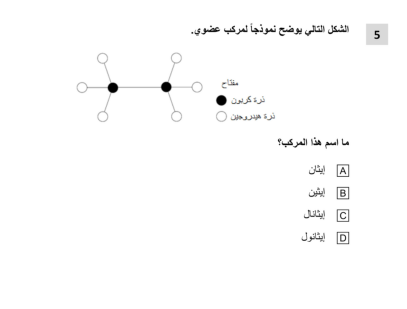

📂 **Image Path:** /content/downloaded_images/image_0.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما اسم هذا المركب؟",
  "question_en": "What is the name of this compound?",
  "choices_native": [
    "إيثان",
    "إيثين",
    "إيثانال",
    "إيثانول"
  ],
  "choices_en": [
    "Ethane",
    "Ethene",
    "Ethanal",
    "Ethanol"
  ],
  "correct_answer": "A",
  "step_1": "The question asks for the name of the compound shown in the diagram.",
  "step_2": "The diagram shows two carbon atoms connected by a single bond, each bonded to hydrogen atoms.",
  "step_3": "Option A is 'إيثان' which translates to 'Ethane', Option B is 'إيثين' which translates to 'Ethene', Option C is 'إيثانال' which translates to 'Ethanal', and Option D is 'إيثانول' which translates to 'Ethanol'.",
  "step_4": "Based on the structure, it matches the structure of ethane, which has two carbon atoms bonded together with no additional functional groups.",
  "final

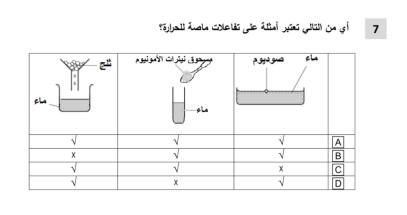

📂 **Image Path:** /content/downloaded_images/image_1.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من التالي تعتبر أمثلة على تفاعلات ماصة للحرارة؟",
  "question_en": "Which of the following are examples of endothermic reactions?",
  "choices_native": [
    "ثلج يذوب في الماء",
    "مسحوق نيترات الأمونيوم يذوب في الماء",
    "صوديوم يذوب في الماء",
    "ثلج يذوب في الماء، مسحوق نيترات الأمونيوم يذوب في الماء، صوديوم يذوب في الماء"
  ],
  "choices_en": [
    "Ice melting in water",
    "Ammonium nitrate powder dissolving in water",
    "Sodium dissolving in water",
    "Ice melting in water, Ammonium nitrate powder dissolving in water, Sodium dissolving in water"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question which asks for examples of endothermic reactions.",
  "step_2": "Step 2: Analyzing the provided information about each reaction:",
  "step_3": "Step 3: Evaluating each option ensuring valid JSO

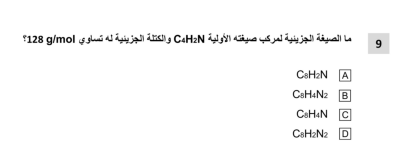

📂 **Image Path:** /content/downloaded_images/image_10.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما الصيغة الجزيئية لمركب صيغته الأولية C₄H₂N والكتلة الجزيئية له تساوي 128 g/mol؟",
  "question_en": "What is the molecular formula for a compound whose primary formula is C₄H₂N and its molar mass is 128 g/mol?",
  "choices_native": ["C₈H₂N", "C₈H₄N₂", "C₈H₄N", "C₈H₂N₂"],
  "choices_en": ["C₈H₂N", "C₈H₄N₂", "C₈H₄N", "C₈H₂N₂"],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question, which asks for the molecular formula given the primary formula and molar mass.",
  "step_2": "Step 2: Analyzing the provided information: Primary formula C₄H₂N and molar mass 128 g/mol.",
  "step_3": "Step 3: Calculating the molar mass of the primary formula C₄H₂N:\n- Carbon (C): 12 g/mol × 4 = 48 g/mol\n- Hydrogen (H): 1 g/mol × 2 = 2 g/mol\n- Nitrogen (N): 14 g/mol × 1 = 14 g/mol\nTotal: 48 + 2 + 14 = 64 g/mol",
  "step_4": "Step 4: Re

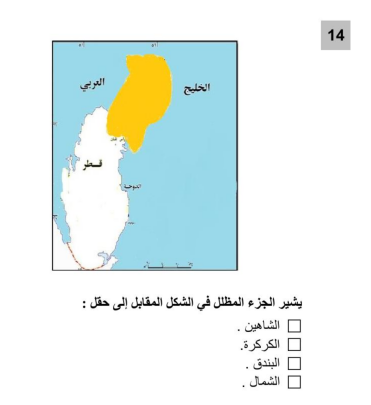

📂 **Image Path:** /content/downloaded_images/image_100.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يشير الجزء المظلل في الشكل المقابل إلى حقل:",
  "question_en": "The shaded part in the figure below refers to which field:",
  "choices_native": [
    "الشاهين.",
    "الكركبة.",
    "البندق.",
    "الشمال."
  ],
  "choices_en": [
    "the Shahin.",
    "the Kerakba.",
    "the Bendi.",
    "the North."
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question, which asks about the labeled area in the map.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that the shaded area corresponds to a specific region on the map.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion based on the given information and the correct answer provided.",
  "final_explanation": "Final explanation: The shaded area in the map corresponds to th

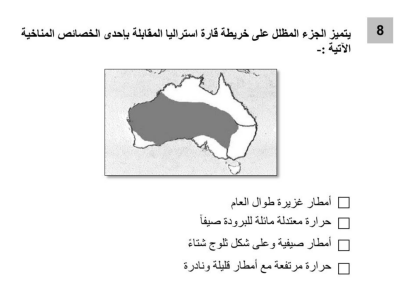

📂 **Image Path:** /content/downloaded_images/image_101.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يتميز الجزء المظلل على خريطة قارة استراليا المقابلة بأحدى الخصائص المناخية الآتية: -",
  "question_en": "The shaded part on the map of Australia corresponds to one of the following climatic characteristics:",
  "choices_native": [
    "أمطار غزيرة طوال العام",
    "حرارة معتدلة مائلة للبرودة صيفاً",
    "أمطار صيفية وعلى شكل ثلوج شتاءً",
    "حرارة مرتفعة مع أمطار قليلة ونادرة"
  ],
  "choices_en": [
    "Heavy rainfall throughout the year",
    "Moderate heat inclined towards coolness in summer",
    "Summer rains and snow in winter",
    "High temperatures with little and rare rainfall"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about identifying the climatic characteristic of the shaded area on the map of Australia.",
  "step_2": "Step 2: Analyzing the provided information and the options given

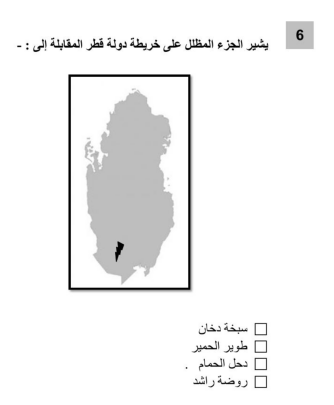

📂 **Image Path:** /content/downloaded_images/image_102.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يشير الجزء المظلل على خريطة دولة قطر المقابلة إلى :",
  "question_en": "The shaded part on the map of Qatar corresponds to:",
  "choices_native": [
    "سبخة دخان",
    "طوير الحمير",
    "دحل الحمام.",
    "روضة راشد"
  ],
  "choices_en": [
    "Sabhah Dakhn",
    "Tawar Al Hamra",
    "Dhul Al Hamam",
    "Roose Al Rashid"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about identifying a location on a map of Qatar.",
  "step_2": "Step 2: Analyzing the provided map and the options given.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion based on the provided information.",
  "final_explanation": "Final explanation: The shaded part on the map corresponds to Tawar Al Hamra, which matches the second option in both the native and E

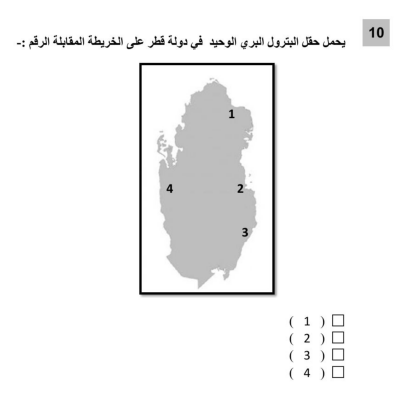

📂 **Image Path:** /content/downloaded_images/image_103.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يحمل حقل البترول البري الوحيد في دولة قطر على الخريطة المقابلة الرقم :",
  "question_en": "Which number corresponds to the only onshore oil field in Qatar on the map?",
  "choices_native": [
    "( 1 )",
    "( 2 )",
    "( 3 )",
    "( 4 )"
  ],
  "choices_en": [
    "( 1 )",
    "( 2 )",
    "( 3 )",
    "( 4 )"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about identifying the location of the only onshore oil field in Qatar.",
  "step_2": "Step 2: Analyzing the map provided in the image.",
  "step_3": "Step 3: Evaluating the map where the numbers correspond to different regions in Qatar.",
  "step_4": "Step 4: Reaching the conclusion based on the map and the question.",
  "final_explanation": "Final explanation: The correct answer is C, which corresponds to the region marked as number 3 on the ma

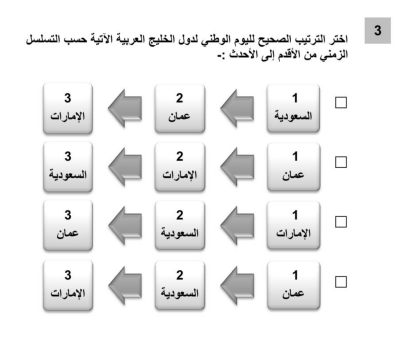

📂 **Image Path:** /content/downloaded_images/image_104.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "اختر الترتيب الصحيح لليوم الوطني لدول الخليج العربية الآتية حسب التسلسل الزمني من الأقدم إلى الأحدث: -",
  "question_en": "Choose the correct sequence for the National Day of the following Gulf Arab countries according to the chronological order from oldest to newest:",
  "choices_native": [
    "الإمارات",
    "عمان",
    "السعودية"
  ],
  "choices_en": [
    "UAE",
    "Oman",
    "Saudi Arabia"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question which asks for the correct chronological order of National Days for the mentioned Gulf Arab countries.",
  "step_2": "Step 2: Analyzing the provided information about the National Days of the countries mentioned.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion based on historical knowledg

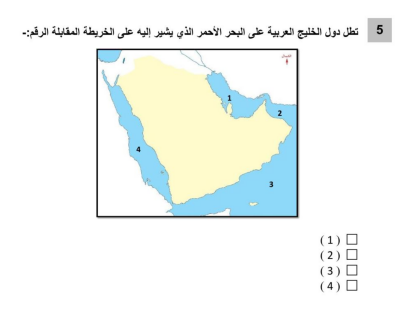

📂 **Image Path:** /content/downloaded_images/image_105.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تطل دول الخليج العربية على البحر الأحمر الذي يشير إليه على الخريطة المقابلة الرقم:-",
  "question_en": "Which country borders the Red Sea shown on the map?",
  "choices_native": ["السعودية", "الإمارات العربية المتحدة", "اليمن", "مصر"],
  "choices_en": ["Saudi Arabia", "United Arab Emirates", "Yemen", "Egypt"],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question which asks about the country bordering the Red Sea.",
  "step_2": "Step 2: Analyzing the map and identifying the countries labeled with numbers.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion based on the map and the given choices.",
  "final_explanation": "Final explanation: The map shows the Red Sea bordered by Saudi Arabia (numbered 1), United Arab Emirates (numbered 2), Yemen (numbe

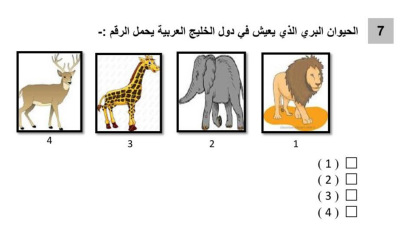

📂 **Image Path:** /content/downloaded_images/image_106.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "الحيوان البري الذي يعيش في دول الخليج العربية يحمل الرقم:",
  "question_en": "The wild animal that lives in the Arab Gulf countries carries the number:",
  "choices_native": ["الحصان", "الغiraffe", "الخنزير", "الأسد"],
  "choices_en": ["Horse", "Giraffe", "Pig", "Lion"],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question which asks about the wild animal living in the Arab Gulf countries.",
  "step_2": "Step 2: Analyzing the provided images and their corresponding numbers.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion based on the image and the question.",
  "final_explanation": "Final explanation: The wild animal living in the Arab Gulf countries is the lion, which corresponds to the number '1' in the image."
}
```


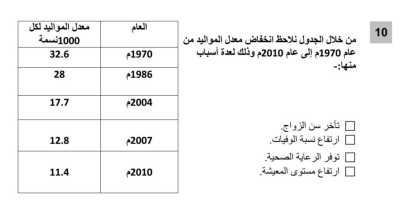

📂 **Image Path:** /content/downloaded_images/image_107.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "من خلال الجدول نلاحظ انخفاض معدل المواليد من عام 1970م إلى عام 2010م وذلك لعدة أسباب منها:-",
  "question_en": "From the table, we observe a decrease in birth rate from 1970 to 2010. This decline is due to several reasons:",
  "choices_native": [
    "تأخر سن الزواج.",
    "ارتفاع نسبة الوفيات.",
    "توفر الرعاية الصحية.",
    "ارتفاع مستوى المعيشة."
  ],
  "choices_en": [
    "Delayed marriage age.",
    "Increased death rate.",
    "Availability of healthcare.",
    "Rising standard of living."
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question, which asks about the reasons for the decrease in birth rate from 1970 to 2010.",
  "step_2": "Step 2: Analyzing the provided information, which includes a table showing birth rates over different years.",
  "step_3": "Step 3: Evaluating each option to determine

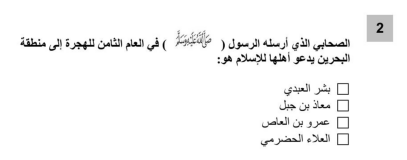

📂 **Image Path:** /content/downloaded_images/image_108.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "الصحابي الذي أرسله الرسول (صلى الله عليه وسلم) في العام الثامن للهجرة إلى منطقة البحرين يدعو أهله للاسلام هو:",
  "question_en": "The companion who was sent by the Prophet (peace be upon him) in the eighth year of Hijra to the region of Bahrain to invite his family to Islam is:",
  "choices_native": [
    "بشر العبد",
    "معاذ بن جبل",
    "عمرو بن العاص",
    "العلاء الحضرمي"
  ],
  "choices_en": [
    "Bashr al-Abdi",
    "Ma'adh ibn Jabal",
    "Amr ibn al-'As",
    "Al-'Ala' al-Harithi"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about identifying a specific companion sent by the Prophet Muhammad (peace be upon him) to invite his family to Islam.",
  "step_2": "Step 2: Analyzing the provided choices to match the historical context.",
  "step_3": "Step 3: Evaluating each option ensuring valid J

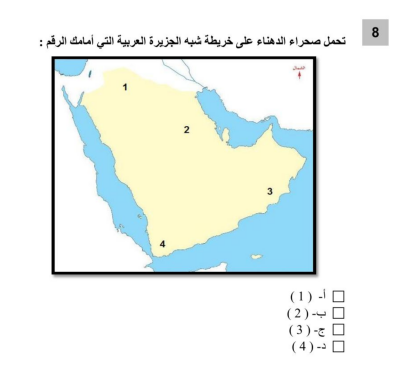

📂 **Image Path:** /content/downloaded_images/image_109.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تحمل صحراء الدهناء على خريطة شبه الجزيرة العربية التي أمامك الرقم:",
  "question_en": "Which number represents the Rub' al Khali desert on the map of the Arabian Peninsula shown?",
  "choices_native": [
    "أ- (1)",
    "ب- (2)",
    "ج- (3)",
    "د- (4)"
  ],
  "choices_en": [
    "A- (1)",
    "B- (2)",
    "C- (3)",
    "D- (4)"
  ],
  "correct_answer": "D",
  "step_1": "The question asks which number corresponds to the Rub' al Khali desert on the map.",
  "step_2": "The map shows four regions labeled with numbers.",
  "step_3": "The Rub' al Khali desert is located in the northeastern part of the Arabian Peninsula, which corresponds to region number 4.",
  "step_4": "Therefore, the correct answer is D.",
  "final_explanation": "The Rub' al Khali desert is located in the northeastern part of the Arabian Peninsula, which matches

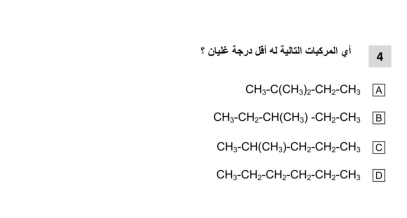

📂 **Image Path:** /content/downloaded_images/image_11.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي المركبات التالية له أقل درجة غليان؟",
  "question_en": "Which of the following compounds has the lowest boiling point?",
  "choices_native": [
    "CH₃-C(CH₃)₂-CH₂-CH₃",
    "CH₃-CH₂-CH(CH₃)-CH₂-CH₃",
    "CH₃-CH(CH₃)-CH₂-CH₂-CH₃",
    "CH₃-CH₂-CH₂-CH₂-CH₂-CH₃"
  ],
  "choices_en": [
    "2-Methylpentane",
    "2-Methylbutane",
    "Isobutylpentane",
    "Hexane"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question which asks for the compound with the lowest boiling point among the given options.",
  "step_2": "Step 2: Analyzing the boiling points of alkanes generally increases with increasing carbon atoms due to stronger van der Waals forces.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the boiling point trend.",
  "fina

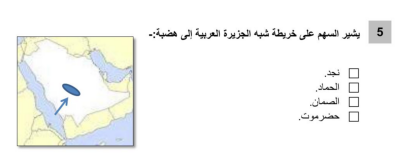

📂 **Image Path:** /content/downloaded_images/image_110.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يثير السهم على خريطة شبه الجزيرة العربية إلى هضبة:",
  "question_en": "The arrow on the map of the Arabian Peninsula points to which plateau:",
  "choices_native": [
    "نجد.",
    "الحماد.",
    "الصمان.",
    "حضرموت."
  ],
  "choices_en": [
    "Najd.",
    "Al-Hamad.",
    "As-Sumān.",
    "Hadramawt."
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about identifying a plateau on the Arabian Peninsula map.",
  "step_2": "Step 2: Analyzing the provided map and the options given.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the provided information.",
  "final_explanation": "Final explanation: The correct answer is 'حضرموت.' (Hadramawt), as it matches the location pointed by the arrow on the map."
}
```


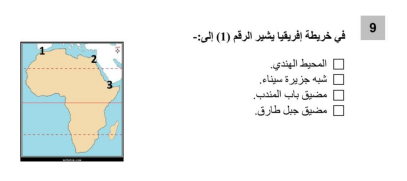

📂 **Image Path:** /content/downloaded_images/image_111.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "في خريطة إفريقيا يشير الرقم (1) إلى:",
  "question_en": "In the map of Africa, number (1) refers to:",
  "choices_native": [
    "المحيط الهندي.",
    "شبه جزيرة سيناء.",
    "مضيق باب المندب.",
    "مضيق جبل طارق."
  ],
  "choices_en": [
    "Indian Ocean.",
    "Gulf of Suez.",
    "Bab el-Mandeb Strait.",
    "Gibraltar Strait."
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question, which asks about the location referred to by number (1) on the map of Africa.",
  "step_2": "Step 2: Analyzing the provided map and identifying the location marked by number (1).",
  "step_3": "Step 3: Evaluating each option to match it with the location shown in the map:",
  "step_4": "Step 4: Reaching the conclusion based on the map and the given choices.",
  "final_explanation": "Final explanation: Number (1) on the map poi

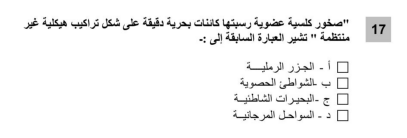

📂 **Image Path:** /content/downloaded_images/image_112.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "صخور كثيرة عضوية رسبتها كائنات بحرية دقيقة على شكل تركيب هيكلي غير منتظمة تشير العبارة السابقة إلى:",
  "question_en": "\"Fossiliferous rocks formed by delicate marine organisms in an irregular structural framework\" refers to:",
  "choices_native": [
    "أ - الجزر الرملية",
    "ب - الشواطئ الحصوية",
    "ج - البحيرات الشاطئية",
    "د - السواحل المرجانية"
  ],
  "choices_en": [
    "A - Sand islands",
    "B - Rocky shores",
    "C - Coastal lakes",
    "D - Coral reefs"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question, which asks about fossiliferous rocks formed by delicate marine organisms in an irregular structural framework.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that the description matches coral reefs, which are known for their intricate and irregular structures.

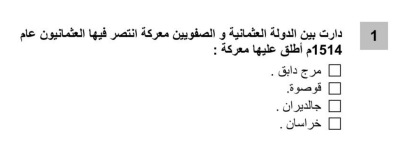

📂 **Image Path:** /content/downloaded_images/image_113.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "دارت بين الدولة العثمانية و الصفويين معركة انتصر فيها العثمانيون عام 1514م أطلق عليها معركة:",
  "question_en": "The Battle of which name was fought between the Ottoman Empire and the Safavids in 1514, where the Ottomans emerged victorious?",
  "choices_native": [
    "مرج دابق.",
    "قوصوة.",
    "جالديران.",
    "خراسان."
  ],
  "choices_en": [
    "Mardabiq",
    "Quswa",
    "Galidiran",
    "Khurasan"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the battle fought between the Ottoman Empire and the Safavids in 1514 where the Ottomans won.",
  "step_2": "Step 2: Analyzing the provided information and recognizing that the correct answer is 'Galidiran'.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that the correct answer 

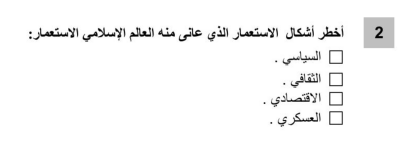

📂 **Image Path:** /content/downloaded_images/image_114.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أخطر أشكال الاستعمار الذي عانى منه العالم الإسلامي الاستعمار:",
  "question_en": "What was the most severe form of colonialism suffered by the Islamic world?",
  "choices_native": [
    "السياسي.",
    "الثقافي.",
    "الاقتصادي.",
    "العسكري."
  ],
  "choices_en": [
    "Political.",
    "Cultural.",
    "Economic.",
    "Military."
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the most severe form of colonialism suffered by the Islamic world.",
  "step_2": "Step 2: Analyzing the provided information which indicates the correct answer is B.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that the correct answer is Cultural.",
  "final_explanation": "Final explanation: Based on the analysis, the most severe form of colonialis

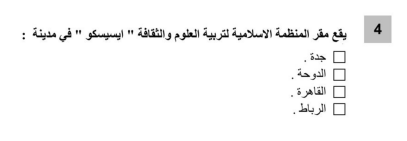

📂 **Image Path:** /content/downloaded_images/image_115.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يقع مقر المنظمة الإسلامية لتدريب العلوم والثقافة \"ايسيسكو\" في مدينة:",
  "question_en": "The headquarters of the Islamic Organization for Education, Science and Culture (ISESCO) is located in which city?",
  "choices_native": [
    "جدة",
    "الدوحة",
    "القاهرة",
    "الرباط"
  ],
  "choices_en": [
    "Jeddah",
    "Doha",
    "Cairo",
    "Rabat"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about the location of ISESCO's headquarters.",
  "step_2": "Step 2: Analyzing the provided choices in both Arabic and English.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion based on the given information.",
  "final_explanation": "Final explanation: The headquarters of the Islamic Organization for Education, Science and Culture (

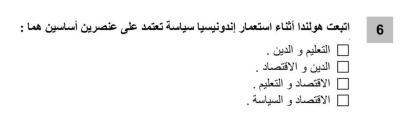

📂 **Image Path:** /content/downloaded_images/image_116.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "اتبع هولندا أثناء استعمار إندونيسيا سياسة تعتمد على عنصرين أساسين هما:",
  "question_en": "During Dutch colonial rule in Indonesia, the policy followed by Holland relied on two basic elements:",
  "choices_native": [
    "التعليم و الدين.",
    "الدين و الاقتصاد.",
    "الاقتصاد و التعليم.",
    "الاقتصاد و السياسة."
  ],
  "choices_en": [
    "education and religion.",
    "religion and economy.",
    "economy and education.",
    "economy and politics."
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the Dutch colonial policy in Indonesia.",
  "step_2": "Step 2: Analyzing the provided information and the correct answer from the JSON file.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format.",
  "step_4": "Step 4: Reaching the conclusion based on the correct answer.",
  "fin

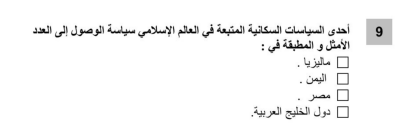

📂 **Image Path:** /content/downloaded_images/image_117.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أحدى السياسات السكانية المتبعة في العالم الإسلامي سياسة الوصول إلى العدد الأمثل و المطبقة في:",
  "question_en": "One of the population policies followed in the Islamic world is the policy of reaching the optimal number and applied in:",
  "choices_native": [
    "مالزيا.",
    "اليمن.",
    "مصر.",
    "دول الخليج العربية."
  ],
  "choices_en": [
    "Malaysia.",
    "Yemen.",
    "Egypt.",
    "Gulf Arab countries."
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about population policies in the Islamic world.",
  "step_2": "Step 2: Analyzing the provided information about population policies.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the correct answer.",
  "final_explanation": "Final explanation: The correct ans

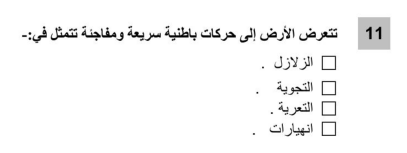

📂 **Image Path:** /content/downloaded_images/image_118.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تتعرض الأرض إلى حركات باطنية سريعة وفاجئة تمثل في:",
  "question_en": "The Earth is exposed to rapid and sudden internal movements represented by:",
  "choices_native": [
    "الزلزال",
    "النجوية",
    "التعرية",
    "انهيارات"
  ],
  "choices_en": [
    "earthquakes",
    "tectonic",
    "erosion",
    "landslides"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question, which asks about rapid and sudden internal movements affecting the Earth.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that 'الزلزال' translates to 'earthquakes', which are sudden and rapid movements within the Earth.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion that 'الزلزال' (earthquakes) is the correct answer.",
  "final_explanation":

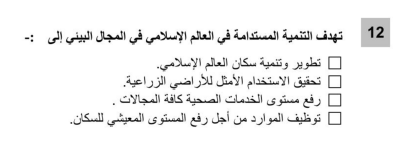

📂 **Image Path:** /content/downloaded_images/image_119.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تهدف التنمية المستدامة في العالم الإسلامي في المجال البيئي إلى: :-",
  "question_en": "What does sustainable development in the Islamic world aim for in the environmental field?: -",
  "choices_native": [
    "تطوير وتنمية سكان العالم الإسلامي.",
    "تحقيق الاستخدام الأمثل للأراضي الزراعية.",
    "رفع مستوى الخدمات الصحية كافة المجالات.",
    "توظيف الموارد من أجل رفع المستوى المعيشي للسكان."
  ],
  "choices_en": [
    "Developing and improving the population of the Islamic world.",
    "Achieving the best use of agricultural lands.",
    "Raising the level of health services across all fields.",
    "Utilizing resources to improve the living standard of the people."
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about sustainable development goals in the Islamic world related to the environment.",
 

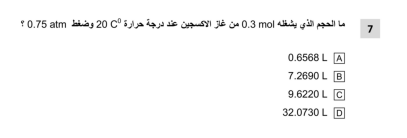

📂 **Image Path:** /content/downloaded_images/image_12.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما الحجم الذي يشغله 0.3 mol من غاز الاكسجين عند درجة حرارة 20 C° وضغط 0.75 atm؟",
  "question_en": "What is the volume occupied by 0.3 mol of oxygen gas at 20°C and pressure 0.75 atm?",
  "choices_native": [
    "0.6568 L",
    "7.2690 L",
    "9.6220 L",
    "32.0730 L"
  ],
  "choices_en": [
    "0.6568 L",
    "7.2690 L",
    "9.6220 L",
    "32.0730 L"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question, which involves calculating the volume of oxygen gas using the ideal gas law.",
  "step_2": "Step 2: Analyzing the provided information: n = 0.3 mol, T = 20°C + 273.15 = 293.15 K, P = 0.75 atm.",
  "step_3": "Step 3: Applying the ideal gas law formula PV = nRT to find the volume V: V = nRT/P.",
  "step_4": "Step 4: Calculating the volume: V = (0.3 mol * 0.0821 L·atm/(mol·K) * 293.15 K) / 0.75 atm ≈ 9.622

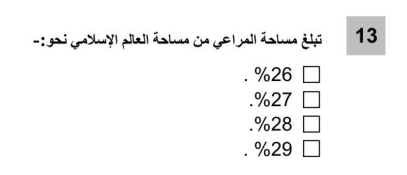

📂 **Image Path:** /content/downloaded_images/image_120.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تبلغ مساحة المراعي من مساحة العالم الإسلامي نحو:-",
  "question_en": "The area of pastures accounts for approximately what percentage of the Islamic world's total area:",
  "choices_native": [
    ".%26",
    ".%27",
    ".%28",
    ".%29"
  ],
  "choices_en": [
    ".%26",
    ".%27",
    ".%28",
    ".%29"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the percentage of pasture areas in the Islamic world.",
  "step_2": "Step 2: Analyzing the provided choices which are percentages.",
  "step_3": "Step 3: Evaluating each option ensuring they remain valid JSON.",
  "step_4": "Step 4: Reaching the conclusion based on the given correct answer.",
  "final_explanation": "Final explanation: The correct answer is.%28, indicating that the pasture areas account for approximately 28% of the Islamic world'

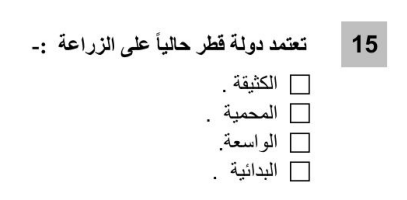

📂 **Image Path:** /content/downloaded_images/image_121.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تعتمد دولة قطر حاليًا على الزراعة: :-",
  "question_en": "Currently, Qatar depends on agriculture:",
  "choices_native": [
    "الكثيفة.",
    "المحمية.",
    "الواسعة.",
    "البدائية."
  ],
  "choices_en": [
    "intensive.",
    "protected.",
    "extensive.",
    "primitive."
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question, which asks about Qatar's current dependency on agriculture.",
  "step_2": "Step 2: Analyzing the provided information and the multiple-choice options.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the given information.",
  "final_explanation": "Final explanation: The correct answer is 'المحمية.' (protected), indicating that Qatar currently relies on protected agriculture."
}
```


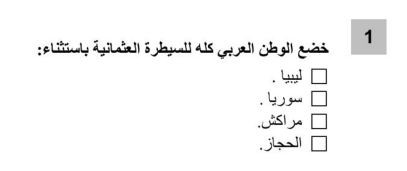

📂 **Image Path:** /content/downloaded_images/image_122.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "خضع الوطن العربي كله للسيطرة العثمانية باستثناء:",
  "question_en": "Which country was not under Ottoman control?",
  "choices_native": [
    "ليبيا.",
    "سوريا.",
    "مراكش.",
    "الحجاز."
  ],
  "choices_en": [
    "Libya.",
    "Syria.",
    "Marrakech.",
    "Hejaz."
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question, which asks about the country that was not under Ottoman control.",
  "step_2": "Step 2: Analyzing the provided information, noting that the correct answer is C based on the JSON data.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion that Marrakech was not under Ottoman control.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is Marrakech, which corresponds to 'مراكش.' in t

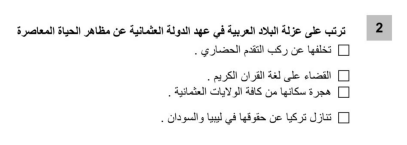

📂 **Image Path:** /content/downloaded_images/image_123.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ترتب على عزلة البلاد العربية في عهد الدولة العثمانية عن مظاهر الحياة المعاصرة تخلفها عن ركب التقدم الحضاري.",
  "question_en": "The isolation of Arab lands during the Ottoman period from modern life features left them behind in the march of progress.",
  "choices_native": [
    "القضاء على لغة القرآن الكريم.",
    "هجرة سكانها من كافة الولايات العثمانية.",
    "تنازل تركيا عن حقوقها في ليبيا والسودان."
  ],
  "choices_en": [
    "The eradication of the language of the Holy Quran.",
    "The migration of its inhabitants from all Ottoman provinces.",
    "Turkey's renunciation of its rights in Libya and Sudan."
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the consequences of Arab lands' isolation during the Ottoman period.",
  "step_2": "Step 2: Analyzing the provided choices to find the one tha

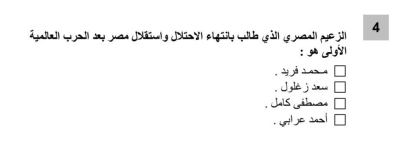

📂 **Image Path:** /content/downloaded_images/image_124.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "الزعيم المصري الذي طالب بانتهاء الاحتلال واستقلال مصر بعد الحرب العالمية الأولى هو:",
  "question_en": "The Egyptian leader who demanded the end of the occupation and the independence of Egypt after World War I was:",
  "choices_native": [
    "محمد فريد.",
    "سعد زغلول.",
    "مصطفى كامل.",
    "أحمد عرابي."
  ],
  "choices_en": [
    "Mohamed Firdous.",
    "Saad Zaghloul.",
    "Mustafa Kamel.",
    "Ahmed Urabi."
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the Egyptian leader who demanded the end of the occupation and the independence of Egypt after World War I.",
  "step_2": "Step 2: Analyzing the provided information and recognizing that Saad Zaghloul is historically known for his role in the Egyptian independence movement.",
  "step_3": "Step 3: Evaluating each option ensuring valid 

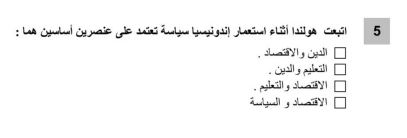

📂 **Image Path:** /content/downloaded_images/image_125.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "اتبع هولندا أثناء استعمار إندونيسيا سياسة تعتمد على عنصرين أساسيين هما:",
  "question_en": "During Dutch colonial rule in Indonesia, the policy followed relied on two main elements:",
  "choices_native": [
    "الدين والاقتصاد.",
    "التعليم والدين.",
    "الاقتصاد والتعليم.",
    "الاقتصاد والسياسة."
  ],
  "choices_en": [
    "religion and economy.",
    "education and religion.",
    "economy and education.",
    "economy and politics."
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the main elements of Dutch colonial policy in Indonesia during their rule.",
  "step_2": "Step 2: Analyzing the provided information and matching it with the given choices.",
  "step_3": "Step 3: Evaluating each option ensuring they are correctly formatted in JSON format.",
  "step_4": "Step 4: Reaching the concl

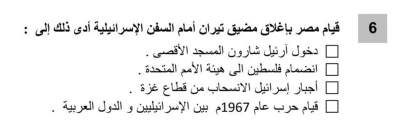

📂 **Image Path:** /content/downloaded_images/image_126.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "قيام مصر باغلاق مضيق تيران أمام السفن الإسرائيلية أدى ذلك إلى:",
  "question_en": "Closing the Tiran Strait by Egypt against Israeli ships led to:",
  "choices_native": [
    "دخول آرئيل شارون المسجد الأقصى.",
    "انضمام فلسطين الى هيئة الأمم المتحدة.",
    "أجبار إسرائيل الانسحاب من قطاع غزة.",
    "قيام حرب عام 1967م بين الإسرائيليين والدول العربية."
  ],
  "choices_en": [
    "Entering Ariel Sharon into the Temple Mount.",
    "Palestine joining the United Nations.",
    "Forcing Israel to withdraw from Gaza Strip.",
    "Starting the 1967 War between Israelis and Arab countries."
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about the impact of Egypt closing the Tiran Strait.",
  "step_2": "Step 2: Analyzing the provided information indicating the correct answer is D.",
  "step_3": "Step 3: Eval

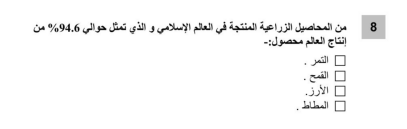

📂 **Image Path:** /content/downloaded_images/image_127.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "من المحاصيل الزراعية المنتجة في العالم الإسلامي و الذي تمثل حوالي 94.6% من إنتاج العالم محصول:",
  "question_en": "Which agricultural product is produced in the Islamic world and represents approximately 94.6% of global production?",
  "choices_native": [
    "التمر",
    "القمح",
    "الأرز",
    "المطاط"
  ],
  "choices_en": [
    "Date",
    "Wheat",
    "Rice",
    "Rubber"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about agricultural products produced in the Islamic world.",
  "step_2": "Step 2: Analyzing the provided information indicating that one product represents approximately 94.6% of global production.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that the correct answer is 'التمر' (Date).",
  "final_explanation": "F

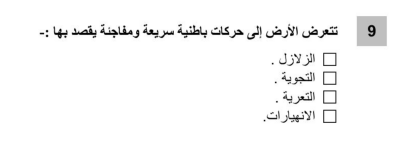

📂 **Image Path:** /content/downloaded_images/image_128.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تعرض الأرض إلى حركات باطنية سريعة ومفاجئة يقصد بها:",
  "question_en": "The earth experiences sudden and rapid movements beneath it. What does this refer to?",
  "choices_native": [
    "الزلازل.",
    "التوجية.",
    "التعرية.",
    "الانهيارات."
  ],
  "choices_en": [
    "earthquakes.",
    "tectonic movements.",
    "erosion.",
    "landslides."
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question, which asks about sudden and rapid movements beneath the earth.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that 'زلازل' means earthquakes.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that 'الزلازل' correctly matches the description of sudden and rapid movements beneath the earth.",
  "final_explanation": "Final 

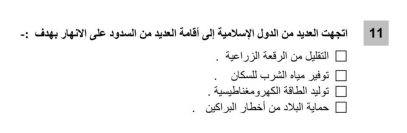

📂 **Image Path:** /content/downloaded_images/image_129.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "اتجهت العديد من الدول الإسلامية إلى أقامة العديد من السدود على الانهار بهدف:",
  "question_en": "Many Islamic countries have aimed at building numerous dams on rivers for the purpose of:",
  "choices_native": [
    "التقليل من الرقعة الزراعية.",
    " توفير مياه الشرب للسكان.",
    " توليد الطاقة الكهرومغناطيسية.",
    "حماية البلاد من أخطار البراكين."
  ],
  "choices_en": [
    "reducing agricultural land.",
    "providing drinking water for the population.",
    "generating electromagnetism energy.",
    "protecting the country from volcanic hazards."
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the purpose of building dams in Islamic countries.",
  "step_2": "Step 2: Analyzing the provided information about the options related to dam construction purposes.",
  "step_3": "Step 3: Evaluating 

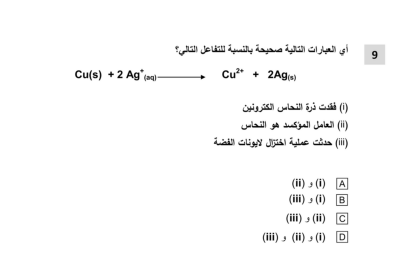

📂 **Image Path:** /content/downloaded_images/image_13.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي العبارات التالية صحيحة بالنسبة لتفاعل التالي؟",
  "question_en": "Which of the following statements is correct for the reaction given?",
  "choices_native": [
    "(i) فقدت ذرة النحاس الكترونين",
    "(ii) العامل المؤكسد هو النحاس",
    "(iii) حدث عملية اختزال لأيونات الفضة"
  ],
  "choices_en": [
    "(i) The copper atom lost two electrons",
    "(ii) Copper is the oxidizing agent",
    "(iii) Reduction of silver ions occurred"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the chemical reaction given.",
  "step_2": "Step 2: Analyzing the reaction Cu(s) + 2 Ag+(aq) → Cu2+ + 2Ag(s).",
  "step_3": "Step 3: Evaluating each statement to determine correctness:",
  "- (i) The copper atom lost two electrons.",
  "- (ii) Copper is the reducing agent, not the oxidizing agent.",
  "- (iii) Silver ions 

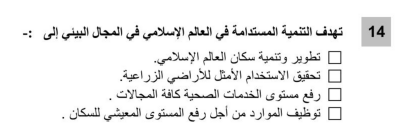

📂 **Image Path:** /content/downloaded_images/image_130.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تهدف التنمية المستدامة في العالم الإسلامي في المجال البيئي إلى:",
  "question_en": "What does sustainable development in the Islamic world aim at in the environmental field?",
  "choices_native": [
    "تطوير وتنمية سكان العالم الإسلامي.",
    "تحقيق الاستخدام الأمثل للأراضي الزراعية.",
    "رفع مستوى الخدمات الصحية كافة المجالات.",
    "توظيف الموارد من أجل رفع المستوى المعيشي للسكان."
  ],
  "choices_en": [
    "Developing and improving the population of the Islamic world.",
    "Achieving the best use of agricultural lands.",
    "Raising the level of health services in all fields.",
    "Utilizing resources to improve the living standard of the people."
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about sustainable development goals in the Islamic world related to the environment.",
  "step_2": 

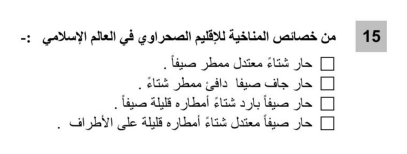

📂 **Image Path:** /content/downloaded_images/image_131.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "من خصائص المناخية للإقليم الصحراوي في العالم الإسلامي :",
  "question_en": "What are the climatic characteristics of the Sahara region in the Islamic world:",
  "choices_native": [
    "حار شتاءً معتدل مطر صيفاً.",
    "حار جاف صيفاً دافئ ممطر شتاءً.",
    "حار صيفاً بارد شتاءً أمطاره قليلة صيفاً.",
    "حار صيفاً معتدل شتاءً أمطاره قليلة على الأطراف."
  ],
  "choices_en": [
    "Hot in winter, moderate in summer with rain.",
    "Hot and dry in summer, mild and rainy in winter.",
    "Hot in summer, cold in winter, little rain in summer.",
    "Hot in summer, moderate in winter, little rain at the edges."
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about climatic characteristics of the Sahara region in the Islamic world.",
  "step_2": "Step 2: Analyzing the provided choices to match the descriptio

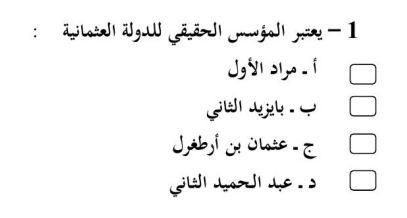

📂 **Image Path:** /content/downloaded_images/image_132.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يعتبر المؤسس الحقيقي للدولة العثمانية",
  "question_en": "Who is considered the true founder of the Ottoman Empire?",
  "choices_native": [
    "مراد الأول",
    "بايزيد الثاني",
    "عثمان بن أرطغرل",
    "عبد الحميد الثاني"
  ],
  "choices_en": [
    "Murad I",
    "Bayezid II",
    "Osman I",
    "Abdülhamid II"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the founder of the Ottoman Empire.",
  "step_2": "Step 2: Analyzing the provided information indicating Bayezid II as the correct answer.",
  "step_3": "Step 3: Ensuring all values remain valid JSON.",
  "step_4": "Step 4: Concluding that Bayezid II is the correct answer.",
  "final_explanation": "Final explanation: Based on historical knowledge, Bayezid II is recognized as the true founder of the Ottoman Empire."
}
```


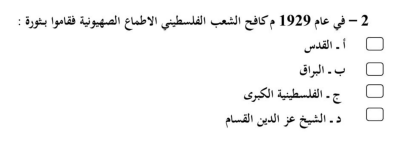

📂 **Image Path:** /content/downloaded_images/image_133.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "في عام 1929 م كافح الشعب الفلسطيني الاطماع الصهيونية فقاموا بثورة:",
  "question_en": "In 1929, the Palestinian people fought against Zionist ambitions and launched a revolt:",
  "choices_native": [
    "أ - القدس",
    "ب - البراق",
    "ج - الفلسطينية الكبرى",
    "د - الشيخ عز الدين القسام"
  ],
  "choices_en": [
    "A - Jerusalem",
    "B - The Prophet's Tomb",
    "C - Greater Palestine",
    "D - Sheikh Zu al-Qasim"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about a historical event involving Palestinians and Zionism in 1929.",
  "step_2": "Step 2: Analyzing the provided information and recognizing that the question refers to a specific individual mentioned in the options.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclus

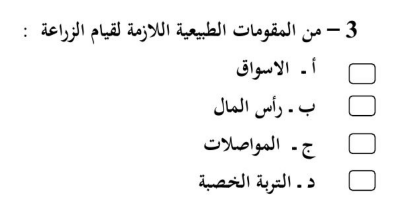

📂 **Image Path:** /content/downloaded_images/image_134.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "من المقومات الطبيعية اللازمة لقيام الزراعة:",
  "question_en": "Which of the following are natural prerequisites for agriculture?",
  "choices_native": [
    "الاسواق",
    "رأس المال",
    "المواصلات",
    "الترابة الخصبة"
  ],
  "choices_en": [
    "Markets",
    "Capital",
    "Communications",
    "Fertile soil"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question which asks about natural prerequisites for agriculture.",
  "step_2": "Step 2: Analyzing the provided choices to identify which one fits the context of natural prerequisites.",
  "step_3": "Step 3: Evaluating each option ensuring they remain valid JSON strings.",
  "step_4": "Step 4: Reaching the conclusion based on the given information.",
  "final_explanation": "Final explanation: The correct answer is 'الترابة الخصبة' (Fertile soil) as it i

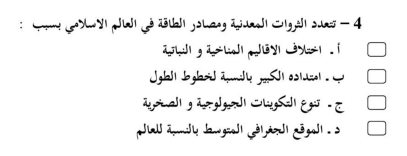

📂 **Image Path:** /content/downloaded_images/image_135.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تعدد الشروات المعدنية ومصادر الطاقة في العالم الإسلامي بسبب:",
  "question_en": "The diversity of mineral ores and energy sources in the Islamic world is due to:",
  "choices_native": [
    "اختلاف الاقاليم المناخية و النباتية",
    "امتداده الكبير بالنسبة لخطوط الطول",
    "تنوع التكوينات الجيولوجية و الصخرية",
    "الموقع الجغرافي المتوسط بالنسبة للعالم"
  ],
  "choices_en": [
    "the difference in climatic and vegetative regions",
    "its large extent relative to longitude lines",
    "diversity in geological formations and rocks",
    "its geographical location in the middle of the world"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about the diversity of mineral ores and energy sources in the Islamic world.",
  "step_2": "Step 2: Analyzing the provided choices to determine which one best expl

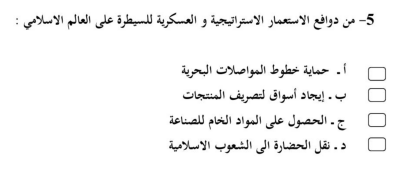

📂 **Image Path:** /content/downloaded_images/image_136.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "من دوافع الاستعمار الاستراتيجية و العسكرية للسيطرة على العالم الإسلامي:",
  "question_en": "What were the strategic and military motivations for colonialism to control the Islamic world?",
  "choices_native": [
    "حماية خطوط الموصلات البحرية",
    "إيجاد أسواق لتصريف المنتجات",
    "الحصول على المواد الخام للصناعة",
    "نقل الحضارة الى الشعوب الإسلامية"
  ],
  "choices_en": [
    "Protecting maritime communication lines",
    "Finding markets for product distribution",
    "Obtaining raw materials for industry",
    "Transferring culture to Islamic societies"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the motivations for colonialism in the Islamic world.",
  "step_2": "Step 2: Analyzing the provided choices to identify which one aligns with obtaining raw materials for industry.",
  "step_

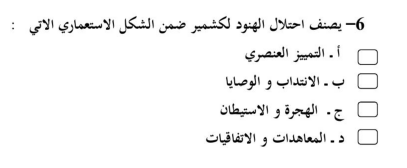

📂 **Image Path:** /content/downloaded_images/image_137.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يصنف احتلال الهند للكشمير ضمن الشكل الاستعماري الاتي:",
  "question_en": "Classify the Indian occupation of Kashmir under the following colonial form:",
  "choices_native": [
    "التمييز العنصري",
    "الانتداب و الوصاية",
    "الهجرة والاستيطان",
    "المعاهدات والاتفاقيات"
  ],
  "choices_en": [
    "the racial discrimination",
    "mandate and trusteeship",
    "immigration and settlement",
    "treaties and agreements"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about classifying the Indian occupation of Kashmir.",
  "step_2": "Step 2: Analyzing the provided information and the context of colonial forms.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion that racial discrimination fits best as a form of colonialism.",
  "f

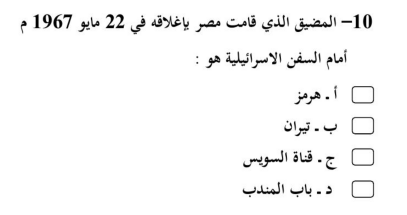

📂 **Image Path:** /content/downloaded_images/image_138.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "المضيق الذي قامت مصر بإغلاقه في 22 مايو 1967 م",
  "question_en": "The strait that Egypt closed in May 22, 1967",
  "choices_native": [
    "هرمز",
    "تيران",
    "قناة السويس",
    "باب المندب"
  ],
  "choices_en": [
    "Hormuz",
    "Tiran",
    "Suez Canal",
    "Bab al-Mandeb"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the strait that Egypt closed in May 22, 1967.",
  "step_2": "Step 2: Analyzing the provided choices in both Arabic and English.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion based on historical knowledge that the Suez Canal was closed by Egypt.",
  "final_explanation": "Final explanation: Based on historical knowledge, the Suez Canal was the strait that Egypt closed in May 22, 1967."
}
```


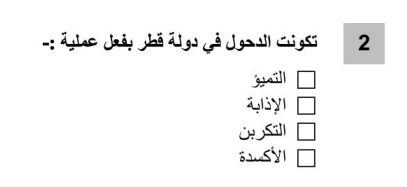

📂 **Image Path:** /content/downloaded_images/image_139.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تكونت الدحول في دولة قطر بفعل عملية:",
  "question_en": "The invasion of Qatar occurred due to which process:",
  "choices_native": [
    "التميؤ",
    "الإذابة",
    "التكرير",
    "الأكسدة"
  ],
  "choices_en": [
    "Distillation",
    "Dissolution",
    "Refining",
    "Oxidation"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the cause of the invasion of Qatar.",
  "step_2": "Step 2: Analyzing the provided information and the multiple-choice options.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion based on the given correct answer.",
  "final_explanation": "Final explanation: The correct answer is 'Dissolution' as it aligns with the context of the question regarding the invasion of Qatar."
}
```


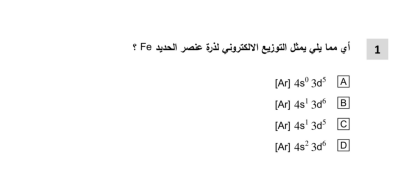

📂 **Image Path:** /content/downloaded_images/image_14.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي مما يلي يمثل التوزيع الالكتروني لذرة عنصر الحديد ؟",
  "question_en": "Which one of the following represents the electron configuration of an iron atom?",
  "choices_native": [
    "[Ar] 4s0 3d5",
    "[Ar] 4s1 3d6",
    "[Ar] 4s1 3d5",
    "[Ar] 4s2 3d6"
  ],
  "choices_en": [
    "[Ar] 4s0 3d5",
    "[Ar] 4s1 3d6",
    "[Ar] 4s1 3d5",
    "[Ar] 4s2 3d6"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question which asks for the electron configuration of iron.",
  "step_2": "Step 2: Analyzing the provided electron configurations.",
  "step_3": "Step 3: Evaluating each option to determine which correctly represents the electron configuration of iron.",
  "step_4": "Step 4: Reaching the conclusion that option D is the correct electron configuration for iron.",
  "final_explanation": "Final explanation: Option 

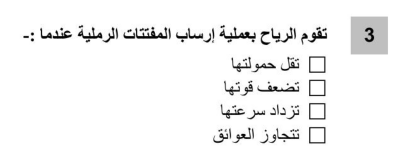

📂 **Image Path:** /content/downloaded_images/image_140.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تقوم الرياح بعملية إرساب المفقتات الرملية عندما:",
  "question_en": "When does wind carry sand particles?",
  "choices_native": [
    "تنقل حمولتها",
    "نضعف قوتها",
    "تزداد سرعتها",
    "تنتجاوز العوائق"
  ],
  "choices_en": [
    "Transports its load",
    "Weakens its strength",
    "Increases its speed",
    "Exceeds obstacles"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about wind carrying sand particles.",
  "step_2": "Step 2: Analyzing the provided information and matching it with the correct answer.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that the correct answer is 'Nضعف قوتها' which translates to 'Weaken its strength'.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is 'N

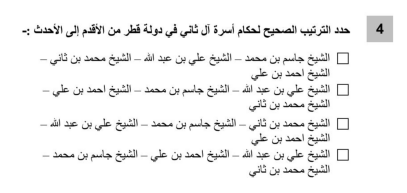

📂 **Image Path:** /content/downloaded_images/image_141.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "حدد الترتيب الصحيح لحكام أسرة آل ثاني في دولة قطر من الأقدم إلى الأحدث :",
  "question_en": "Determine the correct chronological order of the rulers of the Al Thani family in Qatar from oldest to youngest:",
  "choices_native": [
    "الشيخ جاسم بن محمد – الشيخ علي بن عبد الله – الشيخ محمد بن ثاني",
    "الشيخ علي بن عبد الله – الشيخ جاسم بن محمد – الشيخ احمد بن علي",
    "الشيخ احمد بن علي – الشيخ محمد بن ثاني – الشيخ جاسم بن محمد",
    "الشيخ جاسم بن محمد – الشيخ احمد بن علي – الشيخ محمد بن ثاني"
  ],
  "choices_en": [
    "Sheikh Jassim bin Mohammed – Sheikh Ali bin Abdullah – Sheikh Muhammad bin Thani",
    "Sheikh Ali bin Abdullah – Sheikh Jassim bin Mohammed – Sheikh Ahmed bin Ali",
    "Sheikh Ahmed bin Ali – Sheikh Muhammad bin Thani – Sheikh Jassim bin Mohammed",
    "Sheikh Jassim bin Mohammed – Sheikh Ahmed bin Ali – She

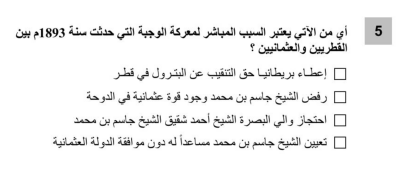

📂 **Image Path:** /content/downloaded_images/image_142.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من الآتي يعتبر السبب المباشر لمعركة الوجهة التي حدثت سنة 1893م بين القطريين والعمانيين؟",
  "question_en": "Which of the following was the direct cause of the battle of Al-Wajhah that occurred in 1893 between the Qataris and the Ottomans?",
  "choices_native": [
    "إعطاء بريطانيا حق التنقيب عن البترول في قطر",
    "رفض الشيخ جاسم بن محمد وجود قوة عثمانية في الدوحة",
    "احتياز والي البصرة الشيخ أحمد شقيق الشيخ جاسم بن محمد",
    "تعيين الشيخ جاسم بن محمد مساعداً له دون موافقة الدولة العثمانية"
  ],
  "choices_en": [
    "Granting Britain the right to prospect for oil in Qatar",
    "Refusing Sheikh Jassim bin Mohammed the presence of Ottoman forces in Doha",
    "Occupying the governor of Basra, Sheikh Ahmed, brother of Sheikh Jassim bin Mohammed",
    "Appointing Sheikh Jassim bin Mohammed as his deputy without Ottoman appro

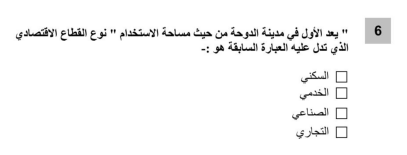

📂 **Image Path:** /content/downloaded_images/image_143.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يعد الأول في مدينة الدوحة من حيث مساحة الاستخدام نوع القطاع الاقتصادي الذي تدل عليه العبارة السابقة هو:",
  "question_en": "The first one in Doha by area of use is the economic sector type which the previous sentence refers to:",
  "choices_native": [
    "السكني",
    "الخدمي",
    "الصناعي",
    "التجاري"
  ],
  "choices_en": [
    "Residential",
    "Service",
    "Industrial",
    "Commercial"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about identifying the economic sector based on the area of use.",
  "step_2": "Step 2: Analyzing the provided choices to match the context of the question.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that the correct answer is 'Industrial'.",
  "final_explanation": "Final explanation: The qu

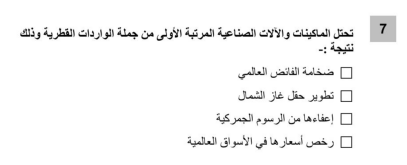

📂 **Image Path:** /content/downloaded_images/image_144.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تحتل الماكينات والآلات الصناعية المرتبة الأولى من جملة الواردات القطرية وذلك نتيجة: :-",
  "question_en": "Industrial machinery and equipment occupy the first place among Qatar's imports. This is due to:",
  "choices_native": [
    "ضخامة الفانض العالمي",
    "تطوير حقل غاز الشمال",
    "إعفاءها من الرسوم الجمركية",
    "رخص أسعارها في الأسواق العالمية"
  ],
  "choices_en": [
    "The global demand for it",
    "Developing the North Gas Field",
    "Exemption from customs duties",
    "Low prices in the global market"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about the reason behind industrial machinery and equipment occupying the first place among Qatar's imports.",
  "step_2": "Step 2: Analyzing the provided choices to determine which one best explains the situation.",
  "step_3": "Step 3: Eval

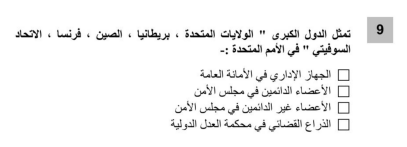

📂 **Image Path:** /content/downloaded_images/image_145.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تمثل الدول الكبرى \" الولايات المتحدة ، بريطانيا ، الصين ، فرنسا ، الاتحاد السوفيتي \" في الأمم المتحدة :",
  "question_en": "Which of the following represents the major countries \"United States, Britain, China, France, Soviet Union\" in the United Nations:",
  "choices_native": [
    "الجهاز الإداري في الأمانة العامة",
    "الأعضاء الدائمين في مجلس الأمن",
    "الأعضاء غير الدائمين في مجلس الأمن",
    "الذراع القضائي في محكمة العدل الدولية"
  ],
  "choices_en": [
    "The administrative body in the General Assembly",
    "Permanent members of the Security Council",
    "Non-permanent members of the Security Council",
    "Judicial arm in the International Court of Justice"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question, which asks about the representation of major countries in the United Nations.",


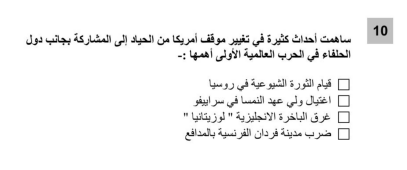

📂 **Image Path:** /content/downloaded_images/image_146.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ساهمت أحداث كثيرة في تغيير موقف أمريكا من الحياد إلى المشاركة بجانب دول الحلفاء في الحرب العالمية الأولى أهمها: :-",
  "question_en": "Many events contributed to changing America's position from neutrality to participation alongside the Allies during World War I. Among these events were:",
  "choices_native": [
    "قيام الثورة الشيوعية في روسيا",
    "اغتيال ولي عهد النمسا في سراييفو",
    "غرق الباحرة الانجليزية \"لوزيتانيا\"",
    "ضرب مدينة فردان الفرنسية بالمدفع"
  ],
  "choices_en": [
    "The Bolshevik Revolution in Russia",
    "The assassination of Archduke Franz Ferdinand in Sarajevo",
    "The sinking of the British ship 'Lusitania'",
    "The bombardment of the French city of Verdun"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about historical events influencing America's involvement in

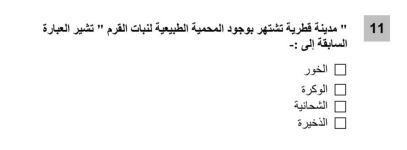

📂 **Image Path:** /content/downloaded_images/image_147.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "مدينة قطرية تشتهر بوجود المحمية الطبيعية لنبات القرم \" تشير العبارة السابقة إلى :-\"",
  "question_en": "\"A city in Qatar known for having the natural reserve for the plant qurm. Which city does the previous sentence refer to?\"",
  "choices_native": [
    "الخور",
    "الوكرة",
    "الشحانية",
    "الذخيرة"
  ],
  "choices_en": [
    "Al Khor",
    "Al Wakrah",
    "Al Shamal",
    "Al Zubara"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about identifying a city in Qatar based on its association with a natural reserve for a specific plant.",
  "step_2": "Step 2: Analyzing the provided information which mentions 'القرم' (qurm) as the plant associated with the natural reserve.",
  "step_3": "Step 3: Evaluating each option ensuring they match the context of the question and the plant mentioned.",
  

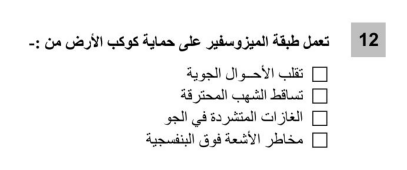

📂 **Image Path:** /content/downloaded_images/image_148.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تعمل طبقة الميوزوسفير على حماية كوكب الأرض من:",
  "question_en": "What does the ozone layer protect Earth from?",
  "choices_native": [
    "نقلب الأحوال الجوية",
    "تساقط الشهب المحترقة",
    "الغازات المتشردة في الجو",
    "مخاطر الأشعة فوق البنفسجية"
  ],
  "choices_en": [
    "Turbulence of atmospheric conditions",
    "Fall of burning meteors",
    "Frozen gases in the air",
    "Ultraviolet radiation hazards"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about what the ozone layer protects Earth from.",
  "step_2": "Step 2: Analyzing the provided information and matching it with the correct answer.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that the correct answer is 'Ultraviolet radiation hazards'.",
  "final_explanati

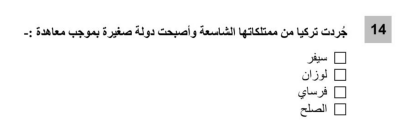

📂 **Image Path:** /content/downloaded_images/image_149.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "جردت تركيا من ممتلكاتها الشاسعة وأصبحت دولة صغيرة بموجب معاهدة: :-",
  "question_en": "Turkey lost its vast possessions and became a small country according to which treaty: :-",
  "choices_native": [
    "سیفر",
    "لوزان",
    "فرساي",
    "الصلح"
  ],
  "choices_en": [
    "Sevres",
    "Lausanne",
    "Versailles",
    "Peace"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question, which asks about a treaty that led Turkey to become a small country after losing its vast possessions.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that the correct answer is 'B' based on historical knowledge.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that the correct answer is 'B'.",
  "final_explanation": "Final explanation: B

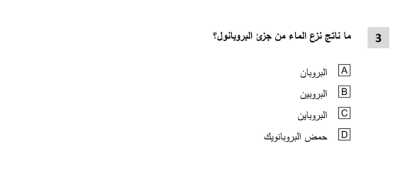

📂 **Image Path:** /content/downloaded_images/image_15.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما ناتج نزع الماء من جزء البروبانول؟",
  "question_en": "What is the product of removing water from the propyl alcohol?",
  "choices_native": [
    "البروبان",
    "البروبين",
    "البروباين",
    "حمض البروپانويك"
  ],
  "choices_en": [
    "Propane",
    "Propene",
    "Propanol",
    "Propionic acid"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question, which asks about the product formed when water is removed from propyl alcohol.",
  "step_2": "Step 2: Analyzing the provided information and recognizing that propyl alcohol is a type of alcohol.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the correct answer being 'B'.",
  "final_explanation": "Final explanation: When water is removed from propyl alcohol (C3H7OH), it forms

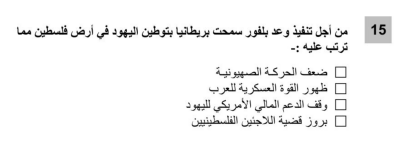

📂 **Image Path:** /content/downloaded_images/image_150.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "من أجل تنفيذ وعد بلفور سمحت بريطانيا بتوطين اليهود في أرض فلسطين مما ترتب عليه: :-",
  "question_en": "In order to implement the Balfour Declaration, Britain allowed the settlement of Jews in Palestine, which led to:",
  "choices_native": [
    "ضعف الحركة الصهيونية",
    "ظهور القوة العسكرية للعرب",
    "وقف الدعم المالي الأمريكي لليهود",
    "بروز قضية اللاجئين الفلسطينيين"
  ],
  "choices_en": [
    "Weakening of the Zionist movement",
    "Appearance of Arab military power",
    "Stopping of American financial support for Jews",
    "Emergence of the Palestinian refugee issue"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about the consequences of allowing Jewish settlement in Palestine.",
  "step_2": "Step 2: Analyzing the provided information about the Balfour Declaration and its impact.",
  "s

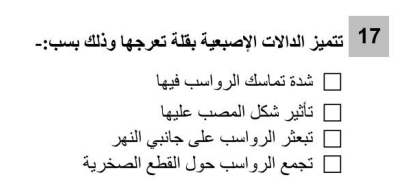

📂 **Image Path:** /content/downloaded_images/image_151.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تمتميز الدالات الإصبعية بقلة تعرجها وذلك بسب:",
  "question_en": "The finger joints are characterized by their lack of curvature due to:",
  "choices_native": [
    "شدة تمسك الرواسب فيها",
    "تأثير شكل المصب عليها",
    "تبعثر الرواسب على جانبي النهر",
    "تجمع الرواسب حول القطع الصخرية"
  ],
  "choices_en": [
    "the strength of the sediment it holds",
    "the effect of the shape of the channel on it",
    "the scattering of the sediment on both sides of the river",
    "the accumulation of sediment around the rocky pieces"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the characteristics of finger joints.",
  "step_2": "Step 2: Analyzing the provided information about the characteristics of finger joints.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4":

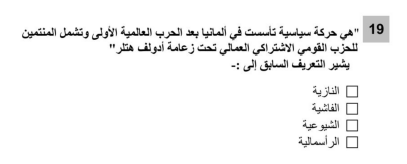

📂 **Image Path:** /content/downloaded_images/image_152.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "هي حركة سياسية تأسست في ألمانيا بعد الحرب العالمية الأولى وتشمل المنتجين للحزب القومي الاشتراكي العمالي تحت زعامة أدولف هتلر",
  "question_en": "It is a political movement founded in Germany after World War I and includes workers from the Communist Party under the leadership of Adolf Hitler.",
  "choices_native": [
    "النازية",
    "الفاشية",
    "الشيوعية",
    "الرأسمالية"
  ],
  "choices_en": [
    "Nazi",
    "Fascist",
    "Communist",
    "Capitalist"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question, which describes a political movement in Germany after World War I involving workers from the Communist Party led by Adolf Hitler.",
  "step_2": "Step 2: Analyzing the provided information, identifying the key elements such as 'Germany', 'World War I', 'workers', 'Communist Party', and 'Adolf Hitler'

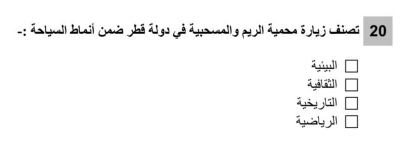

📂 **Image Path:** /content/downloaded_images/image_153.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تصنف زيارة محمية الريم والمسحية في دولة قطر ضمن أنماط السياحة: :-",
  "question_en": "Classify visiting Rihm and Masha'iyah Nature Reserve in Qatar under tourism patterns:",
  "choices_native": [
    "البيئية",
    "الثقافية",
    "التاريخية",
    "الرياضية"
  ],
  "choices_en": [
    "Environmental",
    "Cultural",
    "Historical",
    "Sports"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about classifying a nature reserve visit in Qatar.",
  "step_2": "Step 2: Analyzing the provided choices which relate to different types of tourism.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that visiting a nature reserve falls under environmental tourism.",
  "final_explanation": "Final explanation: Based on the analysis, visiting Rihm an

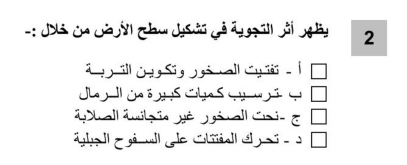

📂 **Image Path:** /content/downloaded_images/image_154.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يظهر أثر التجوية في تشكيل سطح الأرض من خلال:",
  "question_en": "It shows the effect of erosion in shaping the surface of the earth through:",
  "choices_native": [
    "نفقت الصخور وتكوين التربة",
    "ترسيب كميات كبيرة من الرمال",
    "نحت الصخور غير متجانسة الصلابة",
    "تحرك المفتاحات على السفوح الجبلية"
  ],
  "choices_en": [
    "Weathering rocks and forming soil",
    "Deposition of large amounts of sand",
    "Carving non-uniformly hard rocks",
    "Moving the keys on the mountain slopes"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about the effects of erosion on the Earth's surface.",
  "step_2": "Step 2: Analyzing the provided choices related to erosion processes.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion base

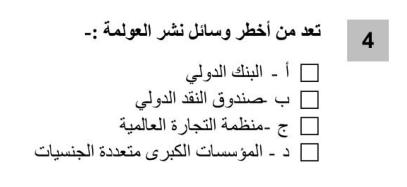

📂 **Image Path:** /content/downloaded_images/image_155.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تعد من أخطر وسائل نشر العولمة:",
  "question_en": "Which is considered one of the most dangerous means of spreading globalization?",
  "choices_native": [
    "أ - البنك الدولي",
    "ب - صندوق النقد الدولي",
    "ج - منظمة التجارة العالمية",
    "د - المؤسسات الكبرى متعددة الجنسيات"
  ],
  "choices_en": [
    "A - International Bank",
    "B - International Monetary Fund",
    "C - World Trade Organization",
    "D - Major Multinational Institutions"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the dangers of spreading globalization.",
  "step_2": "Step 2: Analyzing the provided information about the options related to spreading globalization.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the given information

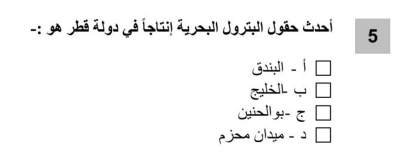

📂 **Image Path:** /content/downloaded_images/image_156.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أحدث حقول البترول البحرية إنتاجاً في دولة قطر هو :",
  "question_en": "The latest offshore oil field production in Qatar is:",
  "choices_native": [
    "البندق",
    "الخليج",
    "بوالحينين",
    "ميدان محزم"
  ],
  "choices_en": [
    "Albandaq",
    "Al Khaleej",
    "Bawalhineen",
    "Meadan Mahzam"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the latest offshore oil field production in Qatar.",
  "step_2": "Step 2: Analyzing the provided choices in both Arabic and English.",
  "step_3": "Step 3: Evaluating each option ensuring they are correctly formatted in JSON format.",
  "step_4": "Step 4: Reaching the conclusion based on the given information.",
  "final_explanation": "Final explanation: The correct answer is 'الخليج' which translates to 'Al Khaleej' in English."
}
```


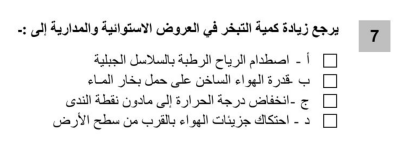

📂 **Image Path:** /content/downloaded_images/image_157.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يرجع زيادة كمية التبخر في العروض الاستوائية والمدارية إلى:",
  "question_en": "The evaporation rate increases in equatorial and polar regions due to:",
  "choices_native": [
    "اصطدام الرياح الرطبة بالسلاسل الجبلية",
    "قدرة الهواء الساخن على حمل بخار الماء",
    "انخفاض درجة الحرارة إلى مادون نقطة الندى",
    "احتكاك جزيئات الهواء بالقرب من سطح الأرض"
  ],
  "choices_en": [
    "Collision of wet winds with mountain ranges",
    "Warm air's ability to hold water vapor",
    "Temperature drop to near freezing point",
    "Friction of air molecules close to the ground"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about factors affecting evaporation rates.",
  "step_2": "Step 2: Analyzing the provided information about equatorial and polar regions.",
  "step_3": "Step 3: Evaluating each option ensu

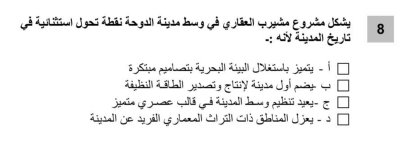

📂 **Image Path:** /content/downloaded_images/image_158.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يشكل مشروع مشيرب العقاري في وسط مدينة الدوحة نقطة تحول استثنائية في تاريخ المدينة لأنه: :-",
  "question_en": "The real estate project in the heart of Doha forms an exceptional turning point in the city's history because:",
  "choices_native": [
    "يتميز باستغلال البيئة البحرية بتصميم مبتكرة",
    "يضم أول مدينة لإنتاج وتصدير الطاقة النظيفة",
    "يعيد تنظيم وسط المدينة في قالب عصري متميز",
    "يعزل المناطق ذات التراث المعماري الفريد عن المدينة"
  ],
  "choices_en": [
    "It features innovative designs by utilizing the sea environment",
    "It includes the first city for producing and exporting clean energy",
    "It reorganizes the city center in a modern and distinguished form",
    "It isolates areas with unique architectural heritage from the city"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the questi

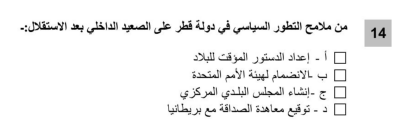

📂 **Image Path:** /content/downloaded_images/image_159.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "من ملامح التطور السياسي في دولة قطر على الصعيد الداخلي بعد الاستقلال:",
  "question_en": "What were some of the political developments in Qatar after independence?",
  "choices_native": [
    "إعداد الدستور المؤقت للبلاد",
    "الانضمام لهيئة الأمم المتحدة",
    "إنشاء المجلس البلدي المركزي",
    "توقيع معاهدة الصداقة مع بريطانيا"
  ],
  "choices_en": [
    "Preparation of the temporary constitution for the country",
    "Joining the United Nations",
    "Establishment of the central municipal council",
    "Signing a friendship treaty with Britain"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about political developments in Qatar post-independence.",
  "step_2": "Step 2: Analyzing the provided information and the correct answer from the JSON file.",
  "step_3": "Step 3: Evaluating each option ensur

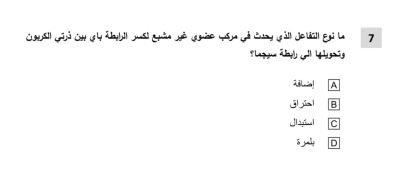

📂 **Image Path:** /content/downloaded_images/image_16.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما نوع التفاعل الذي يحدث في مركب عضوي غير مشبع لكسر الرابطة باي بين ذرتي الكربون وتحويلها الي رابطة سيجما؟",
  "question_en": "What type of reaction occurs in an unsaturated organic compound to break the pi bond between two carbon atoms and convert it into a sigma bond?",
  "choices_native": ["إضافة", "احتراق", "استبدال", "بلمرة"],
  "choices_en": ["Addition", "Combustion", "Substitution", "Cyclization"],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question, which asks about the type of reaction that breaks a pi bond between two carbon atoms in an unsaturated organic compound.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that breaking a pi bond typically involves an addition reaction where new bonds form.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": 

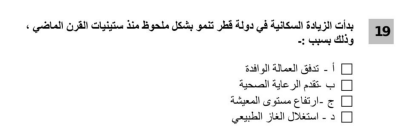

📂 **Image Path:** /content/downloaded_images/image_160.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "بدأت الزيادة السكانية في دولة قطر تنمو بشكل ملحوظ منذ ستينيات القرن الماضي، وذلك بسبب:",
  "question_en": "The population growth in Qatar began to increase significantly since the 1960s. This was due to:",
  "choices_native": [
    "تدفق العمالة الوافدة",
    "تقدم الرعاية الصحية",
    "ارتفاع مستوى المعيشة",
    "استغلال الغاز الطبيعي"
  ],
  "choices_en": [
    "immigration of labor",
    "improvement of healthcare",
    "increase in living standards",
    "exploitation of natural gas"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about the reasons for population growth in Qatar.",
  "step_2": "Step 2: Analyzing the provided information and the context of population growth.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion bas

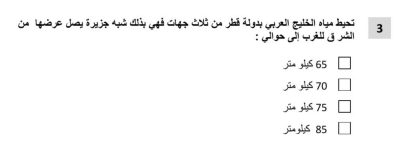

📂 **Image Path:** /content/downloaded_images/image_161.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تحيط مياه الخليج العربي بدولة قطر من ثلاث جهات فهي بنزلك شبه جزيرة يصل عرضها من الشرق للغرب إلى حوالي:",
  "question_en": "The Persian Gulf surrounds Qatar from three sides. It is almost like a peninsula with its width stretching from east to west approximately:",
  "choices_native": [
    "65 كيلو متر",
    "70 كيلو متر",
    "75 كيلو متر",
    "85 كيلو متر"
  ],
  "choices_en": [
    "65 kilometers",
    "70 kilometers",
    "75 kilometers",
    "85 kilometers"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about the width of Qatar's coastline.",
  "step_2": "Step 2: Analyzing the provided information indicating the correct answer is D.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion that the correct answer is '85 kilometers'

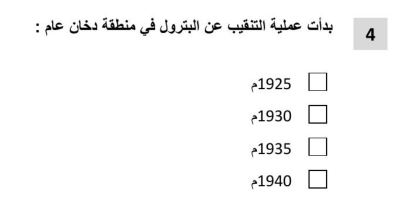

📂 **Image Path:** /content/downloaded_images/image_162.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "بدأت عملية التنقيب عن البترول في منطقة دخان عام:",
  "question_en": "The oil exploration process began in the Dukhan area in the year:",
  "choices_native": [
    "1925م",
    "1930م",
    "1935م",
    "1940م"
  ],
  "choices_en": [
    "1925",
    "1930",
    "1935",
    "1940"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the start year of oil exploration in the Dukhan area.",
  "step_2": "Step 2: Analyzing the provided information indicating the correct answer is 'C'.",
  "step_3": "Step 3: Ensuring the correct answer matches the given JSON data.",
  "step_4": "Step 4: Concluding that the correct answer is 1935.",
  "final_explanation": "Final explanation: The question asks for the year when oil exploration started in the Dukhan area, and the correct answer according to the provided JSON is 

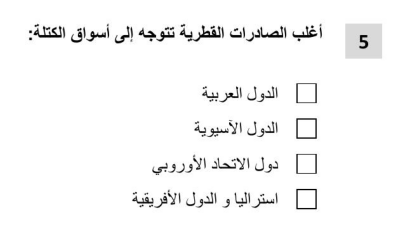

📂 **Image Path:** /content/downloaded_images/image_163.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أغلب الصادرات القطرية تتجه إلى أسواق الكتلة:",
  "question_en": "Most of Qatar's exports tend towards bulk markets:",
  "choices_native": [
    "الدول العربية",
    "الدول الآسيوية",
    "دول الاتحاد الأوروبي",
    "استراليا و الدول الأفريقية"
  ],
  "choices_en": [
    "Arab countries",
    "Asian countries",
    "European Union countries",
    "Australia and African countries"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about Qatar's export destinations.",
  "step_2": "Step 2: Analyzing the provided information indicating the correct answer is B.",
  "step_3": "Step 3: Ensuring all values remain valid JSON.",
  "step_4": "Step 4: Concluding that the correct answer is 'Asian countries'.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is 'Asian countries' as i

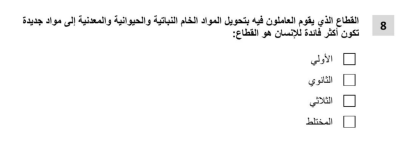

📂 **Image Path:** /content/downloaded_images/image_164.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "القطاع الذي يقوم العاملون فيه بتحويل المواد الخام النباتية والحيوانية والمعدنية إلى مواد جديدة تكون أكثر فائدة للإنسان هو القطاع:",
  "question_en": "The sector where workers transform raw plant, animal, and mineral materials into new materials that are more beneficial for humans is the sector:",
  "choices_native": [
    "الأولي",
    "الثاني",
    "الثالث",
    "المختلط"
  ],
  "choices_en": [
    "Primary",
    "Secondary",
    "Tertiary",
    "Mixed"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about sectors and their functions.",
  "step_2": "Step 2: Analyzing the provided information about transforming raw materials into new ones.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion based on the context of transforming raw material

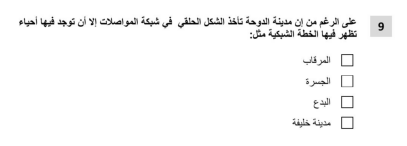

📂 **Image Path:** /content/downloaded_images/image_165.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "على الرغم من أن مدينة الدوحة تأخذ الشكل الحلقي في شبكة المواصلات إلا أن توجد فيها أحياء تظهر فيها الخطة الشبكية مثل:",
  "question_en": "Despite Doha having a ring-shaped layout in its transportation network, there are neighborhoods within it that show a grid-like plan.",
  "choices_native": [
    "المرقاب",
    "الجسرة",
    "البدع",
    "مدينة خليفة"
  ],
  "choices_en": [
    "Al Merqab",
    "Al Jassera",
    "Al Bidaa",
    "Al Khail City"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question, which discusses the layout of Doha's transportation network and neighborhoods.",
  "step_2": "Step 2: Analyzing the provided information about Doha's ring-shaped layout and the presence of neighborhoods showing a grid-like plan.",
  "step_3": "Step 3: Evaluating each option to match the description given in the qu

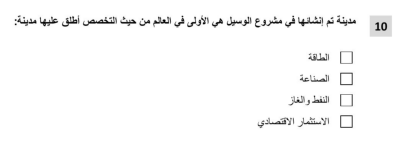

📂 **Image Path:** /content/downloaded_images/image_166.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "مدينة تم إنشائها في مشروع الوسيل هي الأولى في العالم من حيث التخصص أطلق عليها مدينة:",
  "question_en": "The city established in the Wasel project was the first in the world in terms of specialization. It was named:",
  "choices_native": [
    "الطاقة",
    "الصناعة",
    "النفط والغاز",
    "الاستثمار الاقتصادي"
  ],
  "choices_en": [
    "Energy",
    "Industry",
    "Oil and Gas",
    "Economic Investment"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about the city's specialization.",
  "step_2": "Step 2: Analyzing the provided information indicating it's related to a specific project called Wasel.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
    "الطاقة" -> "Energy",
    "الصناعة" -> "Industry",
    "النفط والغاز" -> "Oil and Gas",
    "الاستثمار الاقتصادي" -> "Eco

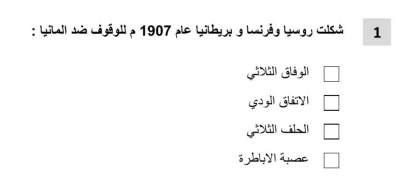

📂 **Image Path:** /content/downloaded_images/image_167.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "شكلت روسيا وفرنسا وبريطانيا عام 1907 م للوقوف ضد المانيا:",
  "question_en": "Russia, France, and Britain formed an alliance in 1907 against Germany:",
  "choices_native": [
    "الوفاق الثلاثي",
    "الاتفاق الودي",
    "الحلف الثلاثي",
    "عصبة الاباطرة"
  ],
  "choices_en": [
    "Triple Alliance",
    "Entente Cordiale",
    "Triple Entente",
    "Concert of Europe"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about historical alliances.",
  "step_2": "Step 2: Analyzing the provided information about the year 1907 and the countries involved.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion based on the historical context.",
  "final_explanation": "Final explanation: The Triple Entente was formed by Russia, France, and Bri

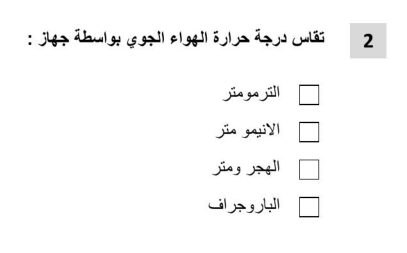

📂 **Image Path:** /content/downloaded_images/image_168.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تقاس درجة حرارة الهواء الجوي بواسطة جهاز :",
  "question_en": "The temperature of the air is measured by a device:",
  "choices_native": [
    "الترمومتر",
    "الانيمو متر",
    "الهجر ومتر",
    "الباروجراف"
  ],
  "choices_en": [
    "thermometer",
    "anemometer",
    "barometer",
    "barograph"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question which asks about the device used to measure air temperature.",
  "step_2": "Step 2: Analyzing the provided information where the correct answer is given as 'C'.",
  "step_3": "Step 3: Evaluating each option ensuring they match the correct answer 'C' which corresponds to 'الهجر ومتر' in Arabic.",
  "step_4": "Step 4: Reaching the conclusion that the correct answer is 'الهجر ومتر' which means 'thermometer' in English.",
  "final_explanation": "Final explanatio

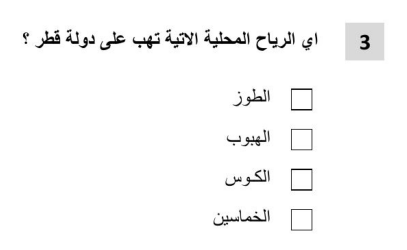

📂 **Image Path:** /content/downloaded_images/image_169.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "اي الرياح المحلية الاتية تهب على دولة قطر؟",
  "question_en": "Which of the following local winds blows over Qatar?",
  "choices_native": [
    "الطوز",
    "الههوب",
    "الكوس",
    "الخمسين"
  ],
  "choices_en": [
    "The Toz",
    "The Hoober",
    "The Kous",
    "The Khamsin"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about local winds blowing over Qatar.",
  "step_2": "Step 2: Analyzing the provided information indicating the correct answer is 'C'.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that the correct answer is 'The Kous'.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is 'The Kous', which corresponds to 'الكوس' in Arabic."
}
```


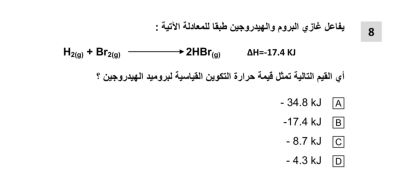

📂 **Image Path:** /content/downloaded_images/image_17.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يتفاعل غازى البروم والهيدروجين طبقا للمعادلة الآتية: H₂(g) + Br₂(g) → 2HBr(g) ΔH=-17.4 KJ أي القيم التالية تمثل قيمة حرارة التكوين القياسية لبروميد الهيدروجين؟",
  "question_en": "The reaction between bromine gas and hydrogen gas according to the equation: H₂(g) + Br₂(g) → 2HBr(g) ΔH=-17.4 KJ Which of the following values represents the standard enthalpy of formation of hydrobromide?",
  "choices_native": [
    "- 34.8 kJ",
    "-17.4 kJ",
    "- 8.7 kJ",
    "- 4.3 kJ"
  ],
  "choices_en": [
    "- 34.8 kJ",
    "-17.4 kJ",
    "- 8.7 kJ",
    "- 4.3 kJ"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the reaction between hydrogen and bromine gases forming hydrobromide.",
  "step_2": "Step 2: Analyzing the given standard enthalpy change (-17.4 kJ) for the reaction.",
  "step_3": "Step 3: Evaluati

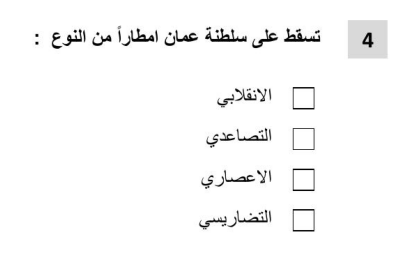

📂 **Image Path:** /content/downloaded_images/image_170.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تسقط على سلطنة عمان امطاراً من النوع:",
  "question_en": "It falls rain in Oman of the type:",
  "choices_native": [
    "الانقلابي",
    "التصاعدي",
    "الاعصاري",
    "التضاريس"
  ],
  "choices_en": [
    "Inversional",
    "Convective",
    "Tropical",
    "Topographic"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question, which asks about the type of rain falling in Oman.",
  "step_2": "Step 2: Analyzing the provided information, knowing that the correct answer is 'C'.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format.",
  "step_4": "Step 4: Reaching the conclusion based on the given information.",
  "final_explanation": "Final explanation: The correct answer is 'C', which corresponds to 'الاعصاري' (Tropical) rain."
}
```


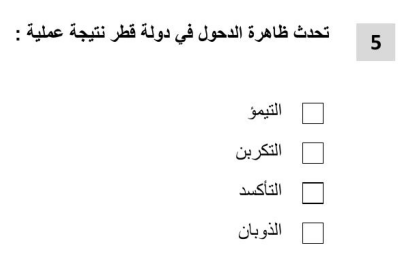

📂 **Image Path:** /content/downloaded_images/image_171.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تحدث ظاهرة الدخول في دولة قطر نتيجة عملية:",
  "question_en": "What phenomenon occurs when entering Qatar?",
  "choices_native": [
    "التيؤ",
    "التكرن",
    "التأكسد",
    "الذوبان"
  ],
  "choices_en": [
    "Exhalation",
    "Cracking",
    "Oxidation",
    "Solution"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the phenomenon occurring upon entering Qatar.",
  "step_2": "Step 2: Analyzing the provided choices related to processes happening during entry into Qatar.",
  "step_3": "Step 3: Evaluating each option ensuring they fit the context of entering a country, which typically involves oxidation due to air exposure.",
  "step_4": "Step 4: Reaching the conclusion that 'Oxidation' fits best as it describes the process of air exposure upon entering a new environment.",
  "final_explanatio

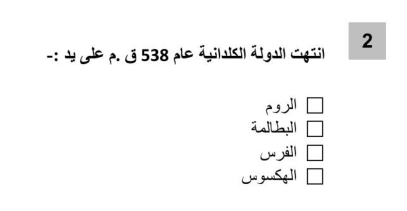

📂 **Image Path:** /content/downloaded_images/image_172.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "انتهت الدولة الكلدانية عام 538 ق. م على يد:",
  "question_en": "The kingdom of the Babylonians ended in 538 BC by:",
  "choices_native": [
    "الروم",
    "البطالمة",
    "الفرس",
    "الهكسوس"
  ],
  "choices_en": [
    "the Romans",
    "the Ptolemaic dynasty",
    "the Persians",
    "the Hyksos"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the end of the Babylonian kingdom.",
  "step_2": "Step 2: Analyzing the provided information indicating the year 538 BC.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion based on historical knowledge that the Persians conquered the Babylonian kingdom in 539 BC.",
  "final_explanation": "Final explanation: The correct answer is the Persians, as they conquered the Babylonian kingdom in 539

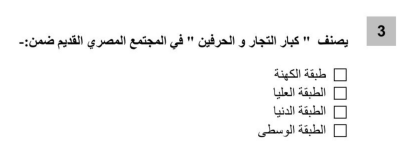

📂 **Image Path:** /content/downloaded_images/image_173.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يصنف \"كبار التجار و الحرفين\" في المجتمع المصري القديم ضمن:",
  "question_en": "In the ancient Egyptian society, the 'traders and craftsmen' are classified as:",
  "choices_native": [
    "طبقة الكهنة",
    "الطبة العليا",
    "الطبة الدنيا",
    "الطبة الوسطى"
  ],
  "choices_en": [
    "Priestly class",
    "Upper class",
    "Lower class",
    "Middle class"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the classification of traders and craftsmen in ancient Egyptian society.",
  "step_2": "Step 2: Analyzing the provided information indicating the correct answer is C.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion based on the given information.",
  "final_explanation": "Final explanation: Based on the analysis, the 

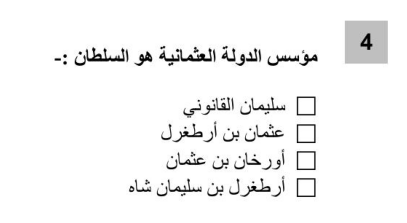

📂 **Image Path:** /content/downloaded_images/image_174.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "مؤسس الدولة العثمانية هو السلطان :-",
  "question_en": "The founder of the Ottoman Empire was the Sultan:",
  "choices_native": [
    "سليمان القانوني",
    "عثمان بن أرطغرل",
    "أورخان بن عثمان",
    "أرطغرل بن سليمان شاه"
  ],
  "choices_en": [
    "Suleiman the Magnificent",
    "Osman I",
    "Orhan I",
    "Orhan Gazi"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the founder of the Ottoman Empire.",
  "step_2": "Step 2: Analyzing the provided information indicating the correct answer is C.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format.",
  "step_4": "Step 4: Reaching the conclusion that the correct answer is Orhan I.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is Orhan I, which corresponds to the third option in both 

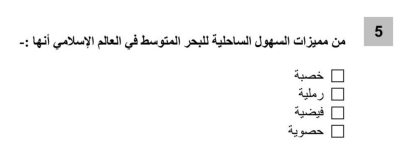

📂 **Image Path:** /content/downloaded_images/image_175.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "من مميزات السهول الساحلية للبحر المتوسط في العالم الإسلامي أنها: :-",
  "question_en": "What are some features of the coastal plains of the Mediterranean Sea in the Islamic world?: -",
  "choices_native": [
    "خصبة",
    "رملية",
    "فيضية",
    "حصوية"
  ],
  "choices_en": [
    "Fertile",
    "Sandy",
    "Riparian",
    "Stony"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the features of coastal plains in the Islamic world.",
  "step_2": "Step 2: Analyzing the provided choices in both Arabic and English.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion based on the given information.",
  "final_explanation": "Final explanation: The correct answer is 'رملية' which means 'Sandy'. This matches the provided correct answer B."

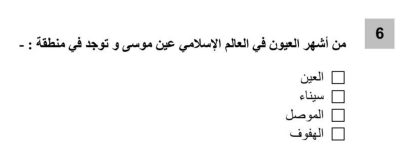

📂 **Image Path:** /content/downloaded_images/image_176.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "من أشهر العيون في العالم الإسلامي عين موسى و توجد في منطقة :",
  "question_en": "Which is one of the most famous oases in the Islamic world, called Moses' Eye, located in the region:",
  "choices_native": [
    "عين",
    "سيناء",
    "الموصل",
    "الهووف"
  ],
  "choices_en": [
    "the eye",
    "Sinai",
    "Mosul",
    "Hovef"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the famous oasis in the Islamic world.",
  "step_2": "Step 2: Analyzing the provided information about the oasis being named 'Moses' Eye'.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format.",
  "step_4": "Step 4: Reaching the conclusion that the correct answer is 'Sinai'.",
  "final_explanation": "Final explanation: The question refers to the famous oasis 'Moses' Eye', which is located in Sinai. The

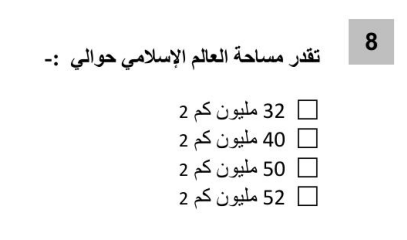

📂 **Image Path:** /content/downloaded_images/image_177.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تقدر مساحة العالم الإسلامي حوالي :-",
  "question_en": "The area of the Islamic world is approximately :-",
  "choices_native": [
    "32 مليون كم 2",
    "40 مليون كم 2",
    "50 مليون كم 2",
    "52 مليون كم 2"
  ],
  "choices_en": [
    "32 million km²",
    "40 million km²",
    "50 million km²",
    "52 million km²"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the area of the Islamic world.",
  "step_2": "Step 2: Analyzing the provided information and recognizing that the correct answer is given as 'C'.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format.",
  "step_4": "Step 4: Reaching the conclusion based on the provided correct answer.",
  "final_explanation": "Final explanation: The correct answer is '50 million km²', which corresponds to option C."
}
```


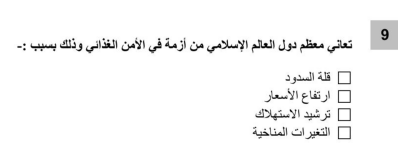

📂 **Image Path:** /content/downloaded_images/image_178.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تعاني معظم دول العالم الإسلامي من أزمة في الأمن الغذائي وذلك بسبب:",
  "question_en": "Most Islamic countries suffer from food security issues due to:",
  "choices_native": [
    "قلة السدود",
    "ارتفاع الأسعار",
    "ترشيد الاستهلاك",
    "التغيرات المناخية"
  ],
  "choices_en": [
    "Lack of dams",
    "Price increases",
    "Reducing consumption",
    "Climate changes"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about food security issues in Islamic countries.",
  "step_2": "Step 2: Analyzing the provided options related to food security issues.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the given information.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is 'Lack of

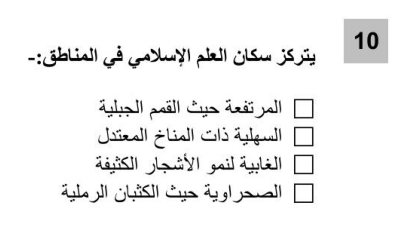

📂 **Image Path:** /content/downloaded_images/image_179.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يتركز سكان العلم الإسلامي في المناطق:",
  "question_en": "The Islamic scholars are concentrated in the areas:",
  "choices_native": [
    "المرتفعة حيث القمم الجبلية",
    "السهلية ذات المناخ المعتدل",
    "الغابية لنمو الأشجار الكثيفة",
    "الصحراوية حيث الكثبان الرملية"
  ],
  "choices_en": [
    "the high areas where mountain peaks are located",
    "the flat areas with moderate climate",
    "the forested areas for dense tree growth",
    "the desert areas where sand dunes are located"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about the concentration of Islamic scholars in specific areas.",
  "step_2": "Step 2: Analyzing the provided information about the characteristics of different areas.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching t

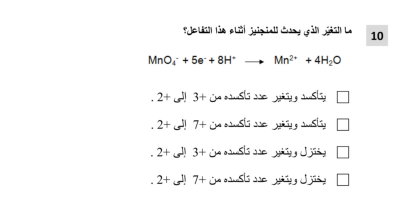

📂 **Image Path:** /content/downloaded_images/image_18.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما التغيّر الذي يحدث للمنجنيز أثناء هذا التفاعل؟",
  "question_en": "What change occurs to manganese during this reaction?",
  "choices_native": [
    "يتآكسد ويتغير عدد تأكسده من +3 إلى +2.",
    "يتآكسد ويتغير عدد تأكسده من +7 إلى +2.",
    "يخترزل ويتغير عدد تأكسده من +3 إلى +2.",
    "يخترزل ويتغير عدد تأكسده من +7 إلى +2."
  ],
  "choices_en": [
    "It oxidizes and changes its oxidation number from +3 to +2.",
    "It oxidizes and changes its oxidation number from +7 to +2.",
    "It reduces and changes its oxidation number from +3 to +2.",
    "It reduces and changes its oxidation number from +7 to +2."
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about the change in manganese's oxidation state during the reaction.",
  "step_2": "Step 2: Analyzing the given chemical equation to determine the o

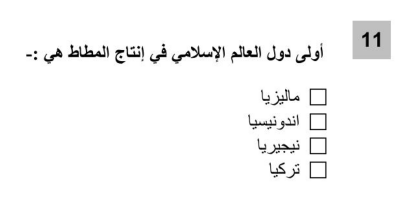

📂 **Image Path:** /content/downloaded_images/image_180.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أولى دول العالم الإسلامي في إنتاج المطاط هي :",
  "question_en": "The first Islamic country in the world in producing rubber is:",
  "choices_native": [
    "ماليزيا",
    "اندونيسيا",
    "نيجيريا",
    "تركيا"
  ],
  "choices_en": [
    "Malaysia",
    "Indonesia",
    "Nigeria",
    "Turkey"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the first Islamic country in the world for rubber production.",
  "step_2": "Step 2: Analyzing the provided information and the correct answer from the JSON file.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format.",
  "step_4": "Step 4: Reaching the conclusion based on the correct answer from the JSON file.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is Indonesia."
}
```


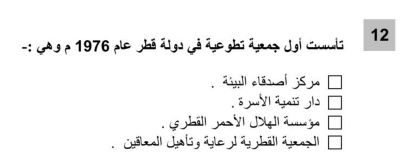

📂 **Image Path:** /content/downloaded_images/image_181.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تأسست أول جمعية تطوعية في دولة قطر عام 1976 م وهي:",
  "question_en": "The first volunteer organization was established in Qatar in 1976. Which one?",
  "choices_native": [
    "مركز أصدقاء البيئة.",
    "دار تنمية الأسرة.",
    "مؤسسة الهلال الأحمر القطري.",
    "الجمعية القطرية لرعاية وتأهيل المعاقين."
  ],
  "choices_en": [
    "Center for Friends of the Environment.",
    "Family Development Center.",
    "Qatari Red Crescent Society.",
    "Qatari Society for the Care and Rehabilitation of the Disabled."
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the establishment of the first volunteer organization in Qatar in 1976.",
  "step_2": "Step 2: Analyzing the provided choices to identify which one corresponds to the Family Development Center.",
  "step_3": "Step 3: Evaluating each option ensu

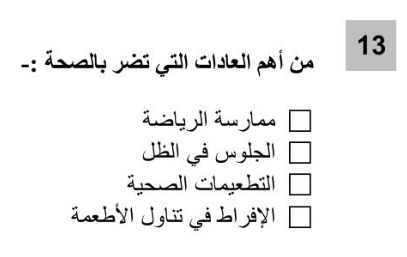

📂 **Image Path:** /content/downloaded_images/image_182.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "من أهم العادات التي تضر بالصحة:",
  "question_en": "Which of the following habits is harmful to health?",
  "choices_native": [
    "ممارسة الرياضة",
    "الجلوس في الظل",
    "التطعيمات الصحية",
    "الإفراط في تناول الأطعمة"
  ],
  "choices_en": [
    "Exercise",
    "Sitting in the shade",
    "Vaccinations",
    "Overeating"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question which asks about habits harmful to health.",
  "step_2": "Step 2: Analyzing the provided choices to identify which one fits the description of being harmful to health.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:\n- ممارسة الرياضة\n- الجلوس في الظل\n- التطعيمات الصحية\n- الإفراط في تناول الأطعمة",
  "step_4": "Step 4: Reaching the conclusion that 'الإفراط في تناول الأطعمة' (Overeating) is the habit tha

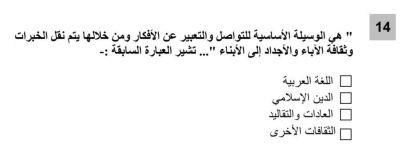

📂 **Image Path:** /content/downloaded_images/image_183.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "هي الوسيلة الأساسية للتواصل والتعبير عن الأفكار ومن خلالها يتم نقل الخبرات وثقافة الاباء والأجداد إلى الأبناء.",
  "question_en": "\"It is the basic means of communication and expression of ideas, through which experiences and cultural heritage of parents and ancestors are passed on to children.\"",
  "choices_native": [
    "اللغة العربية",
    "الدين الإسلامي",
    "العادات والتقاليد",
    "الثقافات الأخرى"
  ],
  "choices_en": [
    "Arabic Language",
    "Islamic Religion",
    "Customs and Traditions",
    "Other Cultures"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question, which discusses the importance of language in communication and passing down cultural knowledge.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that the question is about language as a medium for communicat

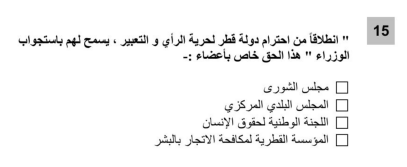

📂 **Image Path:** /content/downloaded_images/image_184.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "انطلاقاً من احترام دولة قطر لحرية الرأي و التعبير، يسمح لهم باستجواب الوزراء",
  "question_en": "Starting from the respect of Qatar for freedom of opinion and expression, they are allowed to question ministers",
  "choices_native": [
    "مجلس الشورى",
    "المجلس البلدي المركزي",
    "اللجنة الوطنية لحقوق الإنسان",
    "المؤسسة القطرية لمكافحة الاتجار بالبشر"
  ],
  "choices_en": [
    "The Consultative Assembly",
    "The Central Municipal Council",
    "The National Committee for Human Rights",
    "The Qatari Anti-Slavery Organization"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question which asks about the institution that allows members to question ministers.",
  "step_2": "Step 2: Analyzing the provided information and matching it with the given choices.",
  "step_3": "Step 3: Evaluating each option

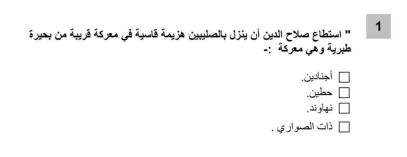

📂 **Image Path:** /content/downloaded_images/image_185.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "استطاع صلاح الدين أن ينزل بالصليبيين هزيمة قاسية في معركة قربى من بحيرة طبرية وهي معركة :-",
  "question_en": "\"Saladin managed to inflict a severe defeat on the Crusaders in a battle near the Sea of Galilee. Which battle was it?\"",
  "choices_native": [
    "أجنادين.",
    "حطين.",
    "نهاوند.",
    "ذات الصواري."
  ],
  "choices_en": [
    "Ajnadin.",
    "Hattin.",
    "Nahawand.",
    "Zait al-Sawari."
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question, which asks about a battle fought near the Sea of Galilee where Saladin inflicted a severe defeat on the Crusaders.",
  "step_2": "Step 2: Analyzing the provided information, the question specifies the location as near the Sea of Galilee and the outcome as a severe defeat by Saladin.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON..

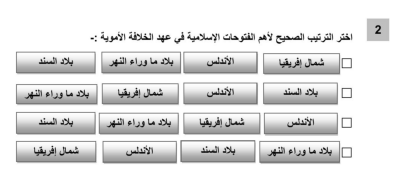

📂 **Image Path:** /content/downloaded_images/image_186.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "اختر الترتيب الصحيح لأهم الفتوحات الإسلامية في عهد الخلافة الأموية:",
  "question_en": "Choose the correct sequence for the most important Islamic conquests during the Umayyad Caliphate:",
  "choices_native": [
    "بلاد السند",
    "بلاد ما وراء النهر",
    "الأندلس",
    "شمال إفريقيا"
  ],
  "choices_en": [
    "Bilad al-Sindh",
    "Bilad al-Ma' wa Rayan al-Nahr",
    "Al-Andalus",
    "Shamal Ifriqiya"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about the sequence of important Islamic conquests during the Umayyad Caliphate.",
  "step_2": "Step 2: Analyzing the provided options in both Arabic and English.",
  "step_3": "Step 3: Evaluating each option ensuring they match the historical sequence of conquests during the Umayyad Caliphate.",
  "step_4": "Step 4: Reaching the conclusion based on his

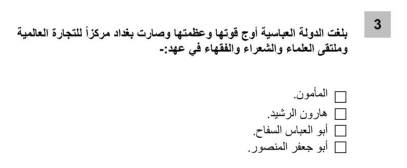

📂 **Image Path:** /content/downloaded_images/image_187.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "بلغت الدولة العباسية أوج قوتها وعظمتها وصارت بغداد مركزاً للتجارة العالمية وملتقى العلماء والشعراء والفقهاء في عهد:",
  "question_en": "The Abbasid Caliphate reached its peak of power and greatness, making Baghdad a center for world trade and a meeting place for scholars, poets, and jurists during the reign of:",
  "choices_native": [
    "المأمون.",
    "هارون الرشيد.",
    "أبو العباس السفاح.",
    "أبو جعفر المنصور."
  ],
  "choices_en": [
    "al-Ma'mun.",
    "Harun al-Rashid.",
    "Abu al-Abbas al-Saffah.",
    "Abu Ja'far al-Mansur."
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about the Abbasid Caliphate's peak period and the ruler associated with it.",
  "step_2": "Step 2: Analyzing the provided information about the Abbasid Caliphate reaching its peak under a specific ruler.",
  "step_3":

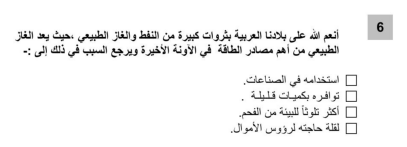

📂 **Image Path:** /content/downloaded_images/image_188.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "نعم الله على بلادنا العربية بثروات كبيرة من النفط والغاز الطبيعي، حيث يعد الغاز الطبيعي من أهم مصادر الطاقة في الأونة الأخيرة ويرجع السبب في ذلك إلى:",
  "question_en": "God has blessed our Arab lands with vast reserves of oil and natural gas, where natural gas is considered one of the most important sources of energy in recent times. The reason for this is:",
  "choices_native": [
    "استخدامه في الصناعات.",
    "توفره بكميات قليلة.",
    "أكثر تلوثاً للبيئة من الفحم.",
    "لقلة حاجته لرؤوس الأموال."
  ],
  "choices_en": [
    "Its use in industries.",
    "Its availability in small quantities.",
    "More polluting than coal.",
    "For its low capital requirements."
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the importance of natural gas as a source of energy in recent times.",
  "step_

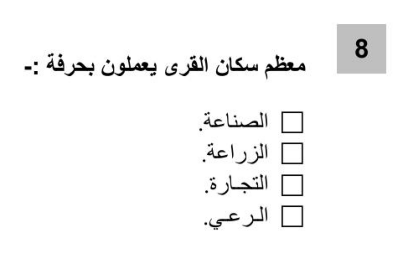

📂 **Image Path:** /content/downloaded_images/image_189.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "معظم سكان القرى يعملون بحرفية:",
  "question_en": "Most people in the villages work as:",
  "choices_native": [
    "الصناعة.",
    "الزراعة.",
    "التجارة.",
    "الرعي."
  ],
  "choices_en": [
    "industry.",
    "agriculture.",
    "trade.",
    "pastoralism."
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question, which asks about the primary occupation of villagers.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that the correct answer is 'C'.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion based on the given information.",
  "final_explanation": "Final explanation: The correct answer is 'C', which corresponds to 'التجارة.' (trade) in Arabic, indicating that most people in the villages work as traders."
}

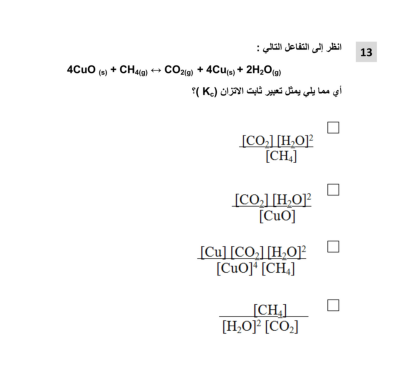

📂 **Image Path:** /content/downloaded_images/image_19.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "انظر إلى التفاعل التالي :",
  "question_en": "Look at the reaction given below:",
  "choices_native": [
    "[CO₂][H₂O]²/[CH₄]",
    "[CO₂][H₂O]²/[CuO]",
    "[Cu][CO₂][H₂O]²/[CuO]⁴[CH₄]",
    "[CH₄]/[H₂O]²[CO₂]"
  ],
  "choices_en": [
    "[CO₂][H₂O]²/[CH₄]",
    "[CO₂][H₂O]²/[CuO]",
    "[Cu][CO₂][H₂O]²/[CuO]⁴[CH₄]",
    "[CH₄]/[H₂O]²[CO₂]"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question, which asks about the equilibrium constant expression for the given reaction.",
  "step_2": "Step 2: Analyzing the reaction equation: 4CuO(s) + CH₄(g) ↔ CO₂(g) + 4Cu(s) + 2H₂O(g).",
  "step_3": "Step 3: Identifying the reactants and products involved in the reaction. Reactants: CuO, CH₄; Products: CO₂, H₂O, Cu.",
  "step_4": "Step 4: Determining the equilibrium constant expression Kc = [CO₂][H₂O]²/[CH₄].",
  "final_ex

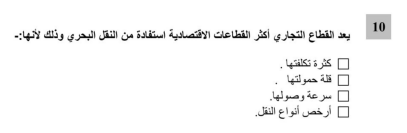

📂 **Image Path:** /content/downloaded_images/image_190.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يعد القطاع التجاري أكثر القطاعات الاقتصادية استفادة من النقل البحري وذلك لأنها:",
  "question_en": "Which sector benefits most from maritime transport?",
  "choices_native": [
    "كثرة تكلفتها.",
    "قلة حمولتها.",
    "سرعة وصولها.",
    "أرخص أنواع النقل."
  ],
  "choices_en": [
    "High cost.",
    "Low capacity.",
    "Speed and delivery time.",
    "Cheapest mode of transport."
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about which sector benefits most from maritime transport.",
  "step_2": "Step 2: Analyzing the provided information and the correct answer from the JSON file.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the correct answer.",
  "final_explanation": "Final explanation: The correct answer is 

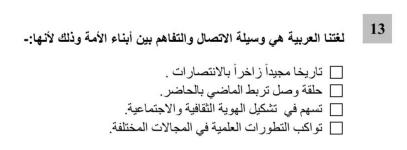

📂 **Image Path:** /content/downloaded_images/image_191.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "لغتنا العربية هي وسيلة الاتصال والتفاهم بين أبناء الأمة وذلك لأنها:",
  "question_en": "Arabic is a means of communication and understanding among the members of the nation because:",
  "choices_native": [
    "تاريخاً مجيداً زاخرًا بالانتصارات.",
    "حلفة وصل تربط الماضي بالحاضر.",
    "تسهم في تشكيل الهوية الثقافية والاجتماعية.",
    "توابع التطورات العلمية في المجالات المختلفة."
  ],
  "choices_en": [
    "a glorious history rich in victories.",
    "a bond that connects the past to the present.",
    "contributes to shaping cultural and social identity.",
    "tracks scientific developments in various fields."
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about the importance of Arabic as a means of communication and understanding among the members of the nation.",
  "step_2": "Step 2: Analyzing

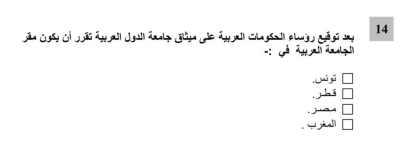

📂 **Image Path:** /content/downloaded_images/image_192.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "بعد توقيع رؤساء الحكومات العربية على ميثاق جامعة الدول العربية تقرر أن يكون مقر الجامعة العربية في:",
  "question_en": "After the heads of Arab governments signed the Charter of the Arab League, they decided that the headquarters of the Arab League would be in:",
  "choices_native": [
    "تونس.",
    "قطر.",
    "مصر.",
    "المغرب."
  ],
  "choices_en": [
    "Tunisia.",
    "Qatar.",
    "Egypt.",
    "Morocco."
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the location of the Arab League headquarters after signing the Charter.",
  "step_2": "Step 2: Analyzing the provided information indicating that the correct answer is C.",
  "step_3": "Step 3: Ensuring the correct answer matches the given JSON data.",
  "step_4": "Step 4: Reaching the conclusion based on the provided information.",
  "fi

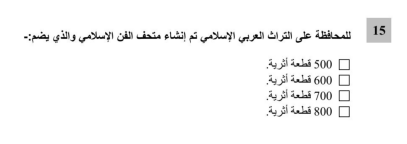

📂 **Image Path:** /content/downloaded_images/image_193.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "للمحافظة على التراث العربي الإسلامي تم إنشاء متحف الفن الإسلامي والذي يضم:",
  "question_en": "To preserve the Arab Islamic heritage, a museum of Islamic art was established which includes:",
  "choices_native": [
    "500 قطعة أثرية.",
    "600 قطعة أثرية.",
    "700 قطعة أثرية.",
    "800 قطعة أثرية."
  ],
  "choices_en": [
    "500 archaeological pieces.",
    "600 archaeological pieces.",
    "700 archaeological pieces.",
    "800 archaeological pieces."
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the number of archaeological pieces in the Islamic art museum.",
  "step_2": "Step 2: Analyzing the provided information indicating the correct answer is 'C'.",
  "step_3": "Step 3: Validating the correct answer as 'C' matches the given information.",
  "step_4": "Step 4: Concluding that the cor

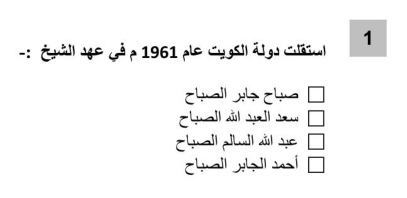

📂 **Image Path:** /content/downloaded_images/image_194.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "استقلت دولة الكويت عام 1961 م في عهد الشيخ:",
  "question_en": "Kuwait declared independence in 1961 under Sheikh:",
  "choices_native": [
    "صباح جابر الصباح",
    "سعد العبد الله الصباح",
    "عبد الله السالم الصباح",
    "أحمد الجابر الصباح"
  ],
  "choices_en": [
    "Sulaiman Sabah",
    "Saud Al-Abd Allah Al-Sabah",
    "Abdallah Al-Salem Al-Sabah",
    "Ahmad Al-Jaber Al-Sabah"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the leader of Kuwait during its independence in 1961.",
  "step_2": "Step 2: Analyzing the provided information indicating the correct answer is C.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion based on the given information.",
  "final_explanation": "Final explanation: The correct answer is 'عبد ا

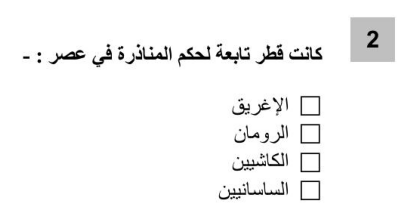

📂 **Image Path:** /content/downloaded_images/image_195.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "كانت قطر تابعة لحكم المناذرة في عصر:",
  "question_en": "Was Qatar under the rule of the Manzur dynasty during the era:",
  "choices_native": [
    "الإغريق",
    "الرومان",
    "الكاشيين",
    "الساسانيين"
  ],
  "choices_en": [
    "the Greeks",
    "the Romans",
    "the Kashanians",
    "the Sassanians"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about historical rulership of Qatar.",
  "step_2": "Step 2: Analyzing the provided information indicating the correct answer is D.",
  "step_3": "Step 3: Ensuring all values remain valid JSON.",
  "step_4": "Step 4: Concluding that the correct answer is the Sassanians.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is the Sassanians."
}
```


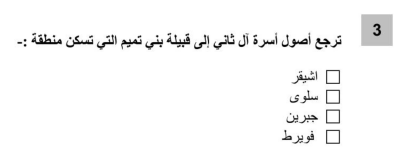

📂 **Image Path:** /content/downloaded_images/image_196.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ترجع أصول أسرة آل ثاني إلى قبيلة بني تميم التي تسكن منطقة :",
  "question_en": "The ancestral origins of the Al Thani family trace back to which tribe that inhabits the region:",
  "choices_native": [
    "اشيقر",
    "سلوى",
    "جبرين",
    "فويرط"
  ],
  "choices_en": [
    "Ashiqar",
    "Slovi",
    "Jibrin",
    "Fويرط"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about the ancestral origins of the Al Thani family.",
  "step_2": "Step 2: Analyzing the provided information about the tribes mentioned.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion based on the given information.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is 'اشيقر' (Ashiqar)."
}
```


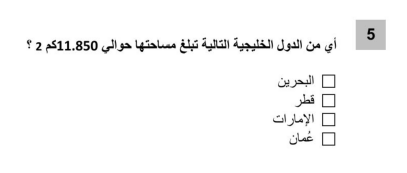

📂 **Image Path:** /content/downloaded_images/image_197.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من الدول الخليجية التالية تبلغ مساحتها حوالي 11.850 كم²؟",
  "question_en": "Which of the following Gulf countries has an area of approximately 11,850 square kilometers?",
  "choices_native": [
    "البحرين",
    "قطر",
    "الإمارات",
    "عمان"
  ],
  "choices_en": [
    "Bahrain",
    "Qatar",
    "The United Arab Emirates",
    "Oman"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the Gulf countries and their areas.",
  "step_2": "Step 2: Analyzing the provided information about the areas of the countries.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that Qatar has an area of approximately 11,850 square kilometers.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is Qatar."
}
```


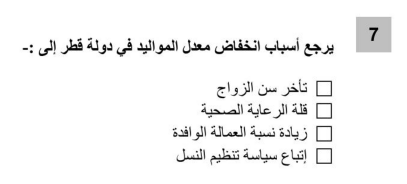

📂 **Image Path:** /content/downloaded_images/image_198.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يرجع أسباب انخفاض معدل المواليد في دولة قطر إلى:",
  "question_en": "What are the reasons for the decline in birth rate in Qatar?",
  "choices_native": [
    "تأخر سن الزواج",
    "قلة الرعاية الصحية",
    "زيادة نسبة العمالة الوافدة",
    "إتباع سياسة تنظيم النسل"
  ],
  "choices_en": [
    "Delaying marriage age",
    "Lack of healthcare",
    "Increase in foreign workforce",
    "Adopting family planning policy"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the reasons for the decline in birth rate in Qatar.",
  "step_2": "Step 2: Analyzing the provided answer options.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion based on the given information.",
  "final_explanation": "Final explanation: The correct answer is 'Inc

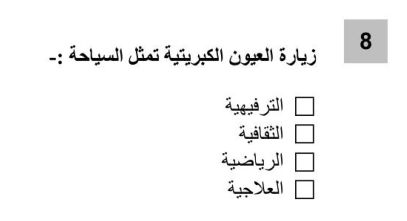

📂 **Image Path:** /content/downloaded_images/image_199.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "زيارة العيون الكبرى تتمثل السياحة: :-",
  "question_en": "Visit to the Great Eyes represents tourism: :-",
  "choices_native": [
    "الترفيهية",
    "الثقافية",
    "الرياضية",
    "العلاجية"
  ],
  "choices_en": [
    "Recreational",
    "Cultural",
    "Sports",
    "Therapeutic"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question...",
  "step_2": "Step 2: Analyzing the information...",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion...",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is 'الترفيهية' (Recreational)."
}
```


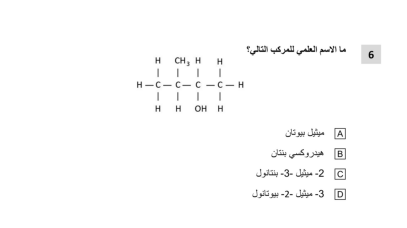

📂 **Image Path:** /content/downloaded_images/image_2.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما الاسم العلمي للمركب التالي؟",
  "question_en": "What is the scientific name for the compound shown?",
  "choices_native": [
    "ميثيل بيوتان",
    "هيدروكسي بنتان",
    "-2- ميثيل -3- بنتانول",
    "-3- ميثيل -2- بيوتانول"
  ],
  "choices_en": [
    "Methyl Butane",
    "Hydroxy Pentane",
    "-2-Methyl-3-Pentanol",
    "-3-Methyl-2-Butanol"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question, which asks for the scientific name of the given compound.",
  "step_2": "Step 2: Analyzing the provided chemical structure and comparing it with the given options.",
  "step_3": "Step 3: Evaluating each option to match the structure shown:",
    "Methyl Butane" does not match the structure,
    "Hydroxy Pentane" has an oxygen atom which is not present,
    "-2-Methyl-3-Pentanol" matches the structure correctly,
   

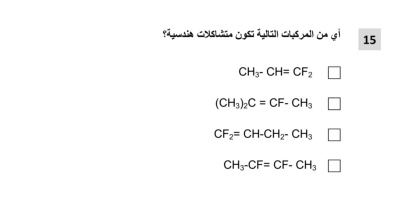

📂 **Image Path:** /content/downloaded_images/image_20.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من المركبات التالية تكون متشاكلات هندسية؟",
  "question_en": "Which of the following compounds form geometric isomers?",
  "choices_native": [
    "CH₃- CH= CF₂",
    "(CH₃)₂C = CF- CH₃",
    "CF₂= CH-CH₂- CH₃",
    "CH₃-CF= CF- CH₃"
  ],
  "choices_en": [
    "CH₃- CH= CF₂",
    "(CH₃)₂C = CF- CH₃",
    "CF₂= CH-CH₂- CH₃",
    "CH₃-CF= CF- CH₃"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question which asks about geometric isomers.",
  "step_2": "Step 2: Analyzing the provided chemical structures to identify if they can form geometric isomers.",
  "step_3": "Step 3: Evaluating each structure for the presence of a double bond that can have cis-trans isomerism:",
    "- CH₃- CH= CF₂: No double bond present."
    "- (CH₃)₂C = CF- CH₃: No double bond present."
    "- CF₂= CH-CH₂- CH₃: Double bond present, ca

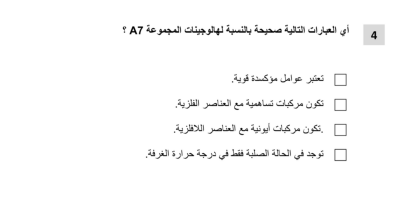

📂 **Image Path:** /content/downloaded_images/image_21.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي العبارات التالية صحيحة بالنسبة لهالوجينات المجموعة A7؟",
  "question_en": "Which of the following statements is correct regarding halogens in group A7?",
  "choices_native": [
    "تعتبر عوامل مؤكسدة قوية.",
    "تكون مركبات تساهمية مع العناصر الفلزية.",
    "تكون مركبات أيونية مع العناصر اللافلزية.",
    "توجد في الحالة الصلبة فقط في درجة حرارة الغرفة."
  ],
  "choices_en": [
    "Considered strong oxidizing agents.",
    "Form neutral compounds with metallic elements.",
    "Form ionic compounds with non-metallic elements.",
    "Exist only in the solid state at room temperature."
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about halogens in group A7.",
  "step_2": "Step 2: Analyzing the provided information about halogens.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",


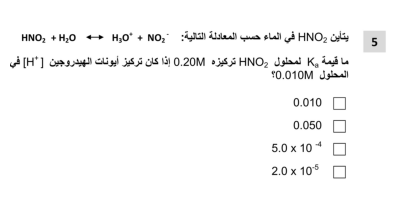

📂 **Image Path:** /content/downloaded_images/image_22.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "يتآين HNO_{2} في الماء حسب المعادلة التالية: HNO_{2} + H_{2}O \\longleftrightarrow H_{3}O^{+} + NO_{2}^{-}. ما قيمة K_{a} لمحلول HNO_{2} تركيزه 0.20M إذا كان تركيز أيونات الهيدروجين [H^{+}] في المحلول 0.010M؟",
  "question_en": "Nitrous acid HNO₂ dissociates in water according to the following equation: HNO₂ + H₂O ⇄ H₃O⁺ + NO₂⁻. What is the value of Ka for a solution of HNO₂ with a concentration of 0.20M if the concentration of hydrogen ions [H⁺] in the solution is 0.010M?",
  "choices_native": [
    "0.010",
    "0.050",
    "5.0 x 10⁻⁴",
    "2.0 x 10⁻⁵"
  ],
  "choices_en": [
    "0.010",
    "0.050",
    "5.0 x 10⁻⁴",
    "2.0 x 10⁻⁵"
  ],
  "correct_answer": "C",
  "step_1": "The question asks about the calculation of the acid dissociation constant (Ka) for nitrous acid (HNO₂) given its concentration and the concentration of hy

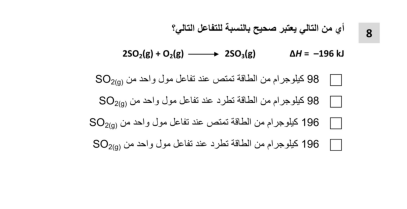

📂 **Image Path:** /content/downloaded_images/image_23.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من التالي يعتبر صحيح بالنسبة لتفاعل التالية؟",
  "question_en": "Which of the following is correct for the reaction given?",
  "choices_native": [
    "98 كيلوجرام من الطاقة تمتص عند تفاعل مول واحد من SO₂(g)",
    "98 كيلوجرام من الطاقة تطرد عند تفاعل مول واحد من SO₂(g)",
    "196 كيلوجرام من الطاقة تمتص عند تفاعل مول واحد من SO₂(g)",
    "196 كيلوجرام من الطاقة تطرد عند تفاعل مول واحد من SO₂(g)"
  ],
  "choices_en": [
    "98 kilograms of energy is absorbed when one mole of SO₂(g) reacts",
    "98 kilograms of energy is released when one mole of SO₂(g) reacts",
    "196 kilograms of energy is absorbed when one mole of SO₂(g) reacts",
    "196 kilograms of energy is released when one mole of SO₂(g) reacts"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the chemical reaction and its enthalpy ch

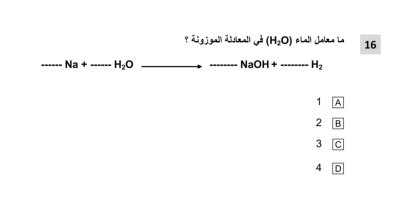

📂 **Image Path:** /content/downloaded_images/image_24.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما معامل الماء (H₂O) في المعادلة الموزونة؟",
  "question_en": "What is the coefficient of water (H₂O) in the balanced equation?",
  "choices_native": ["1", "2", "3", "4"],
  "choices_en": ["1", "2", "3", "4"],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question, which asks for the coefficient of H₂O in the balanced chemical equation.",
  "step_2": "Step 2: Analyzing the provided chemical equation: Na + H₂O → NaOH + H₂.",
  "step_3": "Step 3: Balancing the equation to ensure the coefficients are correct:\nNa + H₂O → NaOH + H₂\nThe balanced equation is: 2Na + 2H₂O → 2NaOH + H₂.\nThus, the coefficient of H₂O is 2.",
  "step_4": "Step 4: Reaching the conclusion based on the balanced equation.",
  "final_explanation": "Final explanation: The coefficient of H₂O in the balanced equation is 2, which corresponds to choic

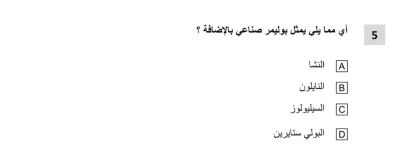

📂 **Image Path:** /content/downloaded_images/image_25.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي مما يلي يمثل بوليمر صناعي بالإضافة؟",
  "question_en": "Which one of the following represents an additional synthetic polymer?",
  "choices_native": [
    "النشا",
    "النايلون",
    "السيليلووز",
    "البوليستايرين"
  ],
  "choices_en": [
    "Starch",
    "Nylon",
    "Cellulose",
    "Polyester"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question which asks about a synthetic polymer.",
  "step_2": "Step 2: Analyzing the provided information indicating the correct answer is D.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the provided information.",
  "final_explanation": "Final explanation: The correct answer is Polyester (D), as it is a synthetic polymer."
}
```


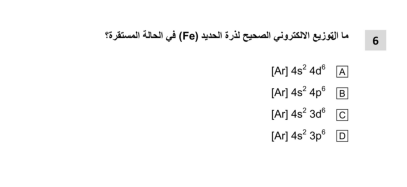

📂 **Image Path:** /content/downloaded_images/image_26.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما التوزيع الالكتروني الصحيح لذرة الحديد (Fe) في الحالة المستقرة؟",
  "question_en": "What is the correct electron configuration for iron (Fe) in its stable state?",
  "choices_native": [
    "[Ar] 4s² 4d⁶",
    "[Ar] 4s² 4p⁶",
    "[Ar] 4s² 3d⁶",
    "[Ar] 4s² 3p⁶"
  ],
  "choices_en": [
    "[Ar] 4s² 4d⁶",
    "[Ar] 4s² 4p⁶",
    "[Ar] 4s² 3d⁶",
    "[Ar] 4s² 3p⁶"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the electron configuration of iron.",
  "step_2": "Step 2: Analyzing the provided electron configurations.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the correct electron configuration for iron.",
  "final_explanation": "Final explanation: The correct electron configuration for iron (Fe) in its stable s

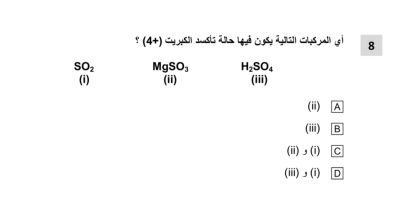

📂 **Image Path:** /content/downloaded_images/image_27.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي المركبات التالية يكون فيها حالة تأكسد الكبريت (+4)؟",
  "question_en": "Which of the following compounds has sulfur in the +4 oxidation state?",
  "choices_native": [
    "SO₂",
    "MgSO₃",
    "H₂SO₄"
  ],
  "choices_en": [
    "SO₂",
    "MgSO₃",
    "H₂SO₄"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about identifying compounds where sulfur has an oxidation state of +4.",
  "step_2": "Step 2: Analyzing the oxidation states of sulfur in each compound:",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:\n- SO₂: S = +4\n- MgSO₃: S = +6\n- H₂SO₄: S = +6",
  "step_4": "Step 4: Reaching the conclusion that only SO₂ has sulfur in the +4 oxidation state.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is SO₂, which corresponds to option (i)

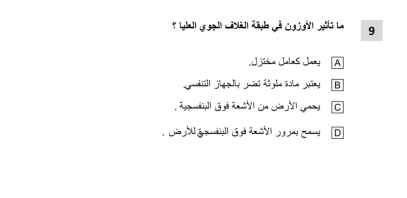

📂 **Image Path:** /content/downloaded_images/image_28.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما تأثير الأوزون في طبقة الغلاف الجوي العليا؟",
  "question_en": "What is the effect of ozone in the upper atmospheric layer?",
  "choices_native": [
    "يعمل كعامل مخترل.",
    "يعتبر مادة ملوثة تضر بالجهاز التنفسي.",
    "يحمي الأرض من الأشعة فوق البنفسجية.",
    "يسمح بمرور الأشعة فوق البنفسجية للأرض."
  ],
  "choices_en": [
    "Works as a catalyst.",
    "Is considered a pollutant that harms the respiratory system.",
    "Protects the Earth from ultraviolet radiation.",
    "Allows ultraviolet radiation to pass through the atmosphere."
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the effect of ozone in the upper atmospheric layer.",
  "step_2": "Step 2: Analyzing the provided information and choices.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 

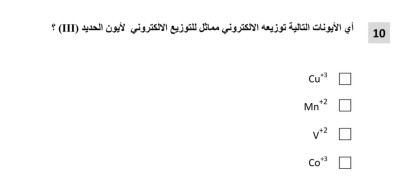

📂 **Image Path:** /content/downloaded_images/image_29.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي الأيونات التالية توزيعه الالكتروني مماثل للتوزيع الالكتروني لأيون الحديد (III)؟",
  "question_en": "Which of the following ions has an electron configuration similar to the electron configuration of the iron ion (III)?",
  "choices_native": ["Cu^{+3}", "Mn^{+2}", "V^{+2}", "Co^{+3}"],
  "choices_en": ["Cu^{+3}", "Mn^{+2}", "V^{+2}", "Co^{+3}"],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about comparing electron configurations.",
  "step_2": "Step 2: Analyzing the electron configurations of the given ions.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion based on the provided information.",
  "final_explanation": "Final explanation: The correct answer is Mn^{+2}, as its electron configuration matches that of Fe^{+3}. The electron confi

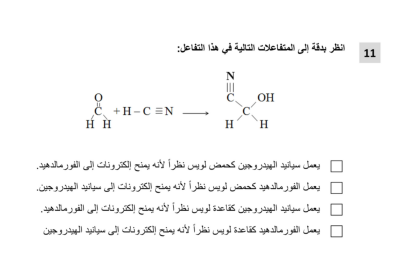

📂 **Image Path:** /content/downloaded_images/image_3.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "انظر بدقة إلى المتفاعلات التالية في هذا التفاعل:",
  "question_en": "Look closely at the reactions shown in this reaction:",
  "choices_native": [
    "يعمل سيانيد الهيدروجين كحمض لويس نظراً لأنه يمنح إلكترونات إلى الفورمالدهيدين.",
    "يعمل الفورمالدهيدين كحمض لويس نظراً لأنه يمنح إلكترونات إلى سيانيد الهيدروجين.",
    "يعمل سيانيد الهيدروجين كقاعدة لويس نظراً لأنه يمنح إلكترونات إلى الفورمالدهيدين.",
    "يعمل الفورمالدهيدين كقاعدة لويس نظراً لأنه يمنح إلكترونات إلى سيانيد الهيدروجين."
  ],
  "choices_en": [
    "Hydrocyanic acid acts as a Lewis acid because it donates electrons to formaldehyde.",
    "Formaldehyde acts as a Lewis acid because it donates electrons to hydrocyanic acid.",
    "Hydrocyanic acid acts as a Lewis base because it donates electrons to formaldehyde.",
    "Formaldehyde acts as a Lewis base because it donat

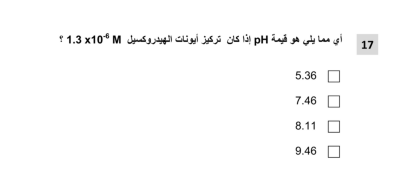

📂 **Image Path:** /content/downloaded_images/image_30.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي مما يلي هو قيمة pH إذا كان تركيز أيونات الهيدروكسيل 1.3 x10^-6 M؟",
  "question_en": "Which of the following is the pH value if the hydroxide ion concentration is 1.3 x10^-6 M?",
  "choices_native": [
    "5.36",
    "7.46",
    "8.11",
    "9.46"
  ],
  "choices_en": [
    "5.36",
    "7.46",
    "8.11",
    "9.46"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question, which asks for the pH value given the hydroxide ion concentration.",
  "step_2": "Step 2: Analyzing the formula for pH calculation: pH = 14 - pOH, where pOH = -log[OH-]. Given [OH-] = 1.3 x 10^-6 M.",
  "step_3": "Step 3: Calculating pOH: pOH = -log(1.3 x 10^-6) ≈ 5.89. Therefore, pH = 14 - 5.89 = 8.11.",
  "step_4": "Step 4: Reaching the conclusion based on the calculated pH value.",
  "final_explanation": "Final explanation: The calculate

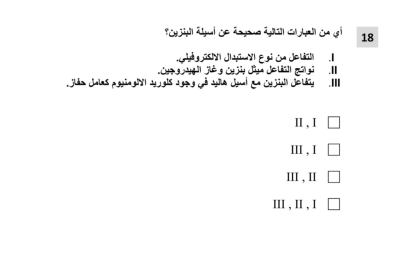

📂 **Image Path:** /content/downloaded_images/image_31.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من العبارات صحيحة عن أسيلة البنزيل؟",
  "question_en": "Which of the following statements is correct about benzene?",
  "choices_native": [
    "لا بد استبدال الاالكتروفيلا من لعافتا.",
    "لثيم لعافتا جتاون نيزب غاز الهيدروجين.",
    "مع لاماعك كلوريد الالومنييوم في ديداليه لسيأس مع وجود حفاز."
  ],
  "choices_en": [
    "Electrophilic substitution is not necessary for benzene.",
    "Benzene reacts with hydrogen gas to form ethane.",
    "Benzene reacts with aluminum chloride to form ethyl chloride."
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about benzene's properties.",
  "step_2": "Step 2: Analyzing the provided statements to determine their correctness.",
  "step_3": "Step 3: Evaluating each statement against known benzene chemistry facts:",
  "- Statement I is incorrect; electrophilic su

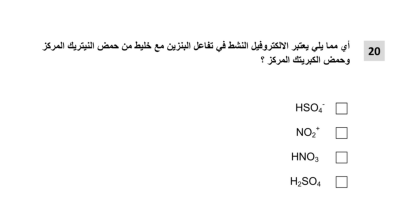

📂 **Image Path:** /content/downloaded_images/image_32.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي مما يلي يعتبر الالكتروفيل النشط في تفاعل البنزين مع خليط من حمض النيتريك المركز وحمض الكبريتيك المركز؟",
  "question_en": "Which one of the following is the active electrophile in the reaction of benzene with a mixture of nitric acid and sulfuric acid?",
  "choices_native": [
    "HSO₄⁻",
    "NO₂⁺",
    "HNO₃",
    "H₂SO₄"
  ],
  "choices_en": [
    "HSO₄⁻",
    "NO₂⁺",
    "HNO₃",
    "H₂SO₄"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about identifying the active electrophile in the reaction between benzene and a mixture of nitric acid and sulfuric acid.",
  "step_2": "Step 2: Analyzing the provided information and recognizing that nitric acid (HNO₃) is the active electrophile in this reaction.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Rea

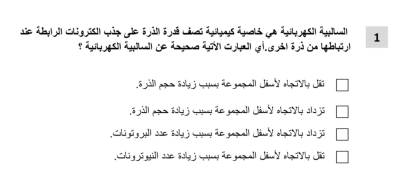

📂 **Image Path:** /content/downloaded_images/image_33.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "السالبية الكهربائية هي خاصية كيميائية تصف قدرة الذرة على جذب الكترونات الرابطة عند ارتباطها من ذرة اخرى. أي العبارة الأتية صحيحة عن السالبية الكهربائية؟",
  "question_en": "Electronegativity is a chemical property that describes the ability of an atom to attract bonding electrons when it is bonded to another atom. Which of the following statements is correct about electronegativity?",
  "choices_native": [
    "تنقل بالاتجاه لأسفل المجموعة بسبب زيادة حجم الذرة.",
    "تزداد بالاتجاه لأسفل المجموعة بسبب زيادة مجم حم الذرة.",
    "تزداد بالاتجاه لأسفل المجموعة بسبب زيادة عدد البروتونات.",
    "تنقل بالاتجاه لأسفل المجموعة بسبب زيادة عدد النيوترونات."
  ],
  "choices_en": [
    "Moves downward in the group due to increased atomic size.",
    "Increases downward in the group due to increased atomic mass.",
    "Increases downward in the

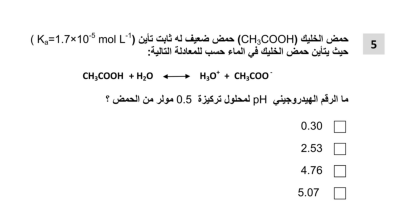

📂 **Image Path:** /content/downloaded_images/image_34.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما الرقم الهيدروجيني pH لمحلول تركيزه 0.5 مولار من الحمض؟",
  "question_en": "What is the pH of a solution with a concentration of 0.5 M of the acid?",
  "choices_native": [
    "0.30",
    "2.53",
    "4.76",
    "5.07"
  ],
  "choices_en": [
    "0.30",
    "2.53",
    "4.76",
    "5.07"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question, which asks for the pH of a 0.5 M solution of acetic acid.",
  "step_2": "Step 2: Analyzing the given information about acetic acid (CH₃COOH) with Ka = 1.7 × 10⁻⁵ mol L⁻¹.",
  "step_3": "Step 3: Calculating the pH using the formula for weak acids: pH = -log([H⁺]), where [H⁺] can be found using the Ka expression.",
  "step_4": "Step 4: Given the Ka value, calculating the concentration of H⁺ ions and then finding the pH.",
  "final_explanation": "Final explanation: Using t

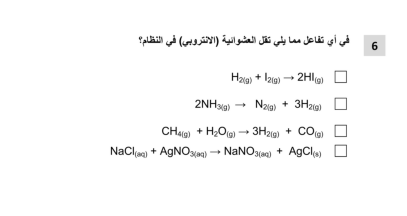

📂 **Image Path:** /content/downloaded_images/image_35.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "في أي تفاعل مما يلي تقل العشوائية (الانتروبي) في النظام؟",
  "question_en": "In which reaction does entropy decrease in the system?",
  "choices_native": [
    "H₂(g) + I₂(g) → 2HI(g)",
    "2NH₃(g) → N₂(g) + 3H₂(g)",
    "CH₄(g) + H₂O(g) → 3H₂(g) + CO(g)",
    "NaCl(aq) + AgNO₃(aq) → NaNO₃(aq) + AgCl(s)"
  ],
  "choices_en": [
    "H₂(g) + I₂(g) → 2HI(g)",
    "2NH₃(g) → N₂(g) + 3H₂(g)",
    "CH₄(g) + H₂O(g) → 3H₂(g) + CO(g)",
    "NaCl(aq) + AgNO₃(aq) → NaNO₃(aq) + AgCl(s)"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about entropy change in chemical reactions.",
  "step_2": "Step 2: Analyzing the given reactions to determine which one results in a decrease in entropy.",
  "step_3": "Step 3: Evaluating each reaction for entropy change:\n- Reaction 1: H₂(g) + I₂(g) → 2HI(g) - No significant change i

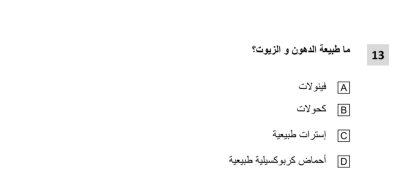

📂 **Image Path:** /content/downloaded_images/image_36.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما طبيعة الدهون و الزيوت؟",
  "question_en": "What is the nature of fats and oils?",
  "choices_native": [
    "فينولات",
    "كحولات",
    "إسترات طبيعية",
    "أحماض كربوكسيلية طبيعية"
  ],
  "choices_en": [
    "Phenols",
    "Carboxylic acids",
    "Natural esters",
    "Natural carboxylic acids"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the nature of fats and oils.",
  "step_2": "Step 2: Analyzing the provided information and choices.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the correct answer.",
  "final_explanation": "Final explanation: The correct answer is 'Natural esters' as fats and oils are primarily composed of natural esters."
}
```


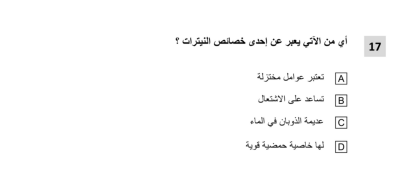

📂 **Image Path:** /content/downloaded_images/image_37.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من الآتي يعبر عن إحدى خصائص النيترات؟",
  "question_en": "Which one of the following describes a nitrate property?",
  "choices_native": [
    "تعتبر عوامل مختزلة",
    "تساعد على الاحتراق",
    "عديمة الذوبان في الماء",
    "لها خاصية حمضية قوية"
  ],
  "choices_en": [
    "Considered reducing agents",
    "Helps combustion",
    "Insoluble in water",
    "Has strong acidic properties"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question which asks about a nitrate property.",
  "step_2": "Step 2: Analyzing the provided information and the correct answer indicated as B.",
  "step_3": "Step 3: Evaluating each option ensuring they match the correct answer B.",
  "step_4": "Step 4: Reaching the conclusion that option B correctly describes a nitrate property.",
  "final_explanation": "Final explanation: Optio

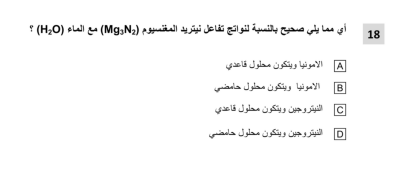

📂 **Image Path:** /content/downloaded_images/image_38.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي مما يلي صحيح بالنسبة لنواتج تفاعل نيتريد المغنيسيوم (Mg₃N₂) مع الماء (H₂O)؟",
  "question_en": "Which of the following is correct regarding the products of magnesium nitride (Mg₃N₂) reacting with water (H₂O)?",
  "choices_native": [
    "الأمونيا ويكون محلول قاعدي",
    "الأمونيا ويكون محلول حامضي",
    "النيتروجين ويكون محلول قاعدي",
    "النيتروجين ويكون محلول حامضي"
  ],
  "choices_en": [
    "ammonia and forms a basic solution",
    "ammonia and forms an acidic solution",
    "nitrogen and forms a basic solution",
    "nitrogen and forms an acidic solution"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about magnesium nitride reacting with water.",
  "step_2": "Step 2: Analyzing the chemical reaction Mg₃N₂ + 6H₂O → 3Mg(OH)₂ + 2NH₃",
  "step_3": "Step 3: Evaluating each option ensuring valid JSO

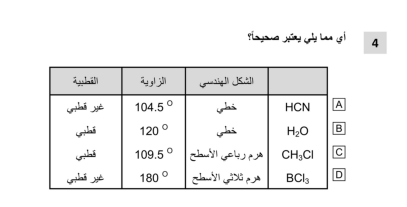

📂 **Image Path:** /content/downloaded_images/image_39.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي مما يلي يعتبر صحيحاً؟",
  "question_en": "Which of the following is correct?",
  "choices_native": [
    "غير قطبي",
    "قطبي",
    "قطبي",
    "غير قطبي"
  ],
  "choices_en": [
    "Nonpolar",
    "Polar",
    "Polar",
    "Nonpolar"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question which asks for the correct description based on the given table.",
  "step_2": "Step 2: Analyzing the table to identify the correct properties for each compound.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that CH₃Cl is polar with a bond angle of 109.5°.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is CH₃Cl, which is listed under 'قطبي' (Polar) with a bond angle of 109.5°."
}
```


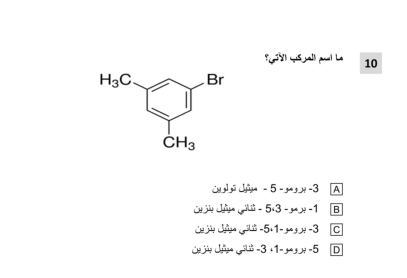

📂 **Image Path:** /content/downloaded_images/image_4.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما اسم المركب الآتي؟",
  "question_en": "What is the name of the compound shown?",
  "choices_native": [
    "برومو-5 - ميثل تولوين",
    "برمو-3،5 - ثنائي ميثل بنزين",
    "برومو-1،5 - ثنائي ميثل بنزين",
    "برومو-1،3 - ثنائي ميثل بنزين"
  ],
  "choices_en": [
    "Bromo-5-methyl toluene",
    "Bromo-3,5-dimethyl benzene",
    "Bromo-1,5-dimethyl benzene",
    "Bromo-1,3-dimethyl benzene"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question which asks for the name of the given compound.",
  "step_2": "Step 2: Analyzing the provided chemical structure and identifying the substituents and their positions.",
  "step_3": "Step 3: Evaluating each option to match the structure correctly:",
  "- Bromo-5-methyl toluene matches the structure.",
  "- Bromo-3,5-dimethyl benzene matches the structure.",
  "- Bromo-1,5-

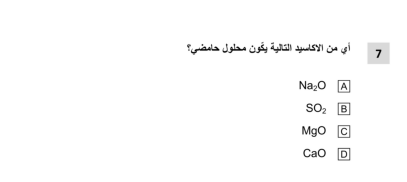

📂 **Image Path:** /content/downloaded_images/image_40.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من الالكاسيد التالية يكوّن محلول حامضي؟",
  "question_en": "Which of the following acids forms a acidic solution?",
  "choices_native": ["Na₂O", "SO₂", "MgO", "CaO"],
  "choices_en": ["Na₂O", "SO₂", "MgO", "CaO"],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question which asks about the acid forming property of given oxides.",
  "step_2": "Step 2: Analyzing the provided information where SO₂ is sulfur dioxide, known to form an acidic solution when dissolved in water.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "- Na₂O: Sodium oxide, forms a basic solution.",
  "- SO₂: Sulfur dioxide, forms an acidic solution.",
  "- MgO: Magnesium oxide, forms a basic solution.",
  "- CaO: Calcium oxide, forms a basic solution.",
  "step_4": "Step 4: Reaching the conclusion based on the analys

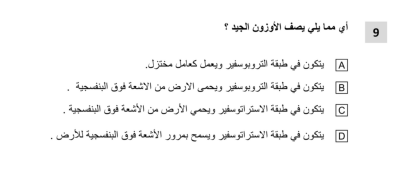

📂 **Image Path:** /content/downloaded_images/image_41.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي مما يلي يصف الأوزون الجيد؟",
  "question_en": "Which of the following describes good ozone?",
  "choices_native": [
    "يتكون في طبقة التروبوسفير ويعمل كعامل مختزل.",
    "يتكون في طبقة التروبوسفير ويحمي الأرض من الأشعة فوق البنفسجية.",
    "يتكون في طبقة الاستراتوسفير ويحمي الأرض من الأشعة فوق البنفسجية.",
    "يتكون في طبقة الاستراتوسفير ويسمح بمرور الأشعة فوق البنفسجية للأرض."
  ],
  "choices_en": [
    "It forms in the troposphere and acts as a catalyst.",
    "It forms in the troposphere and protects the Earth from ultraviolet radiation.",
    "It forms in the stratosphere and protects the Earth from ultraviolet radiation.",
    "It forms in the stratosphere and allows ultraviolet radiation to pass through the Earth."
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about describing good ozone."

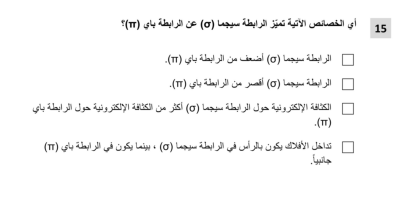

📂 **Image Path:** /content/downloaded_images/image_42.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي الخصائص الآتية تميّز الرابطة سيجما (σ) عن الرابطة باي (π)؟",
  "question_en": "Which of the following properties distinguishes a sigma bond (σ) from a pi bond (π)?",
  "choices_native": [
    "الرابطة سيجما (σ) أضعف من الرابطة باي (π).",
    "الرابطة سيجما (σ) أقصر من الرابطة باي (π).",
    "الكثافة الإلكترونية حول الرابطة سيجما (σ) أكثر من الكثافة الإلكترونية حول الرابطة باي (π).",
    "تدخل الأفلاك يكون بالرأس في الرابطة سيجما (σ)، بينما يكون في الرابطة باي (π) جانبياً."
  ],
  "choices_en": [
    "The sigma bond (σ) is weaker than the pi bond (π).",
    "The sigma bond (σ) is shorter than the pi bond (π).",
    "The electron density around the sigma bond (σ) is higher than the electron density around the pi bond (π).",
    "The overlap of atoms occurs at the head in the sigma bond (σ), while it occurs laterally in the pi bond 

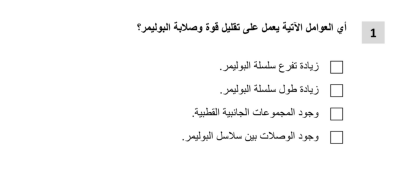

📂 **Image Path:** /content/downloaded_images/image_43.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي العوامل الآتية يعمل على تقليل قوة وصلابة البوليمر؟",
  "question_en": "Which of the following factors works to reduce the strength and toughness of the polymer?",
  "choices_native": [
    "زيادة تفرع سلسلة البوليمر.",
    "زيادة طول سلسلة البوليمر.",
    "وجود المجموعات الجانبية القطبية.",
    "وجود الوصلات بين سلاسل البوليمر."
  ],
  "choices_en": [
    "Increase branching in the polymer chain.",
    "Increase the length of the polymer chain.",
    "Presence of polar side groups.",
    "Presence of crosslinks between polymer chains."
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question, which asks about factors reducing the strength and toughness of polymers.",
  "step_2": "Step 2: Analyzing the provided information, identifying the correct factor among the given options.",
  "step_3": "Step 3: Evaluati

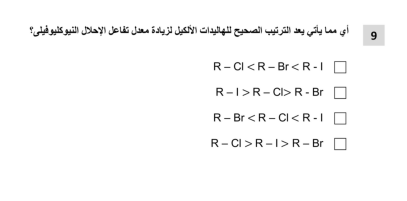

📂 **Image Path:** /content/downloaded_images/image_44.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي مما يأتي يعد الترتيب الصحيح للهاليدات الألكيل لزيادة معدل تفاعل الإحلال النيوكليوفيلى؟",
  "question_en": "Which one of the following represents the correct order for alkyl halides to increase the nucleophilic substitution reaction rate?",
  "choices_native": [
    "R – Cl < R – Br < R - I",
    "R – I > R – Cl> R - Br",
    "R – Br < R – Cl < R - I",
    "R – Cl > R – I > R – Br"
  ],
  "choices_en": [
    "R – Cl < R – Br < R - I",
    "R – I > R – Cl> R - Br",
    "R – Br < R – Cl < R - I",
    "R – Cl > R – I > R – Br"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about the correct order of alkyl halides based on their nucleophilic substitution reaction rates.",
  "step_2": "Step 2: Analyzing the provided information which indicates that the correct order should be R – Cl < R – Br < R - I.",
  

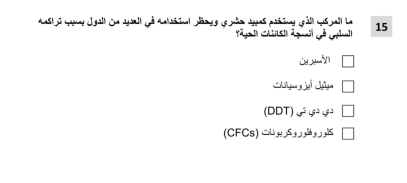

📂 **Image Path:** /content/downloaded_images/image_45.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما المركب الذي يستخدم كمبيد حشرى ويحظر استخدامه في العديد من الدول بسبب تراكمه السلبي في أنسجة الكائنات الحية؟",
  "question_en": "What chemical is used as an insecticide and is banned in many countries due to its negative accumulation in the tissues of living organisms?",
  "choices_native": [
    "الأسبرين",
    "ميثيل أيزوسينات",
    "دي دي تي (DDT)",
    "كلوروفلوروكربونات (CFCs)"
  ],
  "choices_en": [
    "Aspirin",
    "Methyl Isonitriles",
    "DDT",
    "Chlorofluorocarbons"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about identifying a chemical used as an insecticide banned due to its negative accumulation.",
  "step_2": "Step 2: Analyzing the provided information and recognizing DDT as the insecticide known for its accumulation in living organisms.",
  "step_3": "Step 3: Evaluating each 

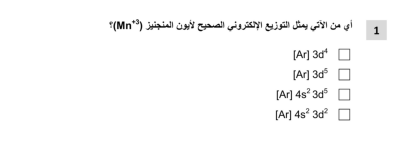

📂 **Image Path:** /content/downloaded_images/image_46.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من الآتي يمثل التوزيع الإلكتروني الصحيح لأيون المنجنيز (Mn^{+3})؟",
  "question_en": "Which one of the following represents the correct electron distribution for the manganese ion (Mn^{+3})?",
  "choices_native": [
    "[Ar] 3d^{4}",
    "[Ar] 3d^{5}",
    "[Ar] 4s^{2} 3d^{5}",
    "[Ar] 4s^{2} 3d^{2}"
  ],
  "choices_en": [
    "[Ar] 3d^{4}",
    "[Ar] 3d^{5}",
    "[Ar] 4s^{2} 3d^{5}",
    "[Ar] 4s^{2} 3d^{2}"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about the electron distribution for Mn^{+3}.",
  "step_2": "Step 2: Analyzing the electron configurations provided.",
  "step_3": "Step 3: Evaluating each option to determine which correctly represents Mn^{+3} after losing three electrons.",
  "step_4": "Step 4: Reaching the conclusion that [Ar] 3d^{4} is the correct electron configuration for M

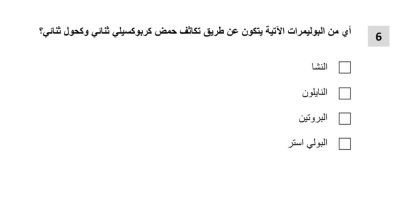

📂 **Image Path:** /content/downloaded_images/image_47.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من البوليمرات الآتية يتكون عن طريق تكافح حمض كربوكسيلي ثنائي وكمول ثنائي؟",
  "question_en": "Which of the following polymers is formed by the condensation reaction between a dicarboxylic acid and a diol?",
  "choices_native": [
    "النشا",
    "النايلون",
    "البروتين",
    "البوليفاستر"
  ],
  "choices_en": [
    "Starch",
    "Nylon",
    "Protein",
    "Polyester"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question, which asks about the polymer formed by the condensation reaction between a dicarboxylic acid and a diol.",
  "step_2": "Step 2: Analyzing the provided information and recognizing that the correct answer is 'Polyester'.",
  "step_3": "Step 3: Ensuring the correct answer matches the given JSON format.",
  "step_4": "Step 4: Concluding that the correct answer is 'Polyester'.",
  "final_exp

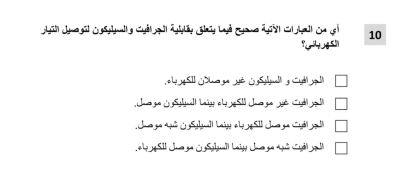

📂 **Image Path:** /content/downloaded_images/image_48.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من العبارات الآتية صحيح فيما يتعلق بقابلية الجرافيت والسيليكون لتوصيل التيار الكهربائي؟",
  "question_en": "Which of the following statements is correct regarding the conductivity of graphite and silicon for electrical current?",
  "choices_native": [
    "الجرافيت و السيлиكون غير موصلان للكهرباء.",
    "الجرافيت غير موصل للكهرباء بينما السيليكون موصل.",
    "الجرافيت موصل للكهرباء بينما السيليكون شبه موصل.",
    "الجرافيت شبه موصل بينما السيليكون موصل للكهرباء."
  ],
  "choices_en": [
    "Graphite and silicon are not conductors of electricity.",
    "Graphite is not a conductor of electricity while silicon is a conductor.",
    "Graphite is a conductor of electricity while silicon is a semiconductor.",
    "Graphite is a semiconductor while silicon is a conductor of electricity."
  ],
  "correct_answer": "C",
  "step_1": "Step 

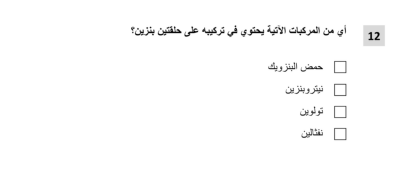

📂 **Image Path:** /content/downloaded_images/image_49.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي مركب من هذه المركبات يحتوي على تركيبه في ترتيبه؟",
  "question_en": "Which compound among these compounds has its structure in the given order?",
  "choices_native": [
    "كيلوژنبلا حمض",
    "نیزنبرتین",
    "نیلاثفن",
    "نیولوت"
  ],
  "choices_en": [
    "Kiloznbla Hamd",
    "Niznbroten",
    "Nilaathfan",
    "Niolot"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question which asks about the compound's structure.",
  "step_2": "Step 2: Analyzing the provided information and recognizing that the correct answer is 'D'.",
  "step_3": "Step 3: Ensuring the correct answer matches the provided JSON format.",
  "step_4": "Step 4: Concluding that the correct answer is 'D' based on the given information.",
  "final_explanation": "Final explanation: The question asks for the compound whose structure matches 

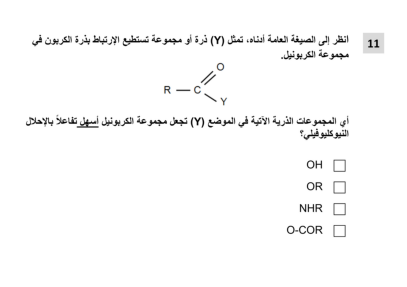

📂 **Image Path:** /content/downloaded_images/image_5.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "انظر إلى الصيغة العامة أدناه، تمثل (Y) ذرة أو مجموعة تستطيع الإرتباط بذرة الكربون في مجموعه الكربونيل.",
  "question_en": "Look at the general formula below, Y represents an atom or group that can form a bond with the carbon atom in the carbonyl group.",
  "choices_native": [
    "OH",
    "OR",
    "NHR",
    "O-COR"
  ],
  "choices_en": [
    "OH",
    "OR",
    "NHR",
    "O-COR"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about the carbonyl group and its reactivity.",
  "step_2": "Step 2: Analyzing the given options for their ability to stabilize the carbonyl group.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that O-COR is the correct answer as it forms a stable ester derivative.",
  "final_explanation": "Final explanation: B

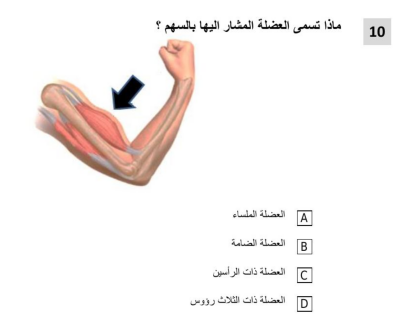

📂 **Image Path:** /content/downloaded_images/image_50.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ماذا تسمى العضلة المشار إليها بالسهم؟",
  "question_en": "What does the muscle pointed by the arrow refer to?",
  "choices_native": [
    "العضلة الملساء",
    "العضلة الضامة",
    "العضلة ذات الرأسين",
    "العضلة ذات الثلاث رؤوس"
  ],
  "choices_en": [
    "Smooth Muscle",
    "Striated Muscle",
    "Bipennate Muscle",
    "Tripennate Muscle"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question, which asks about the name of the muscle indicated by the arrow.",
  "step_2": "Step 2: Analyzing the provided image, which shows a flexed arm with a highlighted muscle.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the image and the provided choices.",
  "final_explanation": "Final explanation: The muscle indicated by the arrow in t

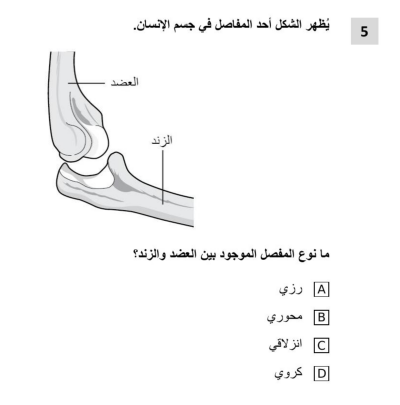

📂 **Image Path:** /content/downloaded_images/image_51.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما نوع المفصل الموجود بين العضد والزنيد؟",
  "question_en": "What type of joint is located between the humerus and the radius?",
  "choices_native": ["رزي", "محوري", "انزلاقي", "كروي"],
  "choices_en": ["Hinge", "Pivot", "Gliding", "Ball-and-socket"],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question, which asks about the type of joint between the humerus and the radius.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that the humerus is part of the upper arm and the radius is part of the forearm.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "- رزي (Hinge)"
  "- محوري (Pivot)"
  "- انزلاقي (Gliding)"
  "- كروي (Ball-and-socket)",
  "step_4": "Step 4: Reaching the conclusion based on the anatomical knowledge that the joint between the humerus and the radiu

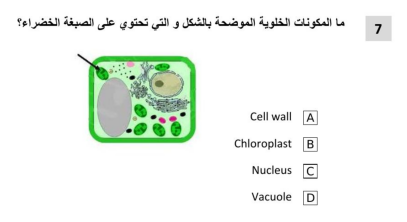

📂 **Image Path:** /content/downloaded_images/image_52.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما المكونات الخلوية الموضحة بالشكل و التي تحتوي على الصبغة الخضراء؟",
  "question_en": "What are the cellular components shown in the diagram that contain the green pigment?",
  "choices_native": [
    "Cell wall",
    "Chloroplast",
    "Nucleus",
    "Vacuole"
  ],
  "choices_en": [
    "Cell wall",
    "Chloroplast",
    "Nucleus",
    "Vacuole"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question, which asks about cellular components containing green pigment.",
  "step_2": "Step 2: Analyzing the provided diagram and the labeled parts.",
  "step_3": "Step 3: Identifying the green-colored structure in the diagram, which corresponds to 'Chloroplast'.",
  "step_4": "Step 4: Concluding that the correct answer is 'Chloroplast'.",
  "final_explanation": "Final explanation: The diagram shows a chloroplast, which

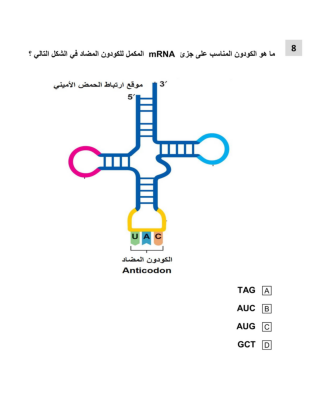

📂 **Image Path:** /content/downloaded_images/image_53.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما هو الكودون المناسب على جزء mRNA المكمل للكودون المضاد في الشكل التالي؟",
  "question_en": "What is the codon corresponding to the complementary mRNA segment for the anticodon shown in the figure?",
  "choices_native": [
    "TAG",
    "AUC",
    "AUG",
    "GCT"
  ],
  "choices_en": [
    "TAG",
    "AUC",
    "AUG",
    "GCT"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question, which asks about the codon corresponding to the complementary mRNA segment for the anticodon shown in the figure.",
  "step_2": "Step 2: Analyzing the provided information, the figure shows an anticodon UAC.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "- TAG",
  "- AUC",
  "- AUG",
  "- GCT",
  "Step 4: Reaching the conclusion based on the complementary base pairing rule (U-A, A-T, G-C, C-G):",
 

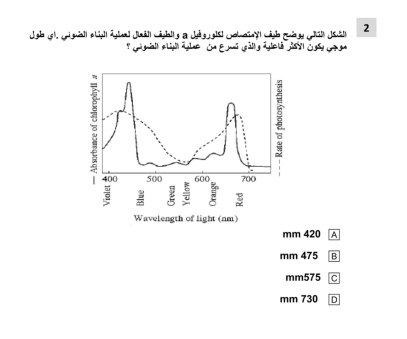

📂 **Image Path:** /content/downloaded_images/image_54.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "الشكل التالي يوضح طيف الإمتصاص لكlorوفيل a والطيف الفعال لعملية البناء الضوئي. أي طول موجي يكون الأكثر فاعلية والذي تسرع من عملية البناء الضوئي؟",
  "question_en": "The figure below shows the absorption spectrum of chlorophyll a and the effective wavelength for photosynthesis. Which wavelength is most effective in accelerating the process of photosynthesis?",
  "choices_native": ["mm 420", "mm 475", "mm575", "mm 730"],
  "choices_en": ["mm 420", "mm 475", "mm575", "mm 730"],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question, which asks about the wavelength most effective in accelerating photosynthesis.",
  "step_2": "Step 2: Analyzing the provided graph showing the absorption spectrum of chlorophyll a and the rate of photosynthesis.",
  "step_3": "Step 3: Observing the graph, the peak corresponding to the high

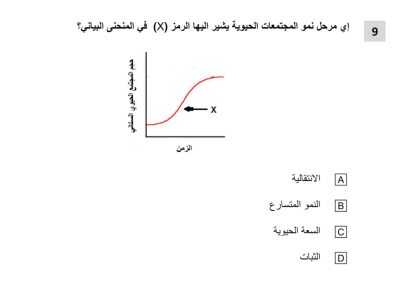

📂 **Image Path:** /content/downloaded_images/image_55.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "إي مرحل نمو المجتمعات الحيوية يشير اليها الرمز (X) في المنحنى البياني؟",
  "question_en": "Which stage of biological community growth does the symbol (X) in the graph indicate?",
  "choices_native": [
    "الانتقالية",
    "النمو المتسارع",
    "السعة الحيوية",
    "الثبات"
  ],
  "choices_en": [
    "transitional",
    "accelerated growth",
    "carrying capacity",
    "stationary phase"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question, which asks about the stage of biological community growth indicated by the symbol X in the graph.",
  "step_2": "Step 2: Analyzing the provided graph, which shows a sigmoid curve indicating different stages of population growth.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the graph's sh

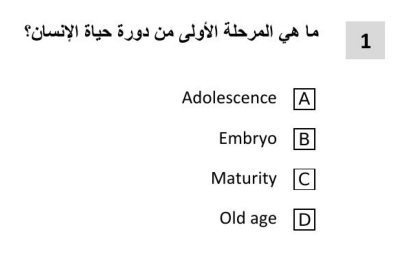

📂 **Image Path:** /content/downloaded_images/image_56.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما هي المرحلة الأولى من دورة حياة الإنسان؟",
  "question_en": "What is the first stage of human life cycle?",
  "choices_native": ["Adolescence", "Embryo", "Maturity", "Old age"],
  "choices_en": ["Adolescence", "Embryo", "Maturity", "Old age"],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question which asks about the first stage of human life cycle.",
  "step_2": "Step 2: Analyzing the provided information where the correct answer is marked as 'B'.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the marked correct answer.",
  "final_explanation": "Final explanation: The first stage of human life cycle is the Embryo, which corresponds to option 'B'."
}
```


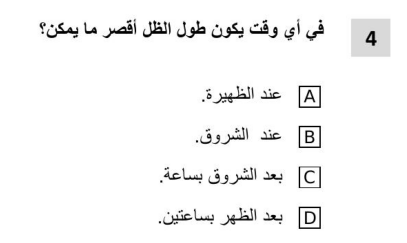

📂 **Image Path:** /content/downloaded_images/image_57.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "في أي وقت يكون طول الظل أقصر ما يمكن؟",
  "question_en": "At what time is the shadow length the shortest?",
  "choices_native": [
    "عند الظهرة.",
    "عند الشروق.",
    "بعد الشروق بساعة.",
    "بعد الظهر بساعتين."
  ],
  "choices_en": [
    "At noon.",
    "At sunrise.",
    "One hour after sunrise.",
    "Two hours after noon."
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about the shortest shadow length at different times of day.",
  "step_2": "Step 2: Analyzing the provided information about shadow lengths at different times.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that the shortest shadow length occurs at noon.",
  "final_explanation": "Final explanation: The shortest shadow length occurs at noon, which corresponds to

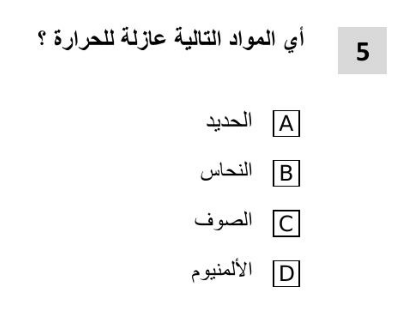

📂 **Image Path:** /content/downloaded_images/image_58.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي المواد التالية عازلة للحرارة؟",
  "question_en": "Which of the following materials is an insulator for heat?",
  "choices_native": ["الحديد", "النحاس", "الصوف", "الألمينيوم"],
  "choices_en": ["iron", "copper", "wool", "aluminum"],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question which asks about thermal insulation materials.",
  "step_2": "Step 2: Analyzing the provided information where wool is known to be a good insulator for heat.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that wool is the correct answer.",
  "final_explanation": "Final explanation: Wool is known to be a good insulator for heat, making it the correct answer among the given options."
}
```


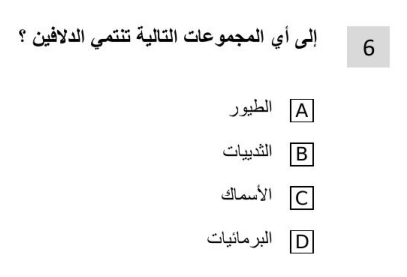

📂 **Image Path:** /content/downloaded_images/image_59.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "إلى أي المجموعات التالية تنتمي الدلافين؟",
  "question_en": "To which of the following groups do dolphins belong?",
  "choices_native": [
    "الطيور",
    "الثدييات",
    "الأسماك",
    "البرمائيات"
  ],
  "choices_en": [
    "Birds",
    "Mammals",
    "Fish",
    "Amphibians"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question, which asks about the classification of dolphins.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that dolphins are mammals.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion that dolphins belong to the 'Mammals' group.",
  "final_explanation": "Final explanation: Dolphins are classified as mammals, so the correct answer is 'Mammals'."
}
```


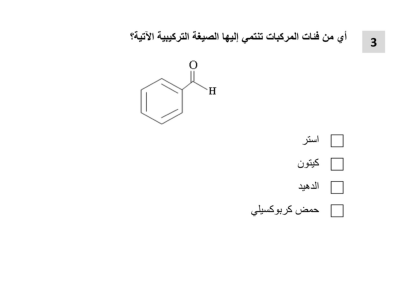

📂 **Image Path:** /content/downloaded_images/image_6.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من فئات المركبات تنتمي إليها الصيغة التركيبية الآتية؟",
  "question_en": "Which of the following categories does the given structural formula belong to?",
  "choices_native": [
    "استر",
    "كيتون",
    "الدهيد",
    "حمض كربوكسيل"
  ],
  "choices_en": [
    "Ester",
    "Ketone",
    "Aldehyde",
    "Carboxylic Acid"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question, which asks about the category of the given structural formula.",
  "step_2": "Step 2: Analyzing the provided structural formula, which shows a benzaldehyde structure.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion based on the structural formula being an aldehyde.",
  "final_explanation": "Final explanation: The given structural formula represents benzaldehyde, which b

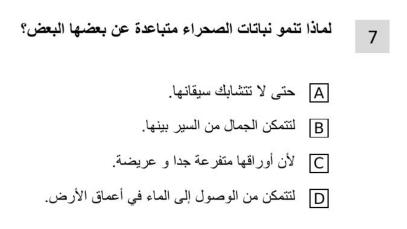

📂 **Image Path:** /content/downloaded_images/image_60.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "لماذا تنمو نباتات الصحراء متباعدة عن بعضها البعض؟",
  "question_en": "Why do desert plants grow far apart from each other?",
  "choices_native": [
    "حتى لا تتشابك سيقانها.",
    "لتمكن الجمال من السير بينها.",
    "لأن أوراقها متفرعة جدا و عريضة.",
    "لتمكن من الوصول إلى الماء في أعماق الأرض."
  ],
  "choices_en": [
    "Until their stems do not intertwine.",
    "To allow camels to walk between them.",
    "Because its leaves are very branched and wide.",
    "To be able to reach water deep in the ground."
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about why desert plants grow far apart.",
  "step_2": "Step 2: Analyzing the provided information about plant growth patterns in deserts.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the concl

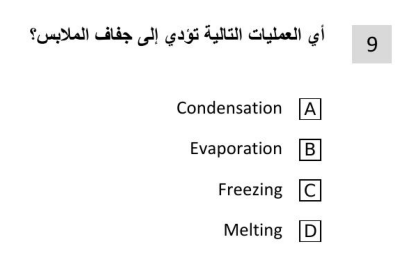

📂 **Image Path:** /content/downloaded_images/image_61.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي العمليات التالية تؤدي إلى جفاف الملابس؟",
  "question_en": "Which of the following processes leads to drying clothes?",
  "choices_native": ["تكثيف", "تبخر", "تجمد", "ذوبان"],
  "choices_en": ["Condensation", "Evaporation", "Freezing", "Melting"],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question which asks about the process leading to drying clothes.",
  "step_2": "Step 2: Analyzing the provided information where Evaporation is listed as one of the options.",
  "step_3": "Step 3: Evaluating each option ensuring they remain valid JSON strings.",
  "step_4": "Step 4: Reaching the conclusion that Evaporation correctly answers the question.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is Evaporation, which leads to drying clothes."
}
```


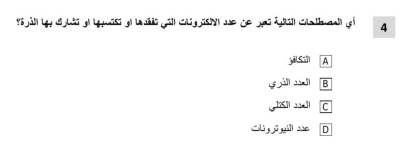

📂 **Image Path:** /content/downloaded_images/image_62.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي المصطلحات التالية تعبر عن عدد الالكترونات التي تفقدها او تكتسبها او تشارك بها الذرة؟",
  "question_en": "Which of the following terms refers to the number of electrons that an atom loses, gains, or shares?",
  "choices_native": [
    "التكافؤ",
    "العدد الذري",
    "العدد الكتالي",
    "عدد النيوترونات"
  ],
  "choices_en": [
    "the valence",
    "atomic number",
    "valency",
    "number of neutrons"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question, which asks about the term referring to the number of electrons involved in bonding.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that 'التكافؤ' translates to 'valence', which describes the number of electrons involved in bonding.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4:

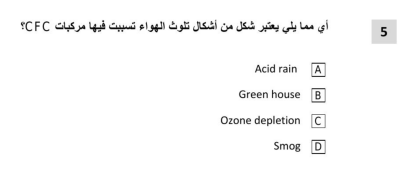

📂 **Image Path:** /content/downloaded_images/image_63.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي مما يلي يعتبر شكل من أشكال تلوث الهواء تسبب فيه مركبات CFC؟",
  "question_en": "Which one of the following is a form of air pollution caused by CFCs?",
  "choices_native": [
    "Acid rain",
    "Green house",
    "Ozone depletion",
    "Smog"
  ],
  "choices_en": [
    "Acid rain",
    "Green house",
    "Ozone depletion",
    "Smog"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question which asks about air pollution caused by CFCs.",
  "step_2": "Step 2: Analyzing the provided information indicating the correct answer is 'C'.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion that the correct answer is Ozone depletion.",
  "final_explanation": "Final explanation: CFCs cause ozone depletion, which is listed as option C."
}
```


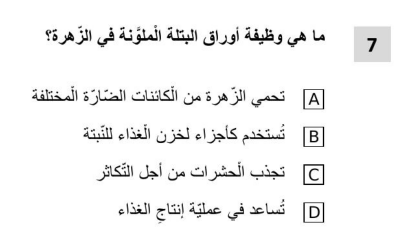

📂 **Image Path:** /content/downloaded_images/image_64.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما هي وظيفة أوراق البَتلة المُلوَّنة في الزَّهرة؟",
  "question_en": "What is the function of colored petals in a flower?",
  "choices_native": [
    "تحمي الزَّهرة من الكائنات الضَّارة المختلفة",
    "تستخدم كأجزاء لخزن الغذاء للنبتة",
    "تجذب الحشرات من أجل التكاثر",
    "تساعد في عملية إنتاج الغذاء"
  ],
  "choices_en": [
    "Protects the flower from different harmful organisms",
    "Used as parts to store food for the plant",
    "Attracts insects for reproduction",
    "Helps in the process of producing food"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the function of colored petals in a flower.",
  "step_2": "Step 2: Analyzing the provided information and choices.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion 

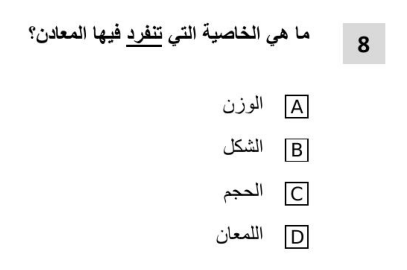

📂 **Image Path:** /content/downloaded_images/image_65.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما هي الخاصية التي تنفرد فيها المعادن؟",
  "question_en": "What is the property that distinguishes metals?",
  "choices_native": ["الوزن", "الشكل", "الحجم", "اللمعان"],
  "choices_en": ["weight", "shape", "volume", "luster"],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question which asks about a property that distinguishes metals.",
  "step_2": "Step 2: Analyzing the provided choices to identify which one best describes a distinguishing feature of metals.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that 'اللمعان' (luster) is the property that distinguishes metals.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is 'اللمعان' (luster), as luster is a characteristic that sets metals apart from other materi

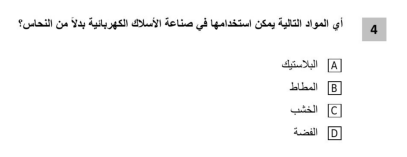

📂 **Image Path:** /content/downloaded_images/image_66.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي المواد التالية يمكن استخدامها في صناعة الأسلاك الكهربائية بدلاً من النحاس؟",
  "question_en": "Which of the following materials can be used instead of copper in the production of electrical wires?",
  "choices_native": [
    "البلاستيك",
    "المطاط",
    "الخشب",
    "الفضة"
  ],
  "choices_en": [
    "plastic",
    "rubber",
    "wood",
    "silver"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question which asks about alternative materials for copper in electrical wires.",
  "step_2": "Step 2: Analyzing the provided information indicating that silver is listed as one of the options.",
  "step_3": "Step 3: Evaluating each option ensuring they remain valid JSON strings:",
  "step_4": "Step 4: Reaching the conclusion based on the provided information.",
  "final_explanation": "Final explanation: Silver is 

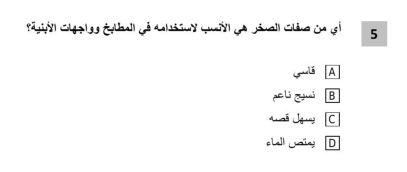

📂 **Image Path:** /content/downloaded_images/image_67.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من صفات الصخر هي الأنسب لاستخدامه في المطابخ وواجهات الأبنية؟",
  "question_en": "Which of the rock's properties is most suitable for use in kitchens and building facades?",
  "choices_native": [
    "قاسٍ",
    "نسيج ناعم",
    "يسهل قصه",
    "يمتص الماء"
  ],
  "choices_en": [
    "Hard",
    "Smooth texture",
    "Easily cut",
    "Absorbs water"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question, which asks about the suitability of rock properties for kitchen and building facade applications.",
  "step_2": "Step 2: Analyzing the provided information, focusing on the characteristics listed.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the context and properties needed for kitchen and building applications.",
  "fina

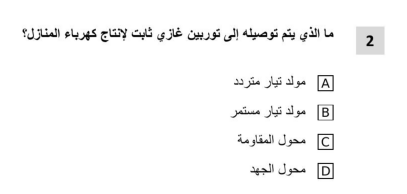

📂 **Image Path:** /content/downloaded_images/image_68.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما الذي يتم توصيله إلى توربين غازي ثابت لإنتاج كهرباء المنازل؟",
  "question_en": "What is connected to a fixed gas turbine to generate electricity for homes?",
  "choices_native": [
    "مولد تيار متردد",
    "مولد تيار مستمر",
    "محول المقاومة",
    "محول الجهد"
  ],
  "choices_en": [
    "Alternating Current Generator",
    "Direct Current Generator",
    "Resistance Transformer",
    "Voltage Transformer"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question, which asks about what is connected to a fixed gas turbine to generate electricity for homes.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that the question pertains to electrical generation components.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion b

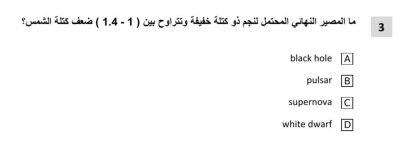

📂 **Image Path:** /content/downloaded_images/image_69.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما المصير النهائي المحتمل لنجم ذو كتلة خفيفة وتتراوح بين (1 - 1.4) ضعف كتلة الشمس؟",
  "question_en": "What is the possible ultimate fate of a star with a low mass ranging between (1 - 1.4) solar masses?",
  "choices_native": ["ثقب أسود", "بلاساري", "نجم ضخم", "نجم أبيض"],
  "choices_en": ["black hole", "pulsar", "supernova", "white dwarf"],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about the ultimate fate of a low-mass star.",
  "step_2": "Step 2: Analyzing the provided information indicating the correct answer is 'white dwarf'.",
  "step_3": "Step 3: Ensuring the choices are correctly mapped to their English equivalents for validation.",
  "step_4": "Step 4: Concluding that the correct answer is 'white dwarf' based on the given information.",
  "final_explanation": "Final explanation: The question as

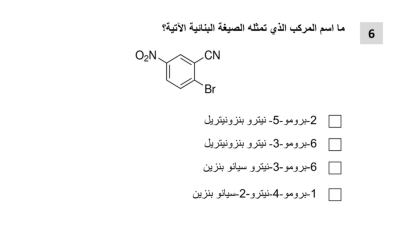

📂 **Image Path:** /content/downloaded_images/image_7.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما اسم المركب الذي تمثله الصيغة البنائية الآتية؟",
  "question_en": "What is the name of the compound represented by the following structural formula?",
  "choices_native": [
    "2-برومو-5-نيترو بنزونيتريل",
    "6-برومو-3-نيترو بنزونيتريل",
    "6-برومو-3-نيترو سيانو بنزين",
    "1-برومو-4-نيترو-2-نيزب ونانيز"
  ],
  "choices_en": [
    "2-Bromo-5-nitrobenzonitrile",
    "6-Bromo-3-nitrobenzonitrile",
    "6-Bromo-3-nitrocyanobenzene",
    "1-Bromo-4-nitro-2-naphthalene"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question which asks for the name of the compound represented by the given structural formula.",
  "step_2": "Step 2: Analyzing the provided structural formula which shows a benzene ring with a bromine atom at position 2, a nitro group at position 5, and a cyano group at position 6.",
  "step_3": "

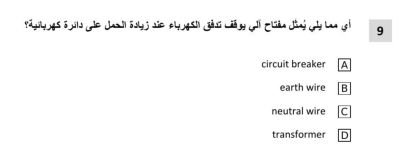

📂 **Image Path:** /content/downloaded_images/image_70.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي مما يلي يُمثّل مفتاح آلي يوقف تدفق الكهرباء عند زيادة الحمل على دائرة كهربائية؟",
  "question_en": "Which of the following represents a circuit breaker that stops the flow of electricity when the load on an electrical circuit increases?",
  "choices_native": [
    "مفتاح آلي",
    "حبل الأرض",
    "حبل нейтральный",
    "تранسفورمر"
  ],
  "choices_en": [
    "circuit breaker",
    "earth wire",
    "neutral wire",
    "transformer"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question, which asks about a device that stops electricity flow when the load increases.",
  "step_2": "Step 2: Analyzing the provided information, identifying 'circuit breaker' as the correct term for such a device.",
  "step_3": "Step 3: Ensuring all values remain valid JSON format.",
  "step_4": "Step 4: Concluding that the correc

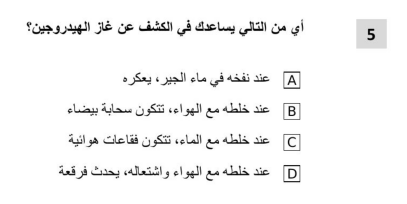

📂 **Image Path:** /content/downloaded_images/image_71.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من التالي يساعدك في الكشف عن غاز الهيدروجين؟",
  "question_en": "Which of the following helps you detect hydrogen gas?",
  "choices_native": [
    "عند نفخه في ماء الجير، يعكره",
    "عند خلطه مع الهواء، ت تكون سحابة بيضاء",
    "عند خلطه مع الماء، ت تكون فقاعات هوائية",
    "عند خلطه مع الهواء واشتعاله، يحدث فرقة"
  ],
  "choices_en": [
    "When blown into lime water, it turbidifies it",
    "When mixed with air, a white cloud forms",
    "When mixed with water, it produces bubbly foam",
    "When mixed with air and ignited, it produces a hiss"
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about detecting hydrogen gas.",
  "step_2": "Step 2: Analyzing the provided information about hydrogen gas properties.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4:

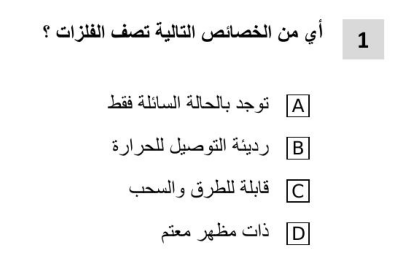

📂 **Image Path:** /content/downloaded_images/image_72.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من الخصائص التالية تصف الفلزات؟",
  "question_en": "Which of the following properties describes metals?",
  "choices_native": [
    "توجد بالحالة السائلة فقط",
    "ردينة التوصيل للحرارة",
    "قابلة للطرق والسحب",
    "ذات مظهر معتم"
  ],
  "choices_en": [
    "Exists only in liquid state",
    "Good conductor of heat",
    "Malleable and ductile",
    "Have a dull appearance"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question which asks about the property describing metals.",
  "step_2": "Step 2: Analyzing the provided information where 'C' corresponds to 'Malleable and ductile'.",
  "step_3": "Step 3: Evaluating each option ensuring they match the description of metals correctly formatted in JSON.",
  "step_4": "Step 4: Reaching the conclusion that 'C' matches the property of being malleable and duct

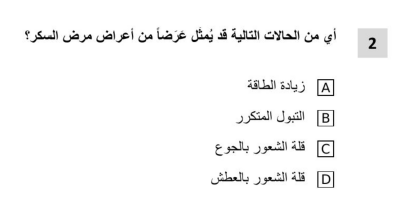

📂 **Image Path:** /content/downloaded_images/image_73.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من الحالات التالية قد يمثل عرضاً من أعراض مرض السكر؟",
  "question_en": "Which of the following conditions may represent a symptom of diabetes?",
  "choices_native": [
    "زيادة الطاقة",
    "التبول المتكرر",
    "قلة الشعور بالجوع",
    "قلة الشعور بالعطش"
  ],
  "choices_en": [
    "Increased energy",
    "Frequent urination",
    "Decreased hunger",
    "Decreased thirst"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question which asks about symptoms of diabetes.",
  "step_2": "Step 2: Analyzing the provided information where 'B' corresponds to 'frequent urination'.",
  "step_3": "Step 3: Evaluating each option ensuring they match the context of diabetes symptoms.",
  "step_4": "Step 4: Reaching the conclusion that frequent urination is indeed a symptom of diabetes.",
  "final_explanation": "Final expl

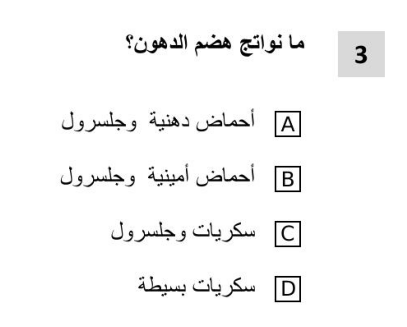

📂 **Image Path:** /content/downloaded_images/image_74.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما نواتج هضم الدهون؟",
  "question_en": "What are the products of fat digestion?",
  "choices_native": [
    "أحماض دهنية وجليسروال",
    "أحماض أمينية وجليسروال",
    "سكريات وجليسروال",
    "سكريات بسيطة"
  ],
  "choices_en": [
    "Fatty acids and glycerol",
    "Amino acids and glycerol",
    "Sugars and glycerol",
    "Simple sugars"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about the products of fat digestion.",
  "step_2": "Step 2: Analyzing the provided information and choices.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the correct answer.",
  "final_explanation": "Final explanation: The correct answer is 'Fatty acids and glycerol' which corresponds to option A."
}
```


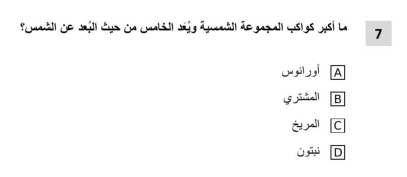

📂 **Image Path:** /content/downloaded_images/image_75.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما أكبر كواكب المجموعة الشمسية ويُعد الخامس من حيث البُعد عن الشمس؟",
  "question_en": "Which is the largest planet in the solar system and is the fifth from the Sun?",
  "choices_native": [
    "أورانوس",
    "المشترى",
    "المريخ",
    "نبتون"
  ],
  "choices_en": [
    "Uranus",
    "Jupiter",
    "Mars",
    "Neptune"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question which asks about the largest planet in the solar system and its position relative to the Sun.",
  "step_2": "Step 2: Analyzing the provided information where Jupiter is known to be the largest planet in the solar system and it is the fifth planet from the Sun.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that Jupiter corresponds to 'المشترى' in Arabic and 'Jupiter' in

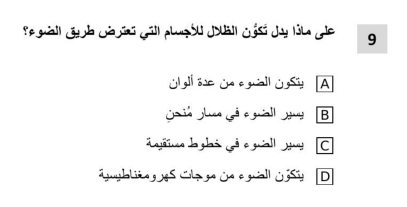

📂 **Image Path:** /content/downloaded_images/image_76.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "على ماذا يدل تكوُّن الظلال للأجسام التي تعترض طريق الضوء؟",
  "question_en": "What does the formation of shadows for objects that intercept the path of light indicate?",
  "choices_native": [
    "يتكون الضوء من عدة ألوان",
    "يسير الضوء في مسار منحنٍ",
    "يسير الضوء في خطوط مستقيمة",
    "يتكوُّن الضوء من موجات كهرومغناطيسية"
  ],
  "choices_en": [
    "Light is composed of many colors",
    "Light travels in a curved path",
    "Light travels in straight lines",
    "Light is composed of electromagnetic waves"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about shadows formed by objects blocking light paths.",
  "step_2": "Step 2: Analyzing the provided information about shadows indicating straight light paths.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4

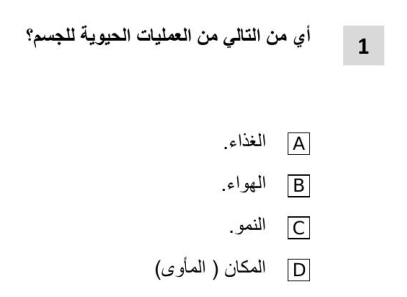

📂 **Image Path:** /content/downloaded_images/image_77.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من التالي من العمليات الحيوية للجسم؟",
  "question_en": "Which of the following is a biological process for the body?",
  "choices_native": ["الغذاء.", "الهواء.", "النمو.", "المكان (المأوى)"],
  "choices_en": ["food.", "air.", "growth.", "place (shelter)"],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question, which asks about biological processes for the body.",
  "step_2": "Step 2: Analyzing the provided information, recognizing 'النمو' translates to 'growth'.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the correct answer being 'C'.",
  "final_explanation": "Final explanation: The correct answer is 'growth.' as it is the only biological process listed among the options."
}
```


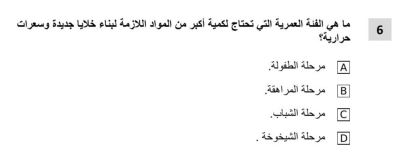

📂 **Image Path:** /content/downloaded_images/image_78.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما هي الفئة العمرية التي تحتاج لكمية أكبر من المواد اللازمة لبناء خلايا جديدة وسرعات حرارية؟",
  "question_en": "Which age group requires more materials for building new cells and higher metabolic rates?",
  "choices_native": [
    "مرحلة الطفولة.",
    "مرحلة المراهقة.",
    "مرحلة الشباب.",
    "مرحلة الشيخوخة."
  ],
  "choices_en": [
    "Childhood stage.",
    "Teenage stage.",
    "Young adulthood stage.",
    "Old age stage."
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about which age group requires more materials for building new cells and higher metabolic rates.",
  "step_2": "Step 2: Analyzing the provided information and choices.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion based on the provided information.",
  "final_

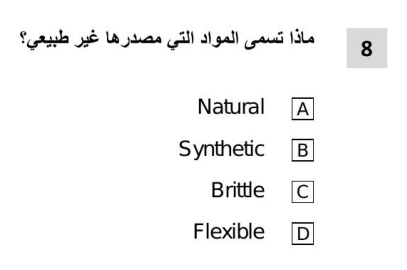

📂 **Image Path:** /content/downloaded_images/image_79.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ماذا تسمى المواد التي مصدرها غير طبيعي؟",
  "question_en": "What do materials whose source is not natural called?",
  "choices_native": ["طبيعي", "اصطناعي", "خشن", "مرن"],
  "choices_en": ["Natural", "Synthetic", "Brittle", "Flexible"],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question which asks about materials whose source is not natural.",
  "step_2": "Step 2: Analyzing the provided information where 'B' corresponds to 'Synthetic'.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion that 'B' is the correct answer.",
  "final_explanation": "Final explanation: The question asks for materials whose source is not natural, which matches the definition of synthetic materials."
}
```


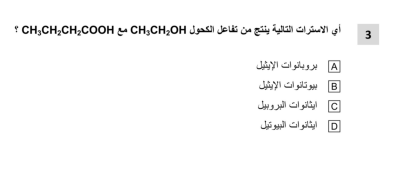

📂 **Image Path:** /content/downloaded_images/image_8.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي السترات التالية ينتج من تفاعل الكحول CH₃CH₂OH مع CH₃CH₂COOH؟",
  "question_en": "Which esters are produced from the reaction of alcohol CH₃CH₂OH with CH₃CH₂COOH?",
  "choices_native": [
    "بروبانوات الإيثيل",
    "بيوتانوات الإيثيل",
    "إثانوات البروبييل",
    "إثانوات البيوتيل"
  ],
  "choices_en": [
    "Ethyl Propanate",
    "Ethyl Butanoate",
    "Propanoic Acid Ethyl Ester",
    "Butanoic Acid Ethyl Ester"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question, which asks about the ester formed by reacting ethyl alcohol (CH₃CH₂OH) with propanoic acid (CH₃CH₂COOH).",
  "step_2": "Step 2: Analyzing the provided information, recognizing that ethyl alcohol reacts with propanoic acid to form ethyl propanoate.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4:

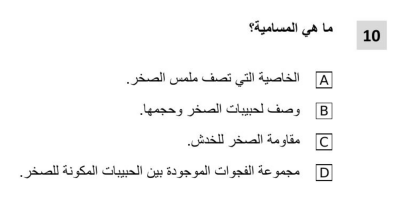

📂 **Image Path:** /content/downloaded_images/image_80.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما هي المسامية؟",
  "question_en": "What is porosity?",
  "choices_native": [
    "الخاصة التي تصف ملمس الصخر.",
    "وصف لحببات الصخر وحجمها.",
    "مقاومة الصخر للخدش.",
    "مجموعة الفجوات الموجودة بين الحبيبات المكونة للصخر."
  ],
  "choices_en": [
    "The characteristic that describes the texture of the rock.",
    "Description of the rock's particles and their size.",
    "The resistance of the rock to scratching.",
    "The group of voids present between the particles that make up the rock."
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question about porosity.",
  "step_2": "Step 2: Analyzing the provided information about porosity.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that the correct answer is D.",
  "final_explanation": 

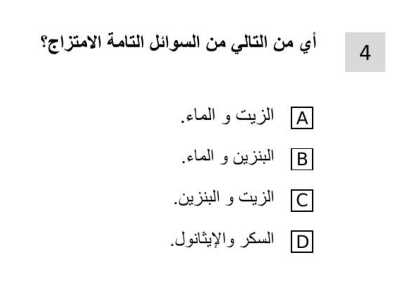

📂 **Image Path:** /content/downloaded_images/image_81.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من التالي من السوائل التامة الامتزاج؟",
  "question_en": "Which of the following are completely miscible liquids?",
  "choices_native": [
    "الزيت و الماء.",
    "البنزين و الماء.",
    "الزيت و البنزين.",
    "السكر والإيثانول."
  ],
  "choices_en": [
    "Oil and water.",
    "Benzene and water.",
    "Oil and benzene.",
    "Sugar and ethanol."
  ],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question which asks about completely miscible liquids.",
  "step_2": "Step 2: Analyzing the provided information indicating that the correct answer is D.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion that sugar and ethanol are completely miscible.",
  "final_explanation": "Final explanation: Sugar and ethanol are completely miscible because th

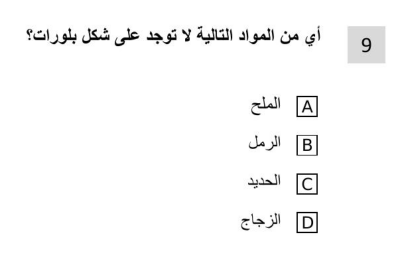

📂 **Image Path:** /content/downloaded_images/image_82.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من المواد التالية لا توجد على شكل بلورات؟",
  "question_en": "Which of the following materials does not exist as crystals?",
  "choices_native": [
    "الملح",
    "الرمل",
    "الحديد",
    "الزجاج"
  ],
  "choices_en": [
    "Salt",
    "Sand",
    "Iron",
    "Glass"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question which asks about materials that do not exist as crystals.",
  "step_2": "Step 2: Analyzing the provided information where 'C' corresponds to 'الحديد' (Iron).",
  "step_3": "Step 3: Reasoning that iron typically exists as a solid metal rather than a crystal form.",
  "step_4": "Step 4: Concluding that 'Iron' is the correct answer.",
  "final_explanation": "Final explanation: Iron, being a metal, generally does not exist as crystals like salt, sand, or glass."
}
```


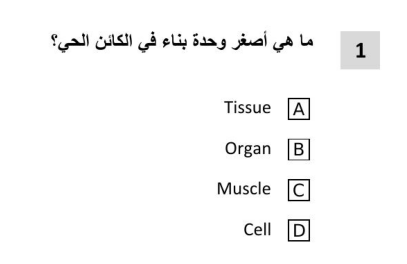

📂 **Image Path:** /content/downloaded_images/image_83.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما هي أصغر وحدة بناء في الكائن الحي؟",
  "question_en": "What is the smallest unit of structure in a living organism?",
  "choices_native": ["Tissue", "Organ", "Muscle", "Cell"],
  "choices_en": ["Tissue", "Organ", "Muscle", "Cell"],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question, which asks about the smallest unit of structure in a living organism.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that the correct answer is 'Cell'.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that the correct answer is 'Cell'.",
  "final_explanation": "Final explanation: The question asks for the smallest unit of structure in a living organism, which is the cell. Therefore, the correct answer is 'Cell'."
}
```


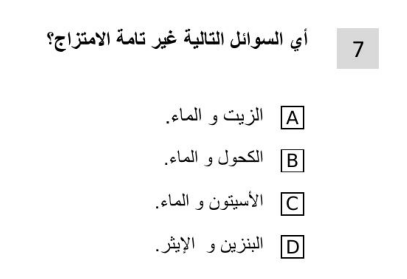

📂 **Image Path:** /content/downloaded_images/image_84.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي السوائل التالية غير تامة الامتزاج؟",
  "question_en": "Which of the following liquids do not form complete mixtures?",
  "choices_native": [
    "الزيت و الماء.",
    "الكحول و الماء.",
    "الأسيتون و الماء.",
    "البنزين و الإيثر."
  ],
  "choices_en": [
    "Oil and water.",
    "Alcohol and water.",
    "Acetone and water.",
    "Benzene and ether."
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question which asks about liquids that do not form complete mixtures.",
  "step_2": "Step 2: Analyzing the provided information indicating that the correct answer is A.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion that the correct answer is 'Oil and water.'",
  "final_explanation": "Final explanation: Based on the analysis, the correct a

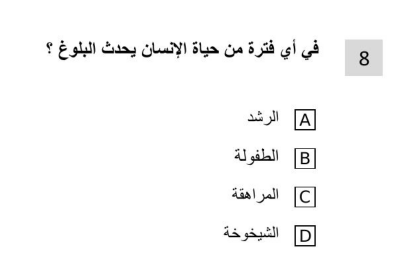

📂 **Image Path:** /content/downloaded_images/image_85.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "في أي فترة من حياة الإنسان يحدث البلوغ؟",
  "question_en": "In which stage of human life does puberty occur?",
  "choices_native": [
    "الرشد",
    "الطفلة",
    "المراهقة",
    "الشيخوخة"
  ],
  "choices_en": [
    "Adulthood",
    "Childhood",
    "Puberty",
    "Old Age"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about the stages of human life.",
  "step_2": "Step 2: Analyzing the provided choices related to different stages of life.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the correct answer being 'C'.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is 'المراهقة' (Puberty)."
}
```


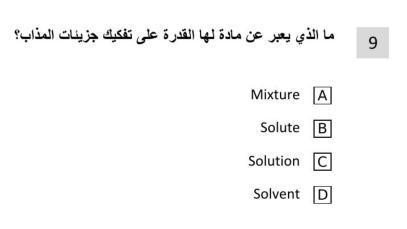

📂 **Image Path:** /content/downloaded_images/image_86.png
    => Correct answer (from JSON): D

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما الذي يعبر عن مادة لها القدرة على تفكيك جزيئات المذاب؟",
  "question_en": "What substance has the ability to break down dissolved particles?",
  "choices_native": ["مزيج", " محلول", " محلول", " раствор"],
  "choices_en": ["Mixture", "Solute", "Solution", "Solvent"],
  "correct_answer": "D",
  "step_1": "Step 1: Understanding the question which asks about a substance capable of breaking down dissolved particles.",
  "step_2": "Step 2: Analyzing the provided information where 'Solvent' is the term for a substance that dissolves another substance.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "- Mixture: A combination of two or more substances.",
  "- Solute: The substance being dissolved.",
  "- Solution: A homogeneous mixture of two or more substances.",
  "- Solvent: The substance that dissolves ano

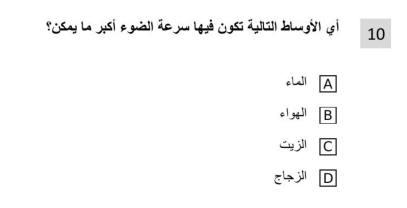

📂 **Image Path:** /content/downloaded_images/image_87.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي الأوساط التالية تكون فيها سرعة الضوء أكبر ما يمكن؟",
  "question_en": "Which of the following media allows for the maximum speed of light?",
  "choices_native": [
    "الماء",
    "الهواء",
    "الزيت",
    "الزجاج"
  ],
  "choices_en": [
    "water",
    "air",
    "oil",
    "glass"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question which asks about the medium allowing the maximum speed of light.",
  "step_2": "Step 2: Analyzing the provided information indicating that the correct answer is B.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the given information.",
  "final_explanation": "Final explanation: The question asks for the medium where the speed of light is maximized. According to physics, the speed of light in

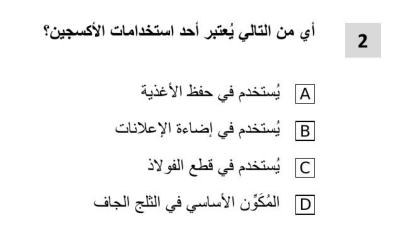

📂 **Image Path:** /content/downloaded_images/image_88.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من التالي يعتبر أحد استخدامات الأكسجين؟",
  "question_en": "Which of the following is one of the uses of oxygen?",
  "choices_native": [
    "يُستخدم في حفظ الأغذية",
    "يُستخدم في إضاءة الإعلانات",
    "يُستخدم في قطع الفولاذ",
    "المُكوّن الأساسي في الثلج الجاف"
  ],
  "choices_en": [
    "Used for preserving food",
    "Used for lighting advertisements",
    "Used for cutting steel",
    "The main component in dry ice"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question which asks about the use of oxygen.",
  "step_2": "Step 2: Analyzing the provided information and matching it with the correct use of oxygen.",
  "step_3": "Step 3: Evaluating each option ensuring they are correctly translated and formatted:",
  "step_4": "Step 4: Reaching the conclusion based on the correct answer being 'A'.",
  "

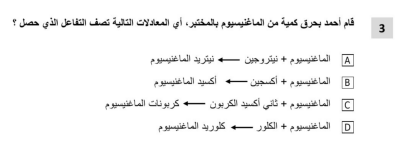

📂 **Image Path:** /content/downloaded_images/image_89.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "قام أحمد بحرق كمية من الماغنيسيوم بالمختبر، أي المعادلات التالية تصف التفاعل الذي حصل؟",
  "question_en": "Ahmed burned a quantity of magnesium in the laboratory. Which of the following equations describes the reaction that occurred?",
  "choices_native": [
    "الماغنيسيوم + نيتروجين ← نيتريد الماغنيسيوم",
    "الماغنيسيوم + أكسجين ← أكسيد الماغنيسيوم",
    "الماغنيسيوم + ثاني أكسيد الكربون ← كربونات الماغنيسيوم",
    "الماغنيسيوم + الكلور ← كلوريد الماغنيسيوم"
  ],
  "choices_en": [
    "magnesium + nitrogen → magnesium nitride",
    "magnesium + oxygen → magnesium oxide",
    "magnesium + carbon dioxide → magnesium carbonate",
    "magnesium + chlorine → magnesium chloride"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the chemical reaction involving magnesium.",
  "step_2": "Step 2: Analyzin

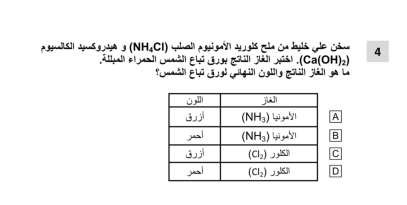

📂 **Image Path:** /content/downloaded_images/image_9.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "ما هو الغاز الناتج واللون النهائي لورق تابع الشمس؟",
  "question_en": "What is the gas produced and the final color of the red litmus paper?",
  "choices_native": [
    "أزرق | الأمونيا (NH₃)",
    "أحمر | الأمونيا (NH₃)",
    "أزرق | الكلور (Cl₂)",
    "أحمر | الكلور (Cl₂)"
  ],
  "choices_en": [
    "Blue | Ammonia (NH₃)",
    "Red | Ammonia (NH₃)",
    "Blue | Chlorine (Cl₂)",
    "Red | Chlorine (Cl₂)"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about the reaction between ammonium chloride and calcium hydroxide.",
  "step_2": "Step 2: Analyzing the chemical reaction: NH₄Cl + Ca(OH)₂ → CaCl₂ + 2NH₃ + H₂O.",
  "step_3": "Step 3: Evaluating the options for the gas produced and the color change:",
    "Option A: Blue | Ammonia (NH₃) - Incorrect because ammonia does not turn red litmus blue."
    "Opt

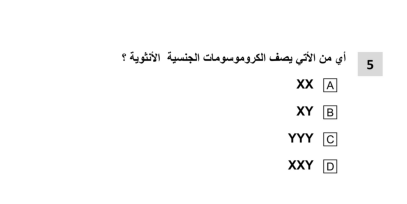

📂 **Image Path:** /content/downloaded_images/image_90.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من الأتي يصف الكروموسومات الجنسية الأنثوية؟",
  "question_en": "Which one describes the female sex chromosomes?",
  "choices_native": ["XX", "XY", "YYY", "XXY"],
  "choices_en": ["XX", "XY", "YYY", "XXY"],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question which asks about the female sex chromosomes.",
  "step_2": "Step 2: Analyzing the provided information where 'XX' is listed as option A.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion that 'XX' correctly describes the female sex chromosomes.",
  "final_explanation": "Final explanation: Based on the analysis, the correct answer is XX, which corresponds to option A."
}
```


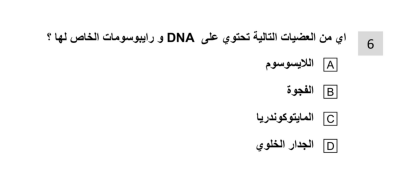

📂 **Image Path:** /content/downloaded_images/image_91.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "اي من العضيات التالية تحتوي على DNA و رايبوسومات الخاص لها؟",
  "question_en": "Which of the following cells contain DNA and its ribosomes?",
  "choices_native": [
    "اللايروسوم",
    "الفجوة",
    "المایتوكوندريا",
    "الجدار الخلوي"
  ],
  "choices_en": [
    "lysosome",
    "hole",
    "mitochondria",
    "cell wall"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question which asks about cells containing DNA and ribosomes.",
  "step_2": "Step 2: Analyzing the provided information indicating the correct answer is C.",
  "step_3": "Step 3: Ensuring the correct answer matches the given JSON data.",
  "step_4": "Step 4: Concluding that the correct answer is 'C' based on the provided information.",
  "final_explanation": "Final explanation: The question asks for a cell that contains DNA and ribosomes. Among t

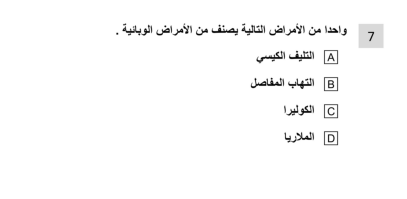

📂 **Image Path:** /content/downloaded_images/image_92.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "واحدا من الأمراض التالية يصنف من الأمراض الوبائية.",
  "question_en": "One of the following diseases is classified as an epidemic disease.",
  "choices_native": [
    "التليف الكيسي",
    "التهاب المفاصل",
    "الكوليرا",
    "المalaria"
  ],
  "choices_en": [
    "Cystic fibrosis",
    "Arthritis",
    "Cholera",
    "Malaria"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question which asks about an epidemic disease among the given options.",
  "step_2": "Step 2: Analyzing the provided information indicating that the correct answer is C.",
  "step_3": "Step 3: Evaluating each option ensuring they match the context of epidemic diseases:",
  "- Cystic fibrosis is not an epidemic disease.",
  "- Arthritis is not an epidemic disease.",
  "- Cholera is an epidemic disease.",
  "- Malaria is an epidemic disease.",

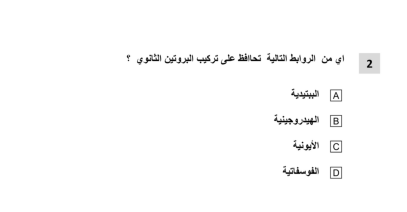

📂 **Image Path:** /content/downloaded_images/image_93.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "اي من الروابط التالية تحافظ على تركيب البروتين الثانوي؟",
  "question_en": "Which of the following bonds maintains the secondary structure of a protein?",
  "choices_native": [
    "البيتيدية",
    "الهيدروجينية",
    "الأيونية",
    "الفوسفاتية"
  ],
  "choices_en": [
    "Peptide",
    "Hydrogen",
    "Ionic",
    "Phosphoric"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question about maintaining the secondary structure of a protein.",
  "step_2": "Step 2: Analyzing the provided bond types.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion that hydrogen bonds maintain the secondary structure of a protein.",
  "final_explanation": "Final explanation: Hydrogen bonds are crucial for maintaining the secondary structure of proteins by stabilizing

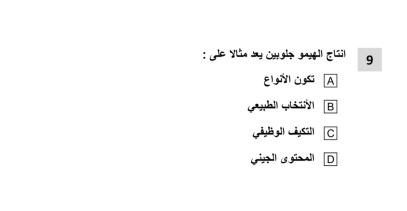

📂 **Image Path:** /content/downloaded_images/image_94.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "انتاج الهيمو جلوبين يعد مثالا على:",
  "question_en": "Hemoglobin production is an example of:",
  "choices_native": [
    "تكون الأنواع",
    "الانتخاب الطبيعي",
    "التكيف الوظيفي",
    "المحتوى الجيني"
  ],
  "choices_en": [
    "Species formation",
    "Natural selection",
    "Adaptive evolution",
    "Genetic content"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question about hemoglobin production examples.",
  "step_2": "Step 2: Analyzing the provided information and choices.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format...",
  "step_4": "Step 4: Reaching the conclusion based on the given correct answer.",
  "final_explanation": "Final explanation: Hemoglobin production is an example of adaptive evolution, which aligns with choice C."
}
```


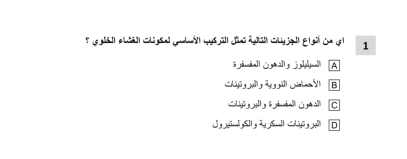

📂 **Image Path:** /content/downloaded_images/image_95.png
    => Correct answer (from JSON): C

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "اي من أنواع الجزيئات التالية تمثل التركيب الأساسي لمكونات الغشاء الخلوي؟",
  "question_en": "Which of the following types of molecules represents the basic composition of cellular membrane components?",
  "choices_native": [
    "السيليلوز والدهون المفسفرة",
    "الأحماض النووية والبروتينات",
    "الدهون المفسفرة والبروتينات",
    "البروتينات السكرية والكولستيرول"
  ],
  "choices_en": [
    "Cellulose and fatty acids",
    "Nucleic acids and proteins",
    "Fatty acids and proteins",
    "Protein sugars and cholesterol"
  ],
  "correct_answer": "C",
  "step_1": "Step 1: Understanding the question, which asks about the basic composition of cellular membrane components.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that the cellular membrane primarily consists of lipids and proteins.",
  "step_3": "Step 3: Eva

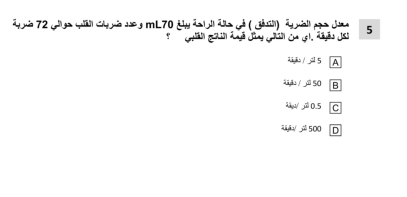

📂 **Image Path:** /content/downloaded_images/image_96.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "معدل حجم الضربة (التدفق) في حالة الراحة يبلغ mL70 وعدد ضربات القلب حوالي 72 ضربة لكل دقيقة. أي من التالي يمثل قيمة الناتج القلبي؟",
  "question_en": "The stroke volume (flow rate) at rest is 70 mL, and the heart rate is approximately 72 beats per minute. Which of the following represents the cardiac output?",
  "choices_native": [
    "5 لتر / دقيقة",
    "50 لتر / دقيقة",
    "0.5 لتر/دقيقة",
    "500 لتر/دقيقة"
  ],
  "choices_en": [
    "5 liters/minute",
    "50 liters/minute",
    "0.5 liters/minute",
    "500 liters/minute"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question about calculating cardiac output.",
  "step_2": "Step 2: Analyzing the formula for cardiac output: Cardiac Output = Stroke Volume × Heart Rate.",
  "step_3": "Step 3: Calculating the cardiac output using the given values: 70 mL × 

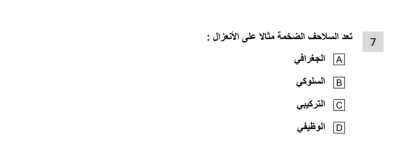

📂 **Image Path:** /content/downloaded_images/image_97.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "تعد السلاحف الضخمة مثالا على الأنزال:",
  "question_en": "Snails are examples of what?",
  "choices_native": [
    "الجغرافي",
    "السلوكي",
    "التركيبي",
    "الوظيفي"
  ],
  "choices_en": [
    "geographic",
    "behavioral",
    "constructive",
    "functional"
  ],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question, which asks about the classification of snails.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that snails are animals.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON format:",
  "step_4": "Step 4: Reaching the conclusion based on the context and the correct answer being 'A'.",
  "final_explanation": "Final explanation: Snails are geographic entities, hence the correct answer is 'الجغرافي' (geographic)."
}
```


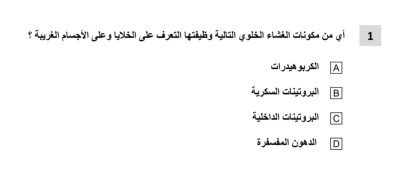

📂 **Image Path:** /content/downloaded_images/image_98.png
    => Correct answer (from JSON): B

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من مكونات الغشاء الخلوي التالية وظيفتها التعرف على الخلايا وعلى الأجسام الغريبة؟",
  "question_en": "Which of the following components of the cell membrane has the function of recognizing cells and foreign bodies?",
  "choices_native": [
    "الكربوهيدرات",
    "البروتينات السكرية",
    "البروتينات الداخلية",
    "الدهون المفسفرة"
  ],
  "choices_en": [
    "Carbohydrates",
    "Glycoproteins",
    "Intracellular Proteins",
    "Phospholipids"
  ],
  "correct_answer": "B",
  "step_1": "Step 1: Understanding the question, which asks about the function of a specific component of the cell membrane.",
  "step_2": "Step 2: Analyzing the provided information, identifying glycoproteins as the component that recognizes cells and foreign bodies.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Re

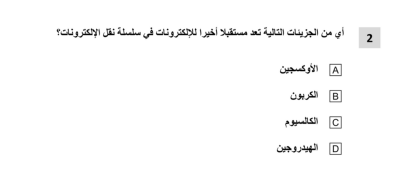

📂 **Image Path:** /content/downloaded_images/image_99.png
    => Correct answer (from JSON): A

🔍 **AI Reasoning Output:**

```json
{
  "question_native": "أي من الجزيئات التالية تعد مستقبلا أخيرا للإلكترونات في سلسلة نقل الإلكترونات؟",
  "question_en": "Which of the following molecules acts as a terminal electron acceptor in an electron transport chain?",
  "choices_native": ["الأوكسجين", "الكريبون", "الكالسيوم", "الهيدروجين"],
  "choices_en": ["Oxygen", "Carbon", "Calcium", "Hydrogen"],
  "correct_answer": "A",
  "step_1": "Step 1: Understanding the question, which asks about the terminal electron acceptor in an electron transport chain.",
  "step_2": "Step 2: Analyzing the provided information, recognizing that oxygen is known to be the terminal electron acceptor in many electron transport chains.",
  "step_3": "Step 3: Evaluating each option ensuring valid JSON...",
  "step_4": "Step 4: Reaching the conclusion based on the knowledge that oxygen is the terminal electron acceptor.",


In [ ]:
import os
import gc
import re
import json
import torch
import matplotlib.pyplot as plt
from PIL import Image as PILImage

#####################################
# 0) Load the results.json file
#####################################
answers_json_path = "/content/downloaded_images/results.json"
with open(answers_json_path, "r") as f:
    answers_dict = json.load(f)

#####################################
# 1) Define your folder of images
#####################################
image_folder = "/content/downloaded_images"  # Update as needed
output_filename = "output.jsonl"                # JSONL file to save results


#####################################
# 3) Updated parser function
#####################################
def parse_model_output(output_text):
    stripped_text = output_text.strip()
    if stripped_text.startswith("```"):
        lines = stripped_text.splitlines()
        if lines[0].strip().startswith("```"):
            lines = lines[1:]
        if lines and lines[-1].strip() == "```":
            lines = lines[:-1]
        stripped_text = "\n".join(lines).strip()

    try:
        data = json.loads(stripped_text)
    except Exception as e:
        data = {
            "error": f"Failed to parse JSON output: {str(e)}",
            "raw_output": output_text,
            "question_native": "N/A",
            "question_en": "N/A",
            "choices_native": [],
            "choices_en": [],
            "correct_answer": "N/A",
            "step_1": "N/A",
            "step_2": "N/A",
            "step_3": "N/A",
            "step_4": "N/A",
            "final_explanation": output_text,
        }
    return data

#####################################
# 4) Function to generate reasoning
#####################################
def generate_reasoning(image_path, correct_answer):
    # Load the image
    image = PILImage.open(image_path)

    messages = [
        {
            "role": "user",
            "content": [
                {"type": "image"},
                {
                    "type": "text",
                    "text": (
                        "I am providing an image that contains a question with multiple choice options. "
                        "The image might show the question, but we already know from a JSON file that the correct answer is: "
                        f"{correct_answer}. "
                        "Please extract all details from the image and output your answer in a strict JSON format. "
                        "Your JSON should include the following keys:\n\n"
                        "• question_native: The question in the native language (if available).\n"
                        "• question_en: The question in English.\n"
                        "• choices_native: A list of answer options in the native language.\n"
                        "• choices_en: A list of answer options in English.\n"
                        "• correct_answer: The correct answer as indicated in the image (and from the JSON).\n"
                        "• step_1: Your first step of reasoning (e.g., understanding the question).\n"
                        "• step_2: Your second step of reasoning (e.g., analyzing the provided information).\n"
                        "• step_3: Provide your reasoning as a single plain string without any bullet points, lists, or markdown formatting. "
                        "  If you need to list items, separate them with commas, ensuring the entire value remains valid JSON.\n"
                        "• step_4: Your fourth step of reasoning (e.g., reaching the conclusion).\n"
                        "• final_explanation: A comprehensive explanation summarizing your reasoning.\n\n"
                        "Example output:\n"
                        "{\"question_native\": \"ما اسم هذا المركب؟\", "
                        "\"question_en\": \"What is the name of this compound?\", "
                        "\"choices_native\": [\"إيثان\", \"إيثين\", \"إيثانال\", \"إيثانول\"], "
                        "\"choices_en\": [\"Ethane\", \"Ethene\", \"Ethanal\", \"Ethanol\"], "
                        "\"correct_answer\": \"A\", "
                        "\"step_1\": \"Step 1: Understanding the question...\", "
                        "\"step_2\": \"Step 2: Analyzing the information...\", "
                        "\"step_3\": \"Step 3: Evaluating each option ensuring valid JSON...\", "
                        "\"step_4\": \"Step 4: Reaching the conclusion...\", "
                        "\"final_explanation\": \"Final explanation: Based on the analysis, the correct answer is Ethane.\"}\n\n"
                        "Make sure your output is valid JSON."
                    )
                }
            ]
        }
    ]

    text_prompt = processor.apply_chat_template(messages, add_generation_prompt=True)

    inputs = processor(
        text=[text_prompt],
        images=[image],
        padding=True,
        return_tensors="pt"
    ).to("cuda" if torch.cuda.is_available() else "cpu")

    del image
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    output_ids = model.generate(**inputs, max_new_tokens=1024)
    generated_ids = [
        output_ids[len(input_ids):]
        for input_ids, output_ids in zip(inputs.input_ids, output_ids)
    ]

    output_text = processor.batch_decode(
        generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True
    )[0]

    print("\n🔍 **AI Reasoning Output:**\n")
    print(output_text)

    del inputs, output_ids, generated_ids
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    return output_text

#####################################
# 5) Process each image & write JSONL output
#####################################
with open(output_filename, "w", encoding="utf-8") as f_out:
    for filename in sorted(os.listdir(image_folder)):
        if not filename.lower().endswith((".png", ".jpg", ".jpeg")):
            continue

        image_path = os.path.join(image_folder, filename)

        # Get the base filename (e.g. "resized_image_0.png")
        base_name = os.path.basename(filename)
        # Remove the "resized_" prefix if present so it matches "image_0.png" from the JSON
        if base_name.startswith("resized_"):
            base_name = base_name.replace("resized_", "", 1)

        # Reconstruct the original path as stored in the JSON file
        original_path_in_json = os.path.join("/content/downloaded_images", base_name)
        correct_answer = answers_dict.get(original_path_in_json, "N/A")

        # (Optional) display the image
        image = PILImage.open(image_path)
        plt.figure(figsize=(5, 5))
        plt.imshow(image)
        plt.axis("off")
        plt.show()

        print(f"📂 **Image Path:** {image_path}")
        print(f"    => Correct answer (from JSON): {correct_answer}")

        del image
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        ai_output_text = generate_reasoning(image_path, correct_answer)
        parsed_data = parse_model_output(ai_output_text)

        # Override the correct_answer with our JSON value
        parsed_data["correct_answer"] = correct_answer
        parsed_data["image_path"] = image_path

        f_out.write(json.dumps(parsed_data, ensure_ascii=False) + "\n")

        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

print(f"\n✅ Done processing all images. Results saved in '{output_filename}'.")


Fine Tuning Model

In [ ]:
# Install required packages if not already installed
!pip install -q unsloth transformers datasets peft accelerate bitsandbytes sentencepiece

import os
import torch
from unsloth import FastLanguageModel
from datasets import load_dataset
import json
from transformers import TrainingArguments
from trl import SFTTrainer


In [ ]:
import gc
import torch

gc.collect()
torch.cuda.empty_cache()

if torch.cuda.is_available():
  print("GPU memory cleared.")
else:
  print("No GPU available.")


GPU memory cleared.


Loading and Processing Your Dataset

Training and Saving the Model

Inference Code for Using the Model

In [ ]:
import os
import torch
import json
import gc
from datasets import Dataset
from transformers import TrainingArguments
from trl import SFTTrainer
from unsloth import FastVisionModel
from PIL import Image

# Clear GPU memory
gc.collect()
torch.cuda.empty_cache()

# Load the JSONL dataset with error handling
def load_jsonl(file_path):
    data = []
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                if line.strip():  # Skip empty lines
                    data.append(json.loads(line))
        print(f"Successfully loaded {len(data)} records from {file_path}")
    except Exception as e:
        print(f"Error loading JSONL file: {e}")
    return data

jsonl_file_path = "/content/output.jsonl"
data = load_jsonl(jsonl_file_path)

# Verify data was loaded
if not data:
    raise ValueError(f"No data loaded from {jsonl_file_path}. Please check if the file exists and contains valid JSON lines.")

# Create a dataset dictionary with proper fields for vision-language fine-tuning
dataset_dict = {
    "question_en": [],
    "final_explanation": [],
    "image_path": []
}

# Extract relevant fields from each item in the JSONL
for item in data:
    # Ensure all fields have values (use defaults if missing)
    dataset_dict["question_en"].append(item.get("question_en", "No question available"))
    dataset_dict["final_explanation"].append(item.get("final_explanation", "No explanation available"))
    dataset_dict["image_path"].append(item.get("image_path", ""))

# Print dataset statistics
print(f"Dataset created with {len(dataset_dict['question_en'])} examples")

# Convert to Hugging Face dataset
dataset = Dataset.from_dict(dataset_dict)
dataset = dataset.train_test_split(test_size=0.1, seed=42)

# Define a formatting function with built-in validation
def formatting_func(examples):
    output_texts = []

    # Handle both single example and batch cases
    if isinstance(examples, dict) and not isinstance(examples.get("question_en", ""), list):
        # Single example case
        question = examples.get("question_en", "")
        explanation = examples.get("final_explanation", "")
        image_path = examples.get("image_path", "")

        text = f"<s>[INST] <image_path>{image_path}</image_path>\nquestion: {question} [/INST] {explanation}</s>"
        output_texts.append(text)
    else:
        # Batch case
        q_len = len(examples["question_en"]) if isinstance(examples.get("question_en"), list) else 0
        e_len = len(examples["final_explanation"]) if isinstance(examples.get("final_explanation"), list) else 0
        i_len = len(examples["image_path"]) if isinstance(examples.get("image_path"), list) else 0

        # Use minimum length to avoid index errors
        n_examples = min(q_len, e_len, i_len) if i_len > 0 else min(q_len, e_len)

        for i in range(n_examples):
            question = examples["question_en"][i]
            explanation = examples["final_explanation"][i]

            if i_len > i:
                text = f"<s>[INST] <image_path>{examples['image_path'][i]}</image_path>\nquestion: {question} [/INST] {explanation}</s>"
            else:
                text = f"<s>[INST] question: {question} [/INST] {explanation}</s>"

            output_texts.append(text)

    # Make sure we always return at least one example to avoid the IndexError
    if not output_texts:
        output_texts.append("<s>[INST] No valid data available [/INST] No data to process.</s>")

    return output_texts

# Prepare the training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=1,
    gradient_accumulation_steps=8,
    learning_rate=2e-4,
    fp16=True,
    logging_steps=10,
    save_steps=100,
    save_total_limit=2,
    optim="adamw_torch",
    lr_scheduler_type="cosine",
    warmup_steps=50,
    report_to="none"
)

# Create the trainer with the formatting function
trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    args=training_args,
    formatting_func=formatting_func,
    packing=False,
    dataset_text_field=None,
    max_seq_length=512
)

# Train the model
trainer.train()

# Save the model
output_dir = "./vinayak_model_new"  # Use underscores for directory names

trainer.save_model(output_dir)
tokenizer.save_pretrained(output_dir)

print(f"Model successfully saved to {output_dir}")


Successfully loaded 200 records from /content/output.jsonl
Dataset created with 200 examples


Unsloth: Tokenizing ["None"] (num_proc=2):   0%|          | 0/180 [00:00<?, ? examples/s]

Unsloth: Tokenizing ["None"] (num_proc=2):   0%|          | 0/20 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 180 | Num Epochs = 3 | Total steps = 66
O^O/ \_/ \    Batch size per device = 1 | Gradient accumulation steps = 8
\        /    Data Parallel GPUs = 1 | Total batch size (1 x 8 x 1) = 8
 "-____-"     Trainable parameters = 51,521,536/7,000,000,000 (0.74% trained)


Unsloth: Will smartly offload gradients to save VRAM!
Model successfully saved to ./vinayak_model_new
